# Постановка задачи

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

- Подготовить данные;
- Провести исследовательский анализ данных;
- Построить и обучить модель.

## Технологический процесс

Опишем каждую стадию:
### 1. Флотация
Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.  
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

### 2. Очистка
Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

## Описание данных

### Технологический процесс

  -  *Rougher feed* — исходное сырье
  -   *Rougher additions (или reagent additions)* — флотационные реагенты: Xanthate, Sulphate, Depressant  
        Xanthate **— ксантогенат (промотер, или активатор флотации);  
        Sulphate — сульфат (на данном производстве сульфид натрия);  
        Depressant — депрессант (силикат натрия).  
  -   *Rougher process* (англ. «грубый процесс») — флотация
  -   *Rougher tails* — отвальные хвосты
  -   *Float banks* — флотационная установка
  -   *Cleaner process* — очистка
  -   *Rougher Au* — черновой концентрат золота
  -   *Final Au* — финальный концентрат золота

### Параметры этапов

 -    air amount — объём воздуха
 -    fluid levels — уровень жидкости
 -    feed size — размер гранул сырья
 -    feed rate — скорость подачи

### Наименование признаков

Наименование признаков должно быть такое:
[этап].[тип_параметра].[название_параметра]
Пример: rougher.input.feed_ag

#### Возможные значения для блока [этап]:

 -     rougher — флотация
 -     primary_cleaner — первичная очистка
 -     secondary_cleaner — вторичная очистка
 -     final — финальные характеристики

#### Возможные значения для блока [тип_параметра]:

  -   input — параметры сырья
  -   output — параметры продукта
  -   state — параметры, характеризующие текущее состояние этапа
  -   calculation — расчётные характеристики

### Расчёт эффективности

Recovery = (C*(F-T) / F(C-T)) * 100%

<img src="Recovery_1576238822.jpg">

где:

    C — доля золота в концентрате после флотации/очистки;
    F — доля золота в сырье/концентрате до флотации/очистки;
    T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

### Метрика качества

Для решения задачи введём новую метрику качества — **sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).**
Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных. Почему симметричная? Она одинаково учитывает масштаб и целевого признака, и предсказания.
Метрика sMAPE вычисляется так:

<img src="smape_1576238825.jpg">

Нужно спрогнозировать сразу две величины:

    эффективность обогащения чернового концентрата rougher.output.recovery;
    эффективность обогащения финального концентрата final.output.recovery.

<img src="viruchka_1576238830.jpg">

# Описание проекта

Данные находятся в трёх файлах:

    gold_recovery_train.csv — обучающая выборка
    gold_recovery_test.csv — тестовая выборка
    gold_recovery_full.csv — исходные данные 

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.  
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.  
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.    
В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.    

## Инструкция по выполнению проекта

**1. Подготовьте данные**  
1.1. Откройте файлы и изучите их.
Путь к файлам:

    /datasets/gold_recovery_train.csv.
    /datasets/gold_recovery_test.csv.
    /datasets/gold_recovery_full.csv.

1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.   
1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?    
1.4. Проведите предобработку данных.  
**2. Проанализируйте данные**   
2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.  
2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.  
2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.  
**3. Постройте модель**    
3.1. Напишите функцию для вычисления итоговой sMAPE.  
3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.  

#### Libs

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, ShuffleSplit, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from numpy.random import RandomState
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1.1. Откройте файлы и изучите их. 

#### Тренировочный датасет

In [2]:
data_train = pd.read_csv('gold_recovery_train.csv', index_col='date')
data_train.head(10)

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-15 00:00:00                     6.055403                     9.889648   
2016-01-15 01:00:00                     6.029369                     9.968944   
2016-01-15 02:00:00                     6.055926                    10.213995   
2016-01-15 03:00:00                     6.047977                     9.977019   
2016-01-15 04:00:00                     6.148599                    10.142511   
2016-01-15 05:00:00                     6.482968                    10.049416   
2016-01-15 06:00:00                     6.533849                    10.058141   
2016-01-15 07:00:00                     6.130823                     9.935481   
2016-01-15 08:00:00                     5.834140                    10.071156   
2016-01-15 09:00:00                     5.687063                     9.980404   

                     final.output.concentrate_sol  \
date                                                
2016-01-15 00:00:00                      5.507324   
2016-01-15 01:00:00                      5.257781   
2016-01-15 02:00:00                      5.383759   
2016-01-15 03:00:00                      4.858634   
2016-01-15 04:00:00                      4.939416   
2016-01-15 05:00:00                      5.480257   
2016-01-15 06:00:00                      4.569100   
2016-01-15 07:00:00                      4.389813   
2016-01-15 08:00:00                      4.876389   
2016-01-15 09:00:00                      5.282514   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-15 00:00:00                    42.192020              70.541216   
2016-01-15 01:00:00                    42.701629              69.266198   
2016-01-15 02:00:00                    42.657501              68.116445   
2016-01-15 03:00:00                    42.689819              68.347543   
2016-01-15 04:00:00                    42.774141              66.927016   
2016-01-15 05:00:00                    41.633678              69.465816   
2016-01-15 06:00:00                    41.995316              69.300835   
2016-01-15 07:00:00                    42.452727              70.230976   
2016-01-15 08:00:00                    43.404078              69.688595   
2016-01-15 09:00:00                    43.235220              70.279619   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-15 00:00:00             10.411962              0.895447   
2016-01-15 01:00:00             10.462676              0.927452   
2016-01-15 02:00:00             10.507046              0.953716   
2016-01-15 03:00:00             10.422762              0.883763   
2016-01-15 04:00:00             10.360302              0.792826   
2016-01-15 05:00:00             10.182708              0.664118   
2016-01-15 06:00:00             10.304598              0.807342   
2016-01-15 07:00:00             10.443288              0.949346   
2016-01-15 08:00:00             10.420140              1.065453   
2016-01-15 09:00:00             10.487013              1.159805   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-15 00:00:00              16.904297              2.143149   
2016-01-15 01:00:00              16.634514              2.224930   
2016-01-15 02:00:00              16.208849              2.257889   
2016-01-15 03:00:00              16.532835              2.146849   
2016-01-15 04:00:00              16.525686              2.055292   
2016-01-15 05:00:00              16.999638              1.918586   
2016-01-15 06:00:00              16.723575              2.058913   
2016-01-15 07:00:00              16.689959              2.143437   
2016-01-15 08:00:00      

In [3]:
data_train.shape

(16860, 86)

In [4]:
def get_info(data, print_info=True):

    
    lose_data = data.isna().sum()
    percent_lose = data.isna().sum() / len(data) * 100
    
    concat_data = pd.concat([lose_data, percent_lose], axis=1)
    pivot_lose_data = (concat_data.rename(
                columns = {0 : 'Количество пропусков', 1 : '% пропусков'})
                                    .sort_values('% пропусков', ascending=False)
                                    
                    )
        
    print ("В датасете " + str(data.shape[1]) + " колонок.\n"      
            "Из них " + str(pivot_lose_data[pivot_lose_data.iloc[:, 1] !=0].shape[0]) +
              " с пропущенными значениями.")
    
    if print_info:
        data_info = data.info()
        
    return pivot_lose_data

In [5]:
get_info(data_train, False).head(20)

В датасете 86 колонок.
Из них 85 с пропущенными значениями.


Количество пропусков  % пропусков
rougher.output.recovery                                   2573    15.260973
rougher.output.tail_ag                                    2250    13.345196
rougher.output.tail_sol                                   2249    13.339265
rougher.output.tail_au                                    2249    13.339265
secondary_cleaner.output.tail_sol                         1986    11.779359
rougher.input.floatbank11_xanthate                        1904    11.293001
final.output.recovery                                     1521     9.021352
primary_cleaner.input.sulfate                             1307     7.752076
primary_cleaner.input.depressant                          1262     7.485172
rougher.calculation.au_pb_ratio                           1242     7.366548
rougher.input.floatbank10_sulfate                         1044     6.192171
primary_cleaner.input.xanthate                             985     5.842230
primary_cleaner.output.concentrate_sol                     636     3.772242
rougher.input.floatbank11_sulfate                          623     3.695136
rougher.state.floatbank10_e_air                            603     3.576512
rougher.input.feed_rate                                    513     3.042705
rougher.input.feed_size                                    417     2.473310
final.output.concentrate_sol                               370     2.194543
secondary_cleaner.state.floatbank2_a_air                   363     2.153025
primary_cleaner.output.concentrate_pb                      358     2.123369

In [6]:
data_train.duplicated().sum()

16

In [37]:
data_train = data_train.drop_duplicates()

In [7]:
data_train.describe().T.head(20)

count        mean        std  \
final.output.concentrate_ag             16788.0    4.716907   2.096718   
final.output.concentrate_pb             16788.0    9.113559   3.389495   
final.output.concentrate_sol            16490.0    8.301123   3.825760   
final.output.concentrate_au             16789.0   39.467217  13.917227   
final.output.recovery                   15339.0   67.213166  11.960446   
final.output.tail_ag                    16794.0    8.757048   3.634103   
final.output.tail_pb                    16677.0    2.360327   1.215576   
final.output.tail_sol                   16715.0    9.303932   4.263208   
final.output.tail_au                    16794.0    2.687512   1.272757   
primary_cleaner.input.sulfate           15553.0  129.479789  45.386931   
primary_cleaner.input.depressant        15598.0    8.625021   3.698633   
primary_cleaner.input.feed_size         16860.0    7.297285   0.619166   
primary_cleaner.input.xanthate          15875.0    0.843812   0.419098   
primary_cleaner.output.concentrate_ag   16778.0    7.422640   3.105117   
primary_cleaner.output.concentrate_pb   16502.0    8.620294   3.815415   
primary_cleaner.output.concentrate_sol  16224.0    9.171453   4.901822   
primary_cleaner.output.concentrate_au   16778.0   29.164596  10.983718   
primary_cleaner.output.tail_ag          16777.0   14.916716   5.940559   
primary_cleaner.output.tail_pb          16761.0    3.165957   1.747066   
primary_cleaner.output.tail_sol         16579.0    6.746209   2.999423   

                                             min         25%         50%  \
final.output.concentrate_ag             0.000000    3.971262    4.869346   
final.output.concentrate_pb             0.000000    8.825748   10.065316   
final.output.concentrate_sol            0.000000    6.939185    8.557228   
final.output.concentrate_au             0.000000   42.055722   44.498874   
final.output.recovery                   0.000000   62.625685   67.644601   
final.output.tail_ag                    0.000000    7.610544    9.220393   
final.output.tail_pb                    0.000000    1.641604    2.453690   
final.output.tail_sol                   0.000000    7.870275   10.021968   
final.output.tail_au                    0.000000    2.172953    2.781132   
primary_cleaner.input.sulfate           0.000003  103.064021  131.783108   
primary_cleaner.input.depressant        0.000000    6.004886    8.016531   
primary_cleaner.input.feed_size         1.080000    6.940000    7.285000   
primary_cleaner.input.xanthate          0.000005    0.568934    0.844271   
primary_cleaner.output.concentrate_ag   0.000000    6.612584    7.997143   
primary_cleaner.output.concentrate_pb   0.000000    7.146794    9.618910   
primary_cleaner.output.concentrate_sol  0.000000    6.477601    9.295954   
primary_cleaner.output.concentrate_au   0.000000   29.631129   32.648867   
primary_cleaner.output.tail_ag          0.000000   13.283872   15.554321   
primary_cleaner.output.tail_pb          0.000000    2.162262    3.082745   
primary_cleaner.output.tail_sol         0.000000    5.530088    7.380058   

                                               75%         max  
final.output.concentrate_ag               5.821176   16.001945  
final.output.concentrate_pb              11.054809   17.031899  
final.output.concentrate_sol             10.289741   18.124851  
final.output.concentrate_au              45.976222   53.611374  
final.output.recovery                    72.824595  100.000000  
final.output.tail_ag                     10.971110   19.552149  
final.output.tail_pb                      3.192404    6.086532  
final.output.tail_sol                    11.648573   22.317730  
final.output.tail_au                      3.416936    9.789625  
primary_cleaner.input.sulfate           159.539839  251.999948  
primary_cleaner.input.depressant         11.437819   40.000000  
primary_cleaner.input.feed_size           7.700000   10.470000  
primary_cleaner.input.xanthate            1.0

#### Построим диаграммы распределения показателей и выбросов

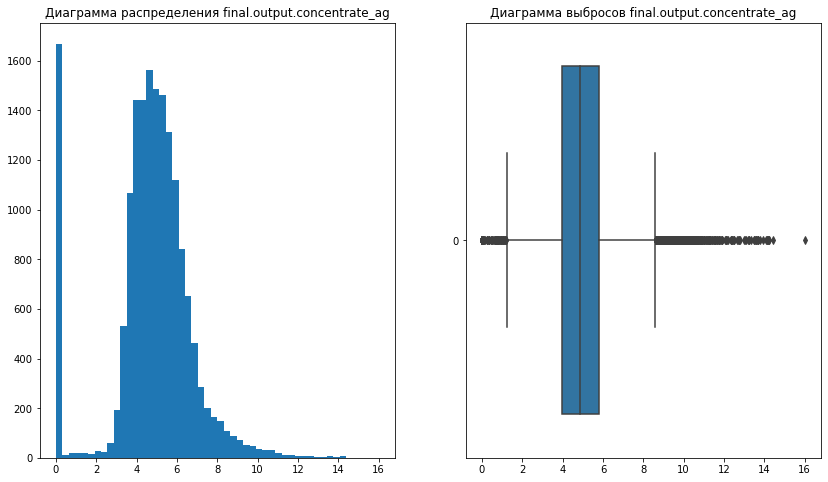

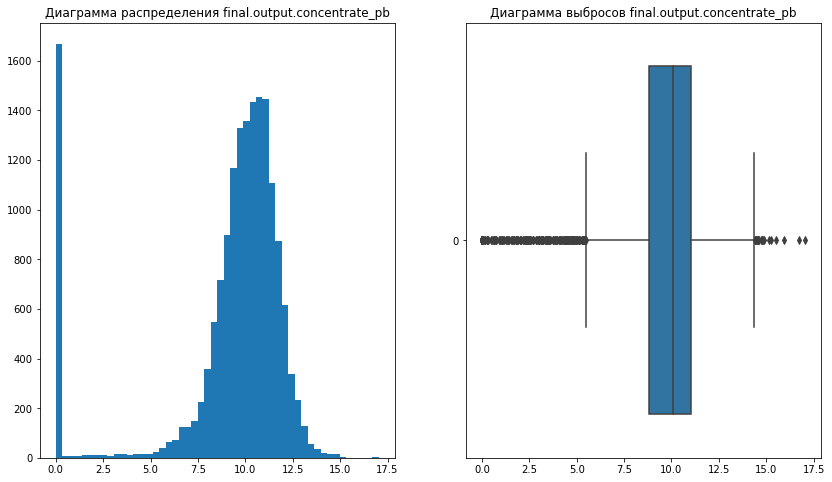

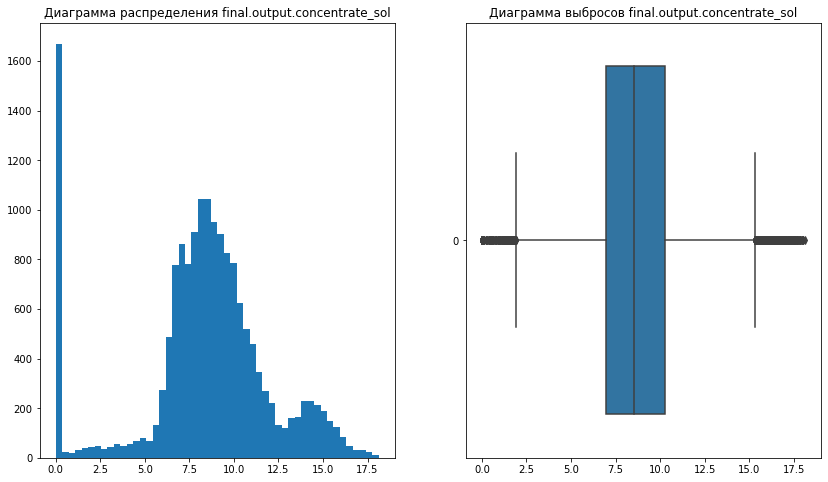

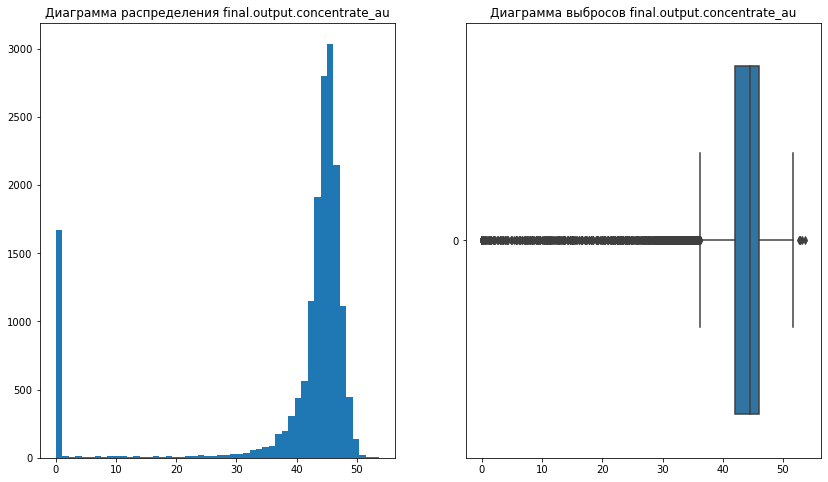

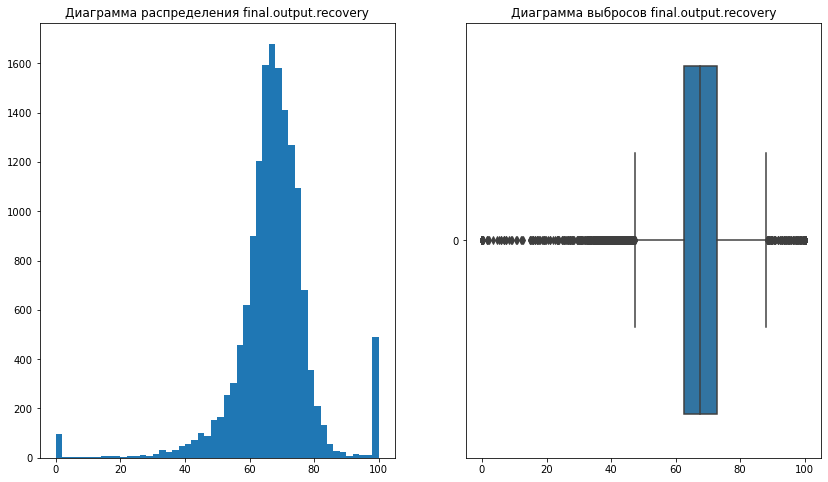

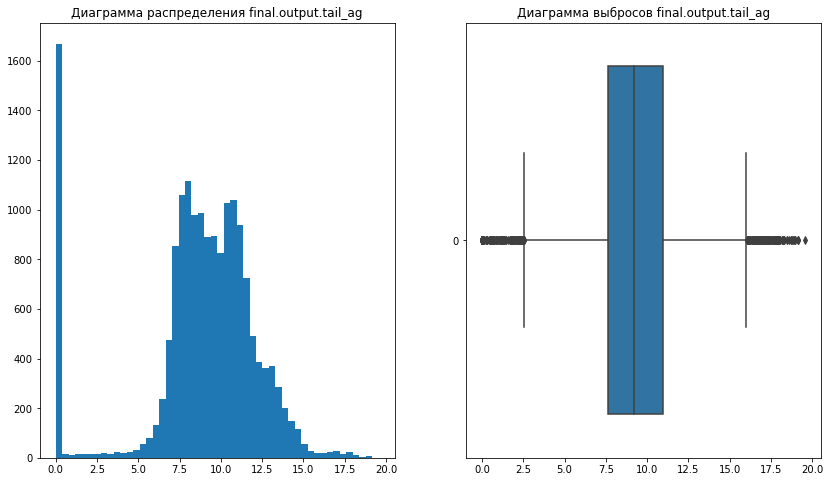

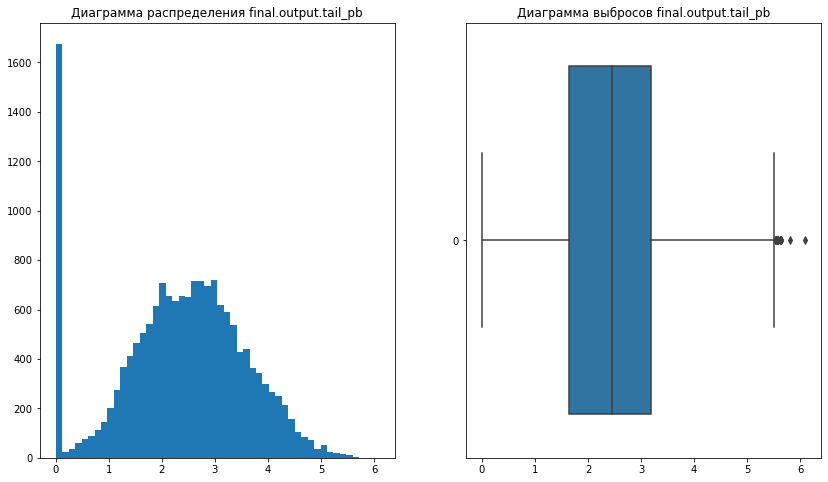

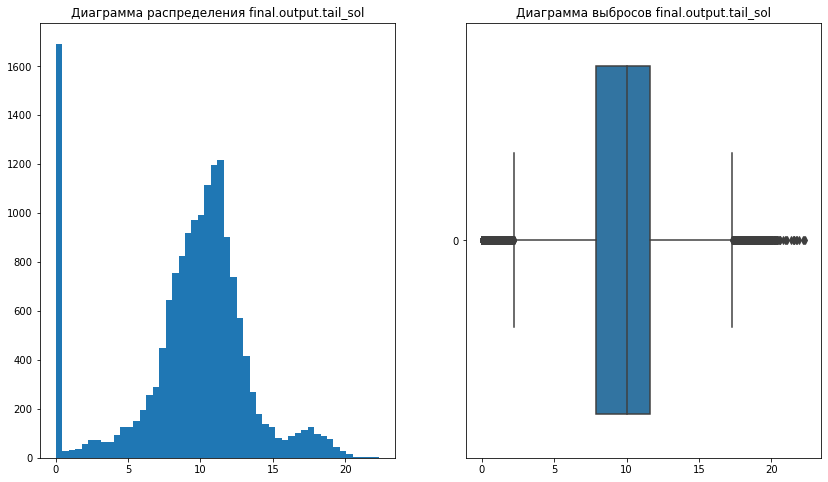

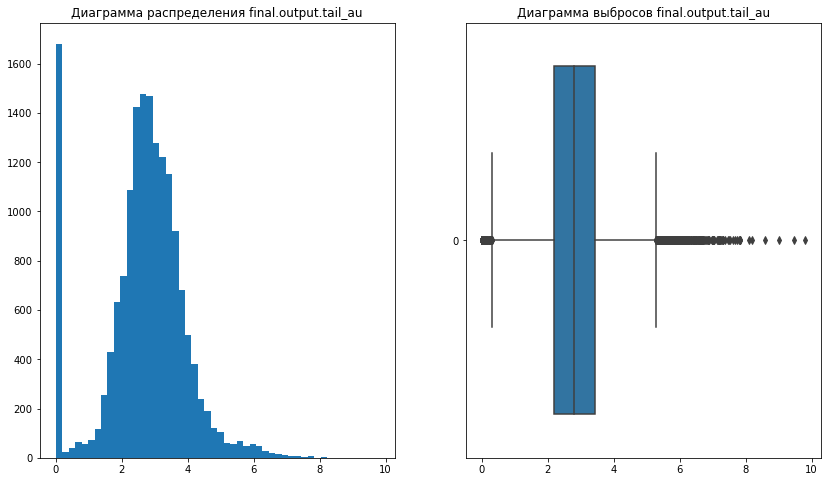

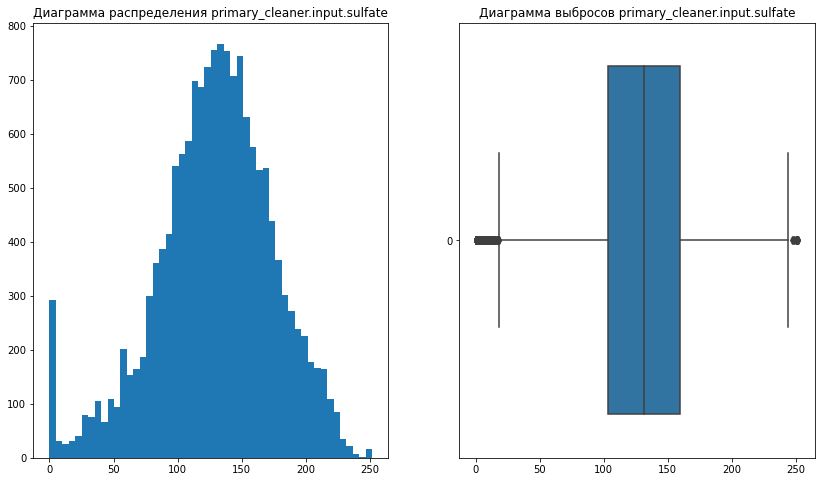

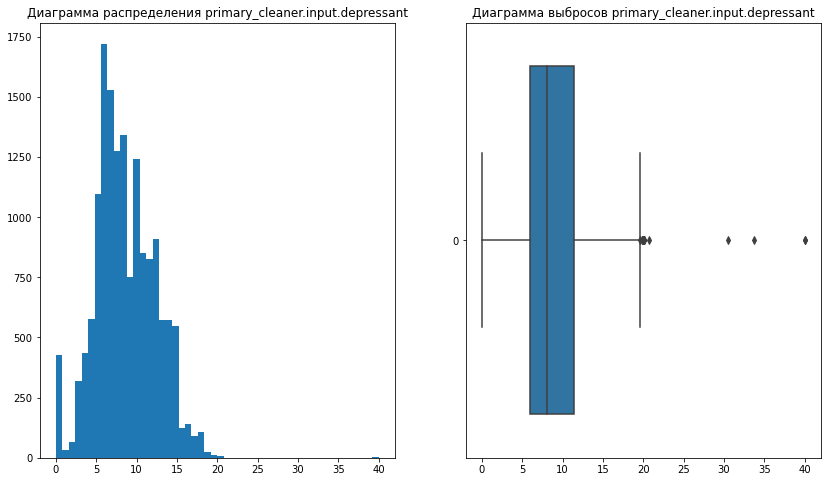

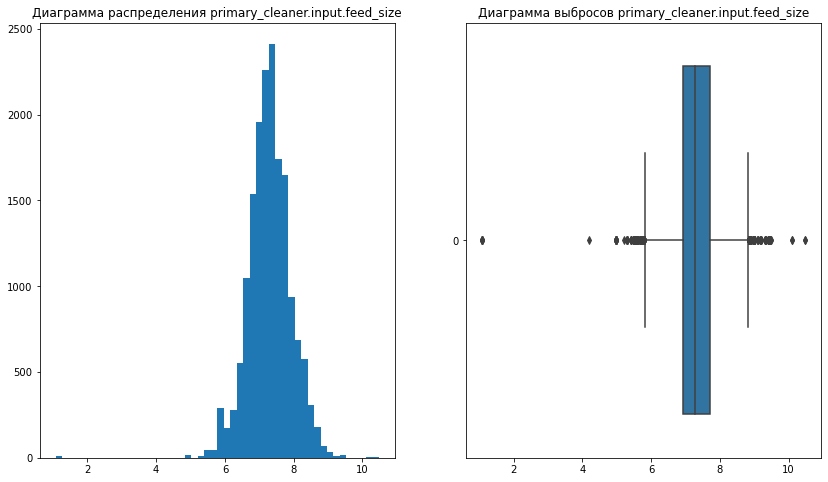

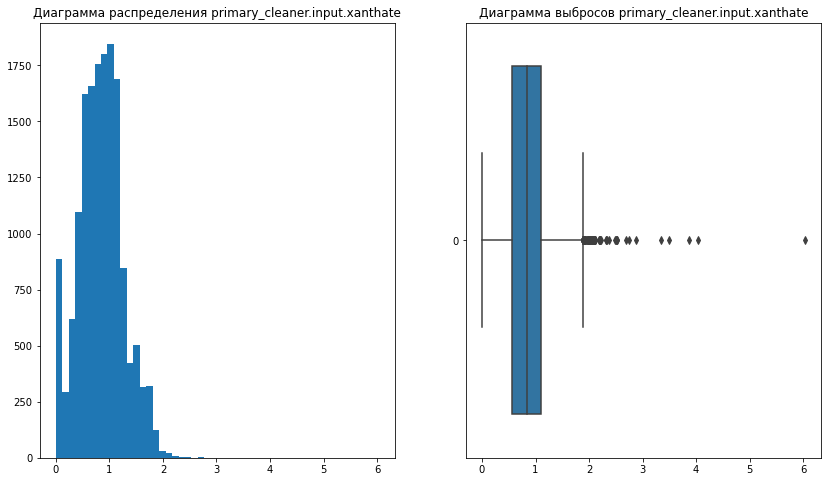

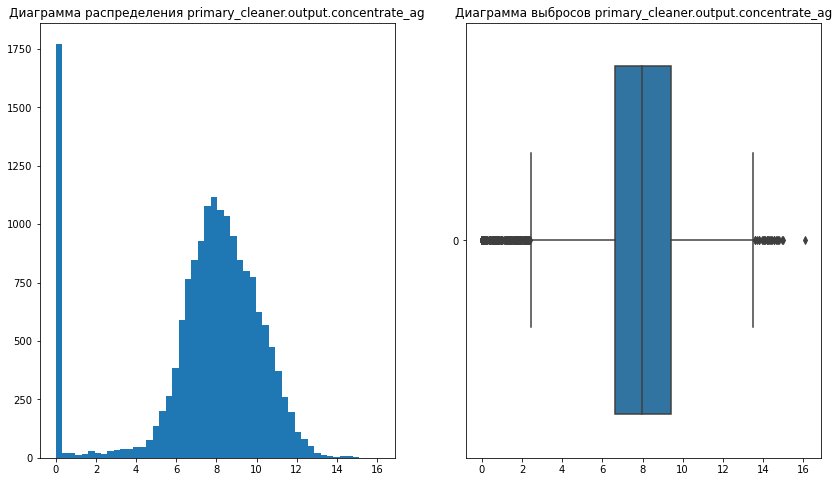

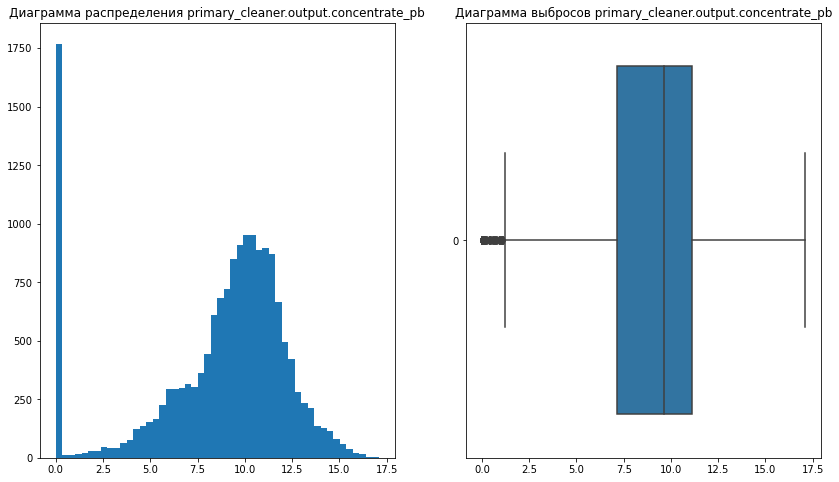

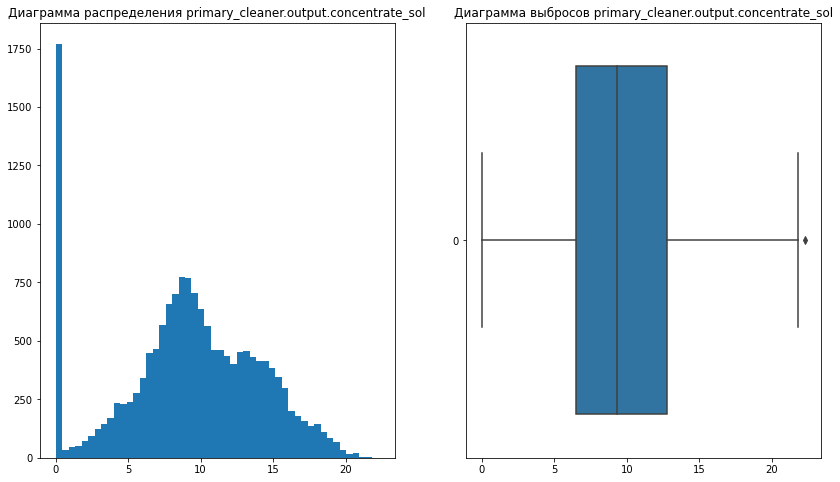

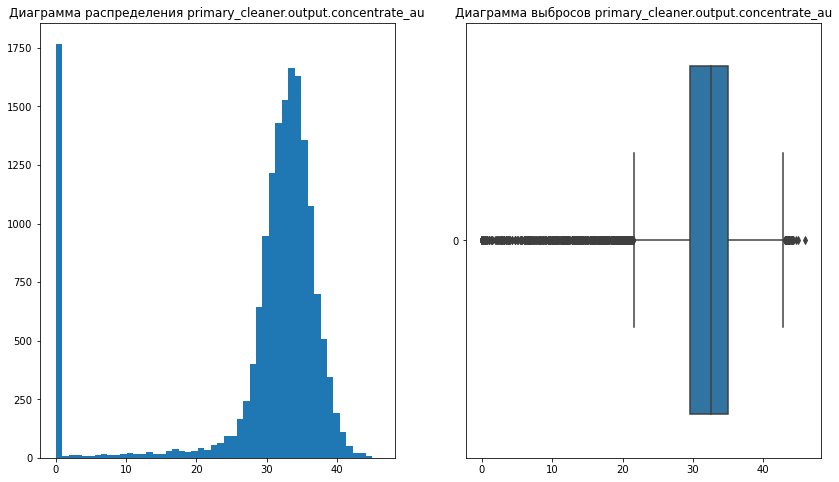

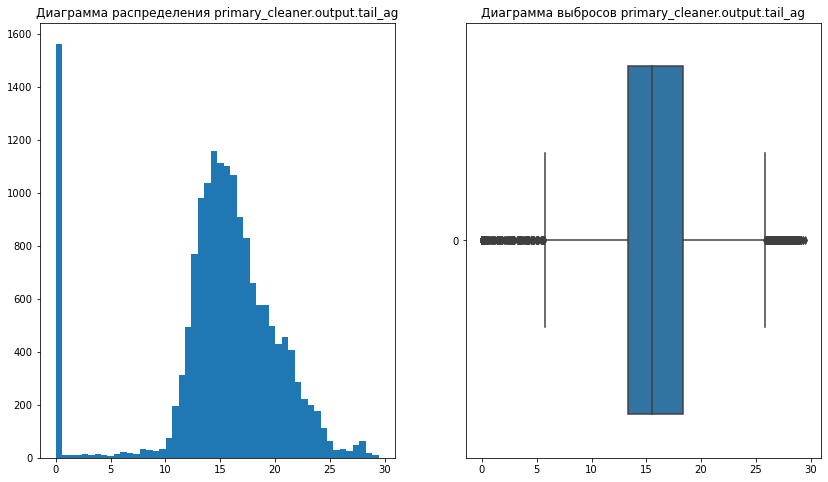

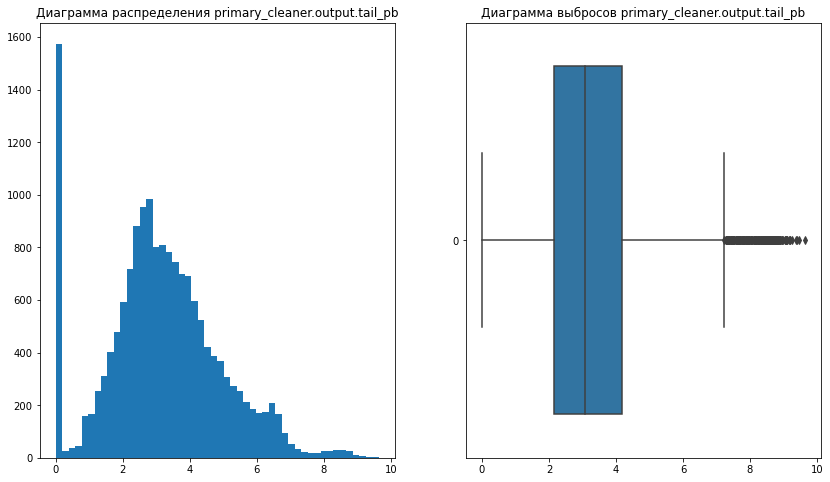

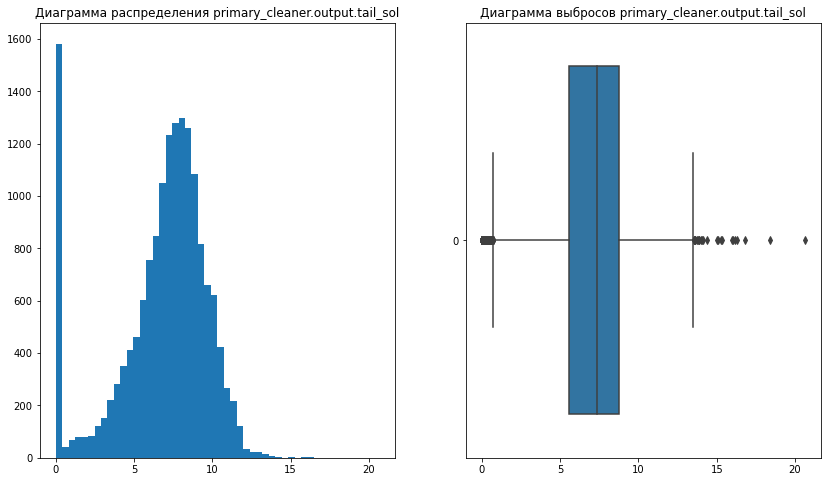

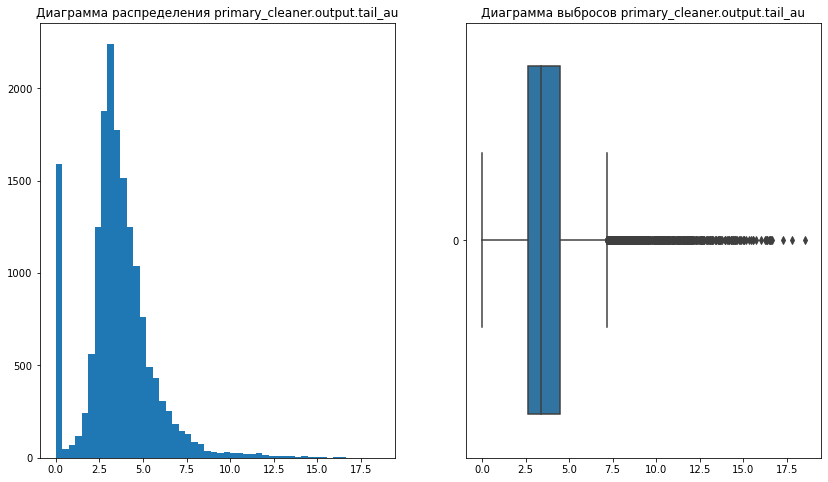

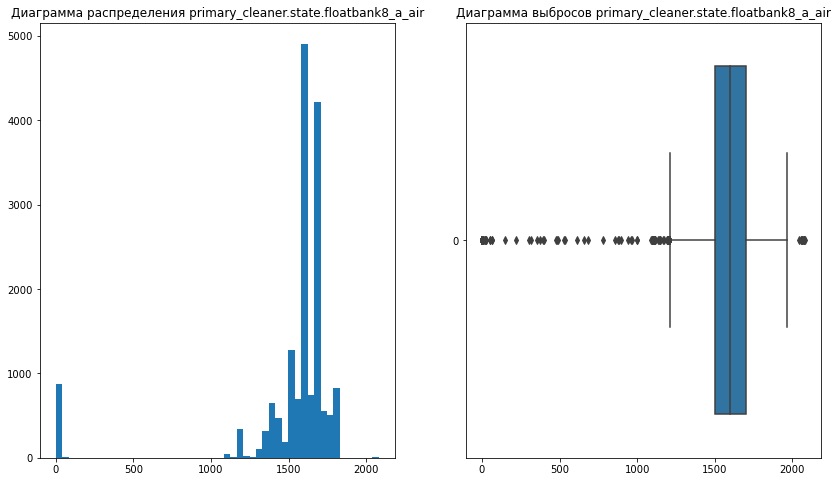

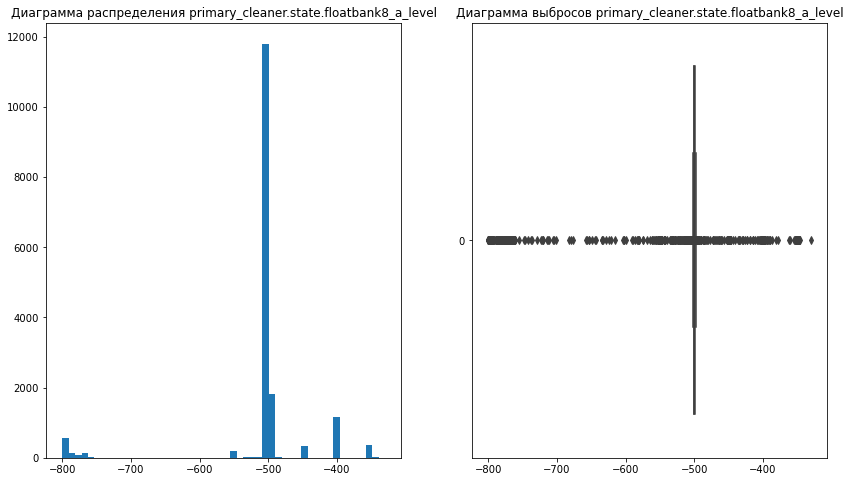

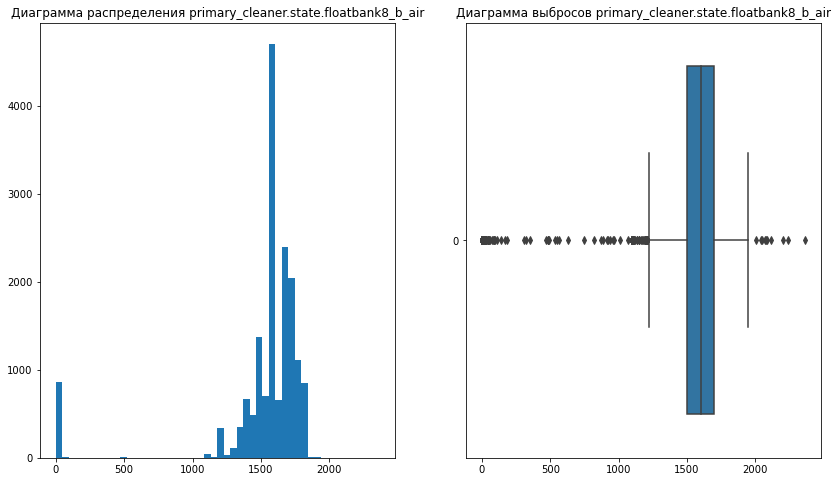

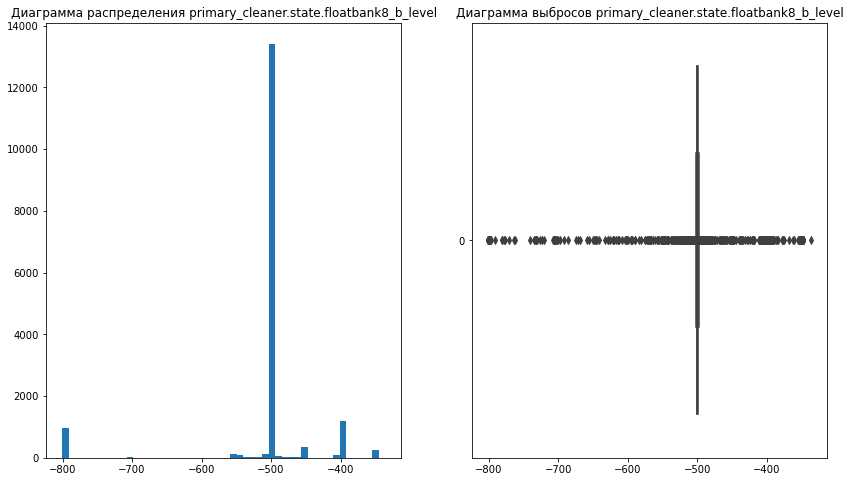

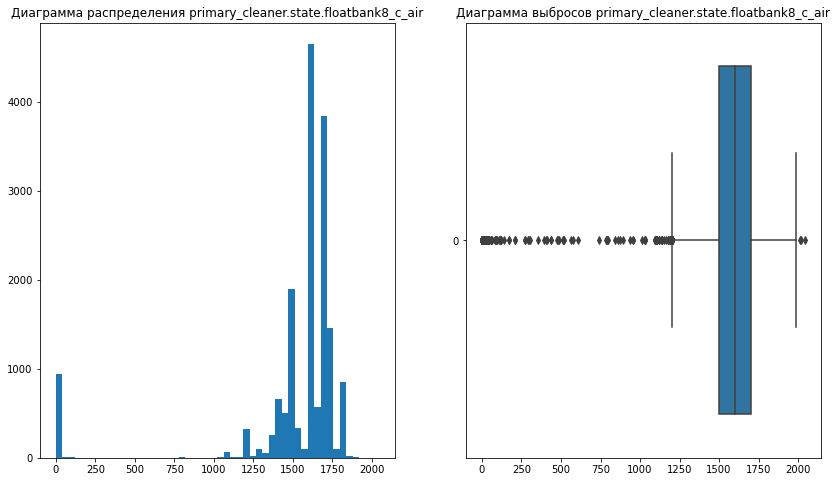

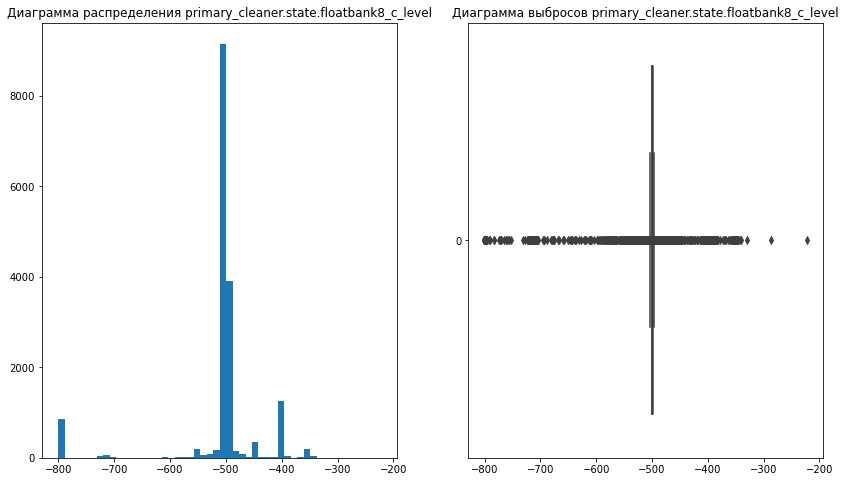

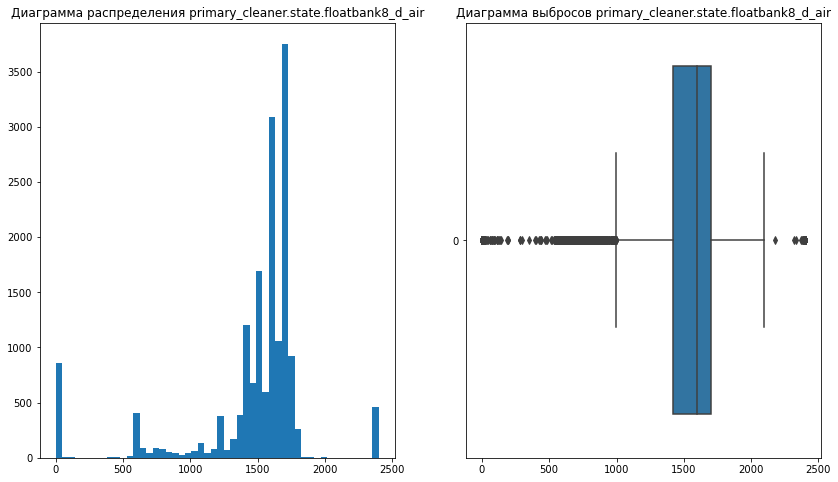

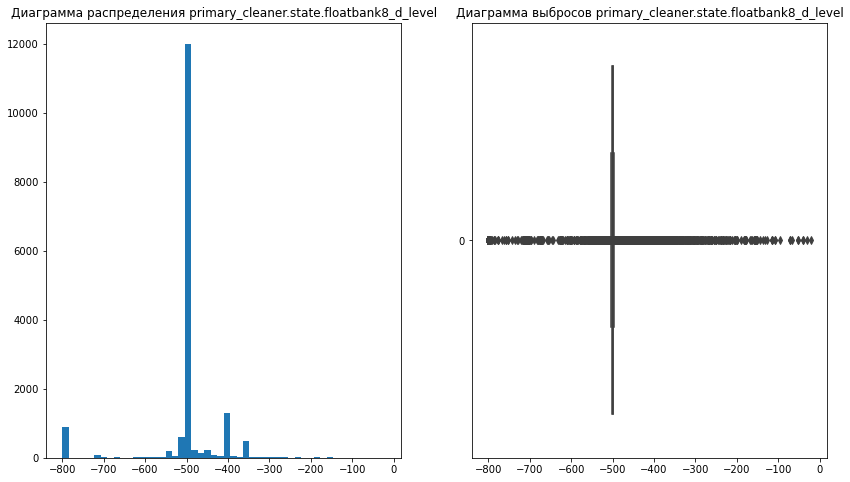

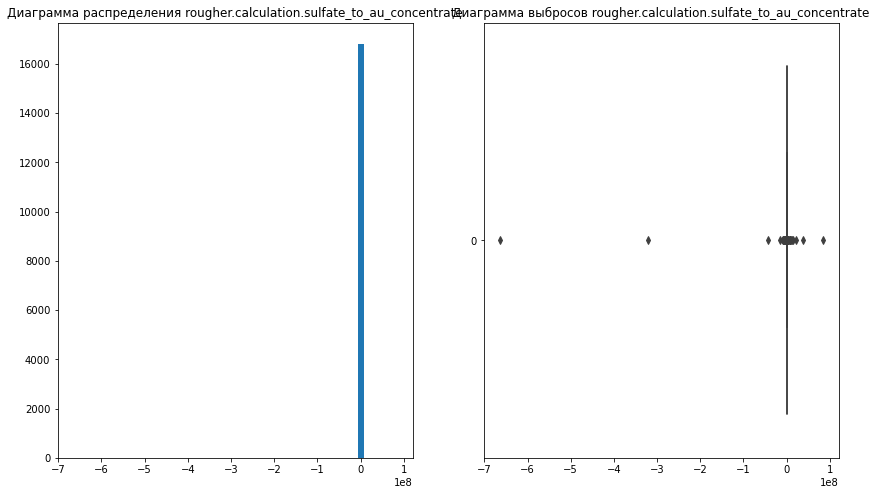

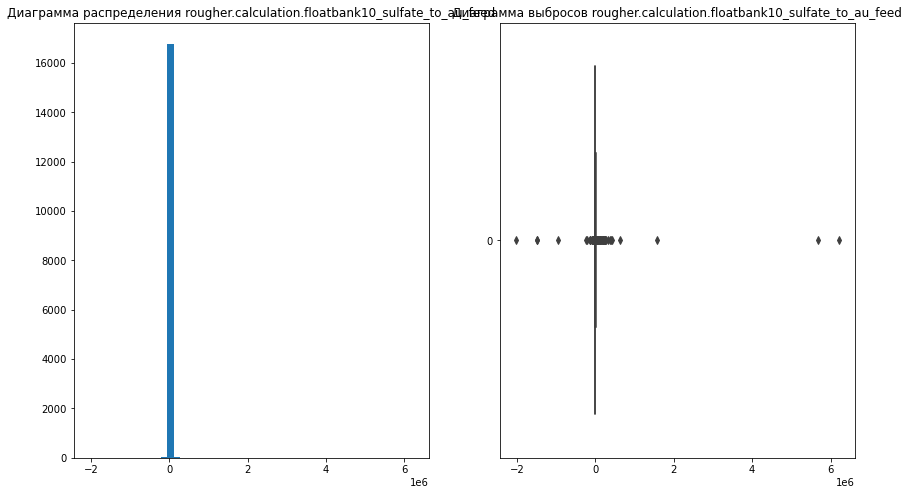

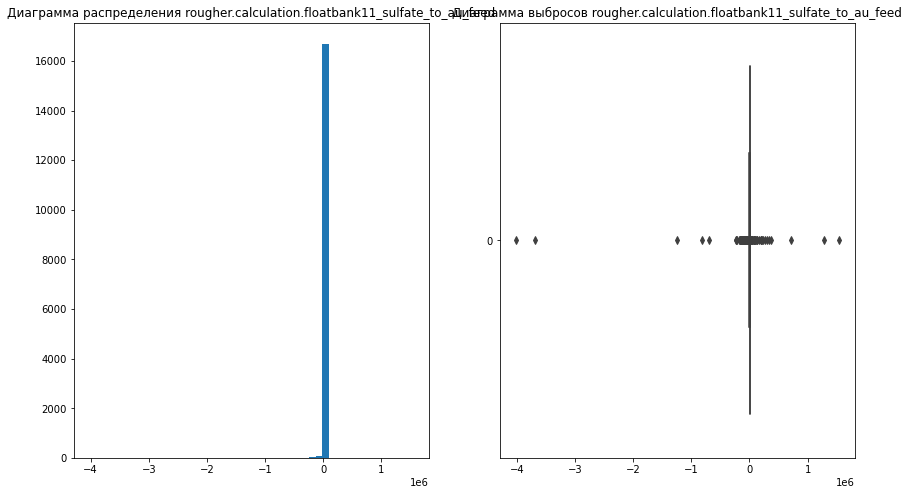

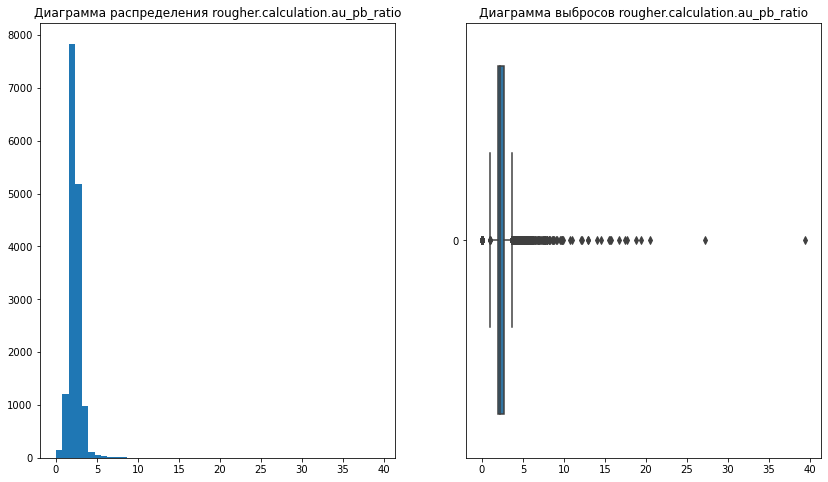

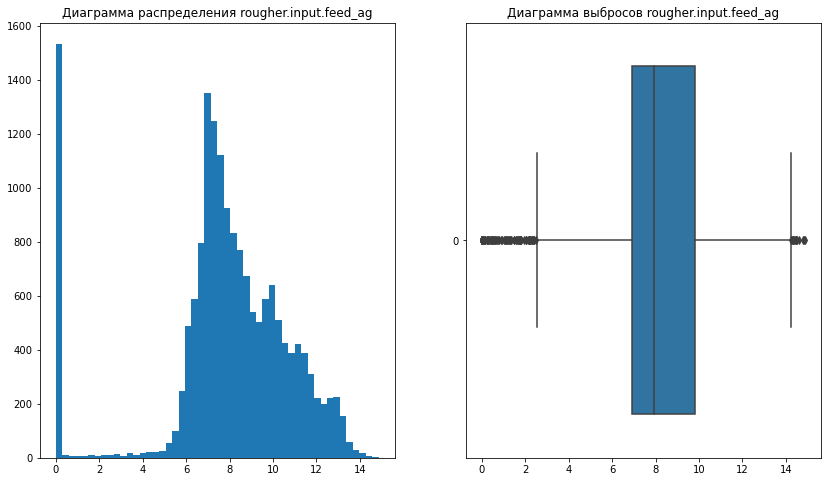

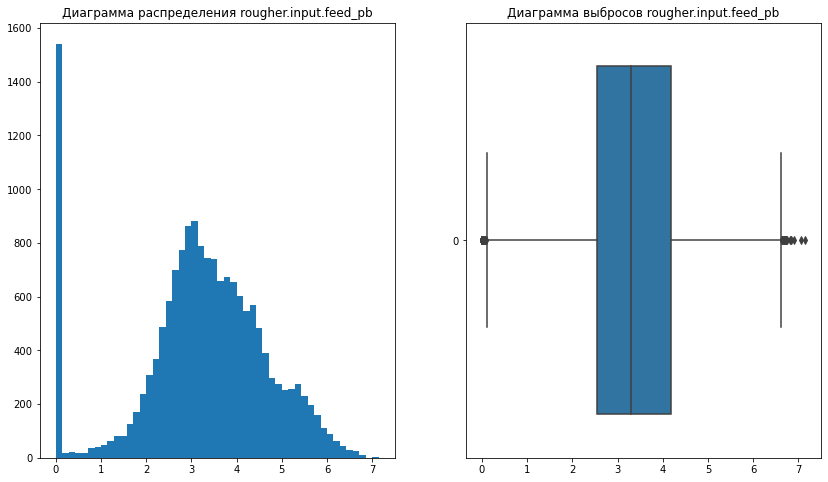

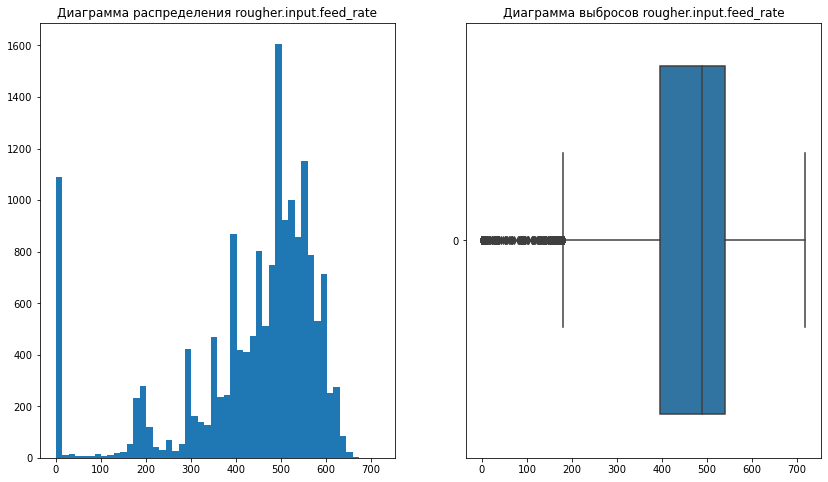

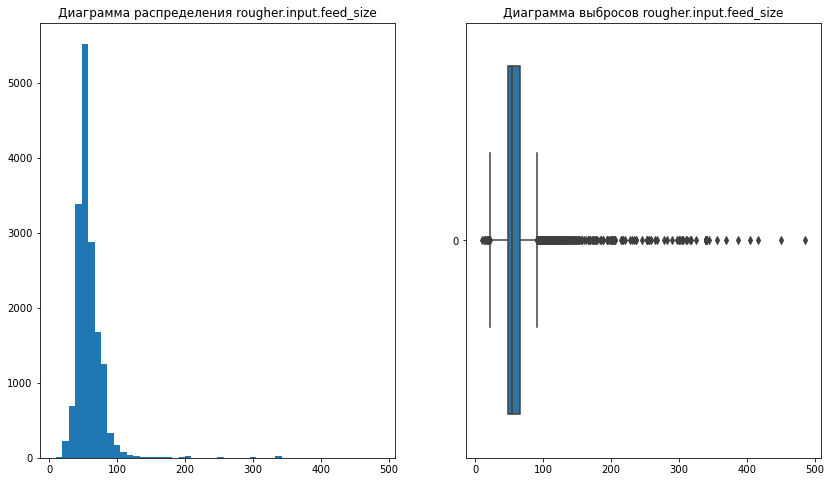

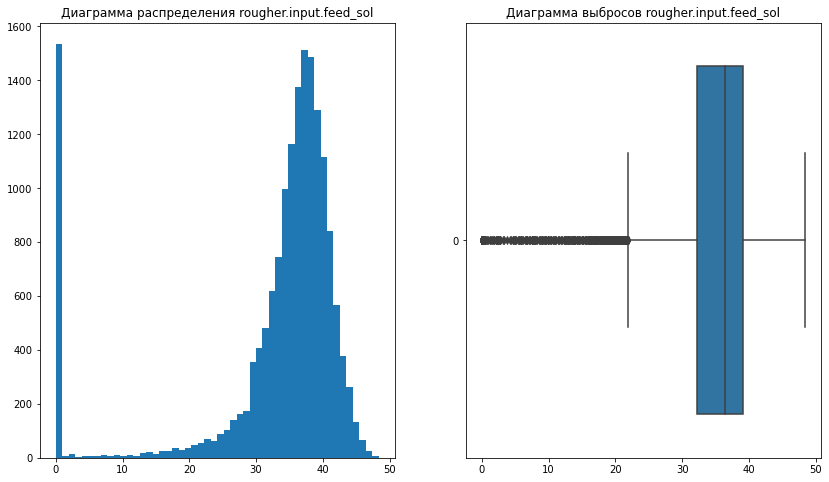

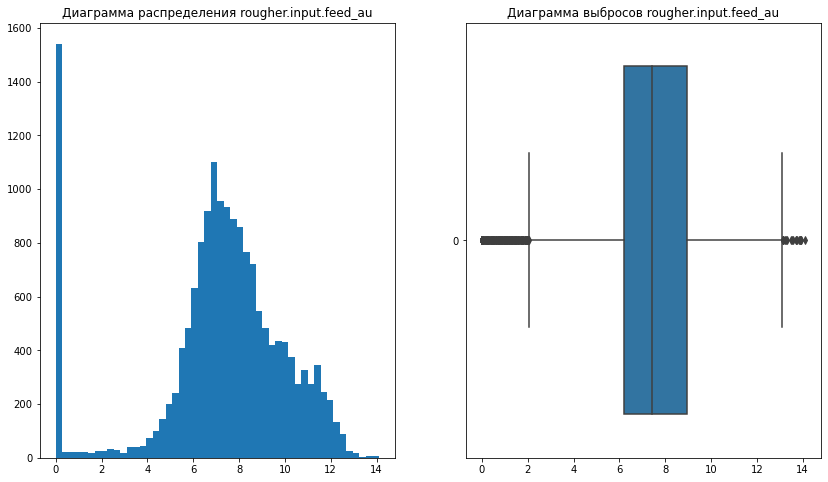

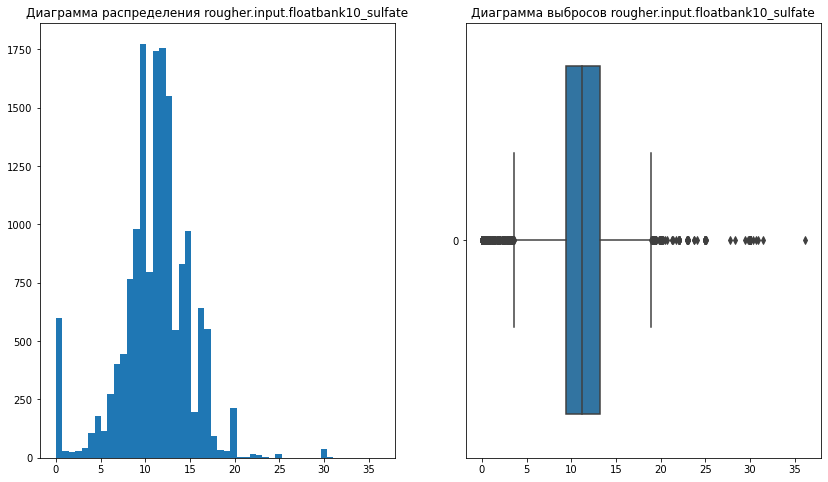

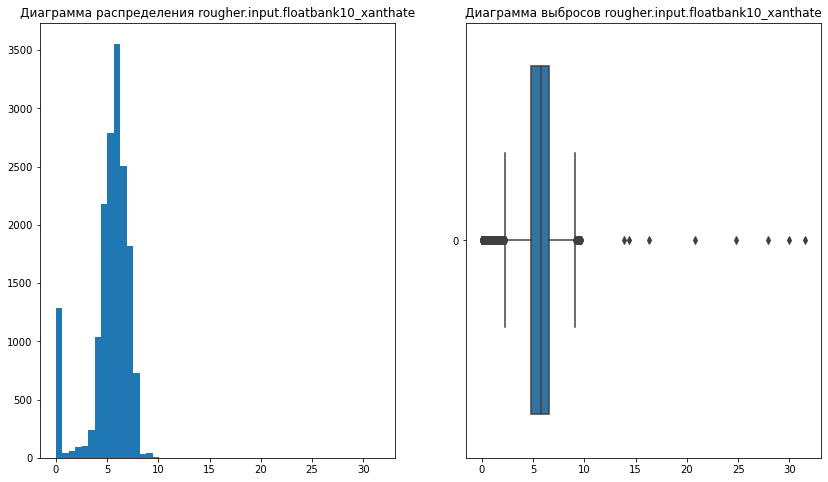

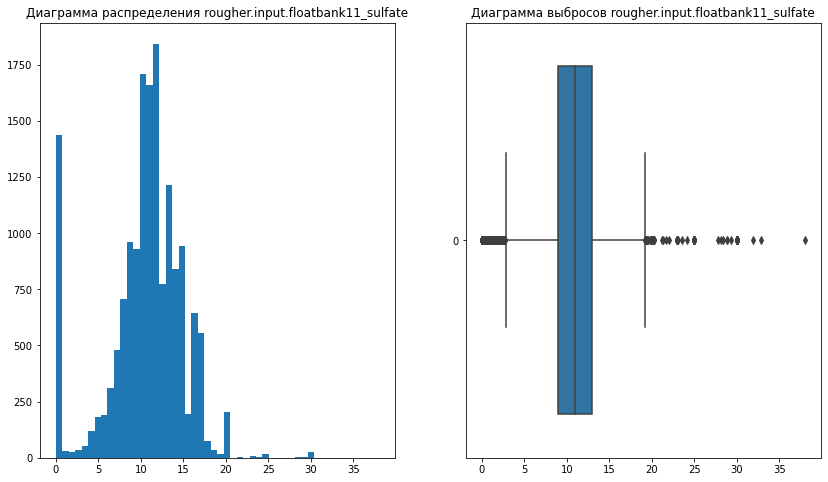

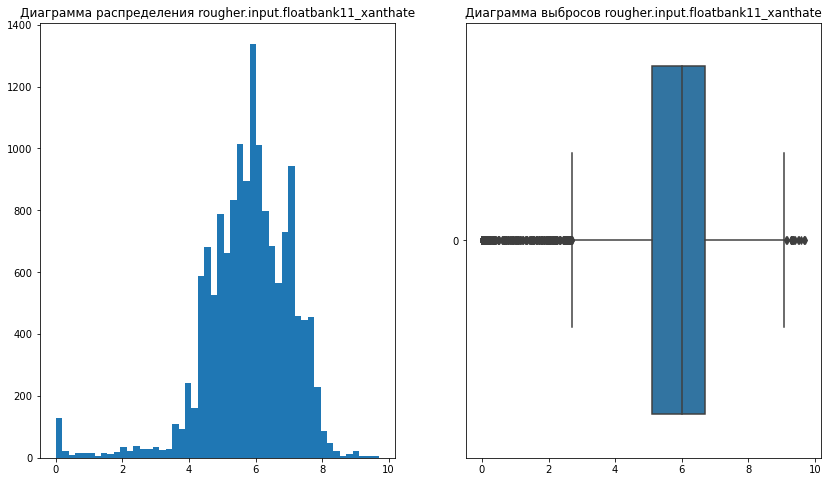

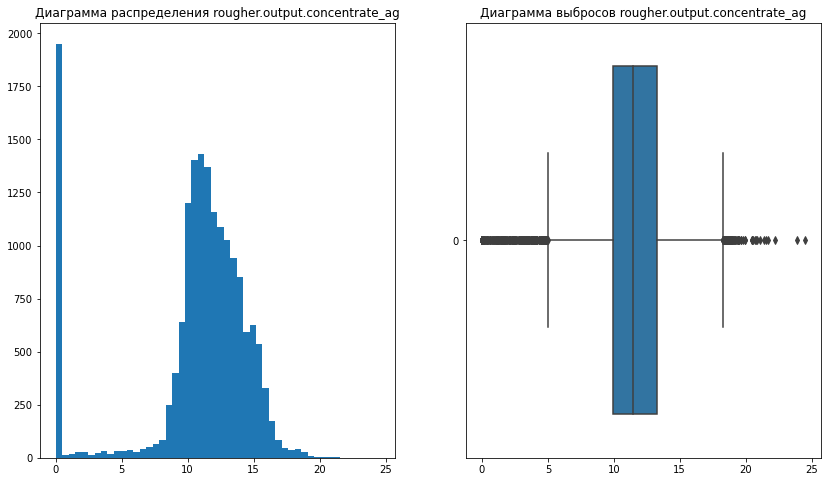

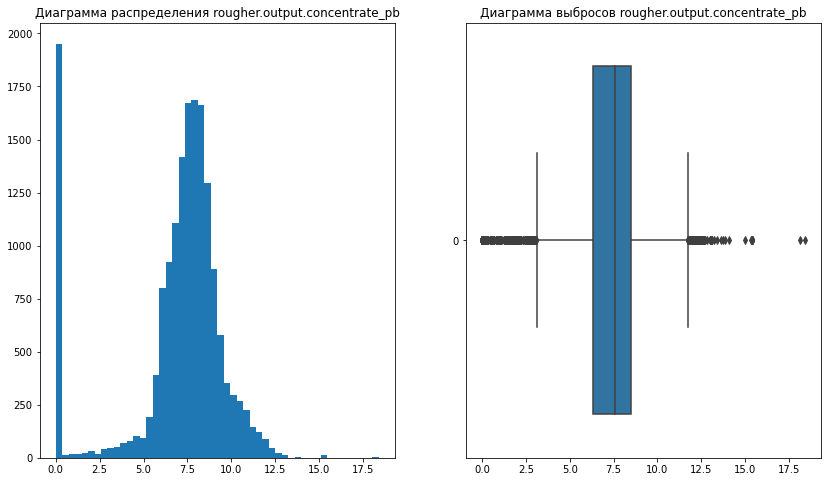

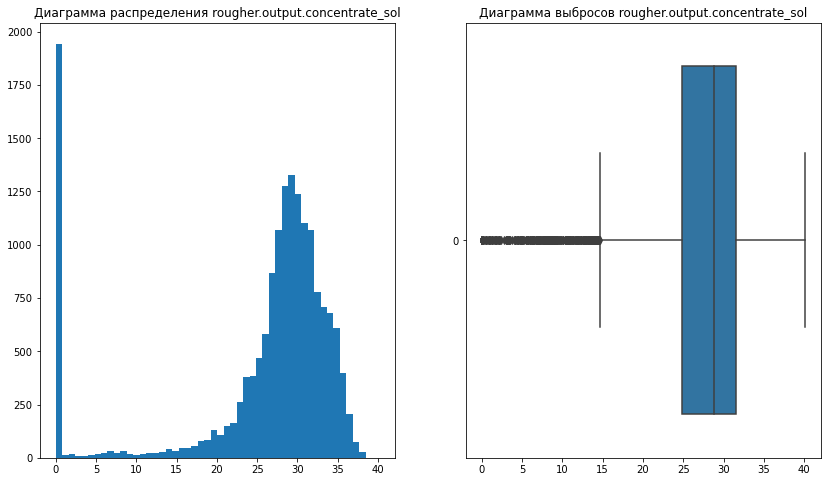

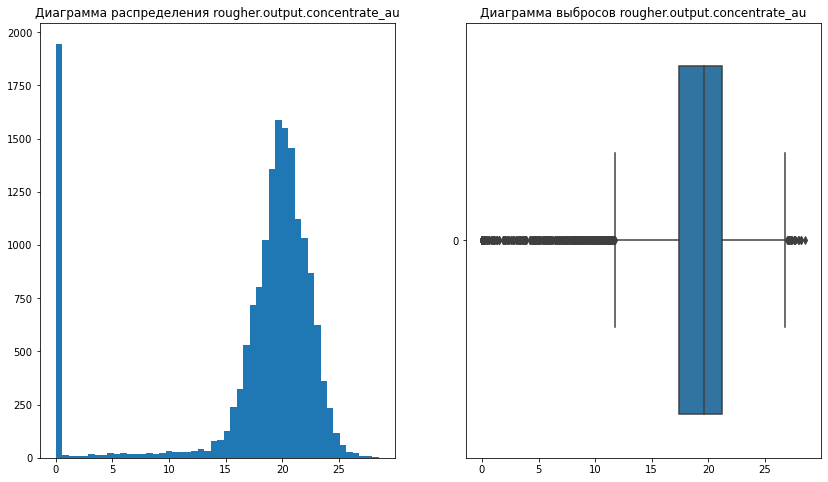

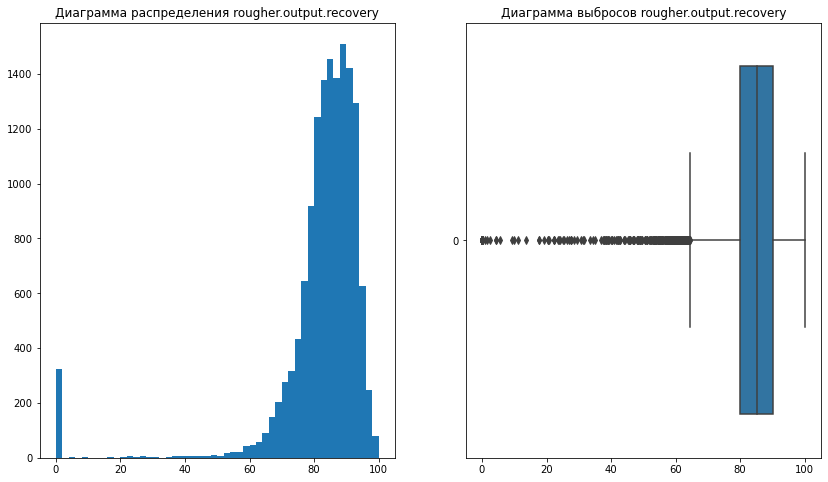

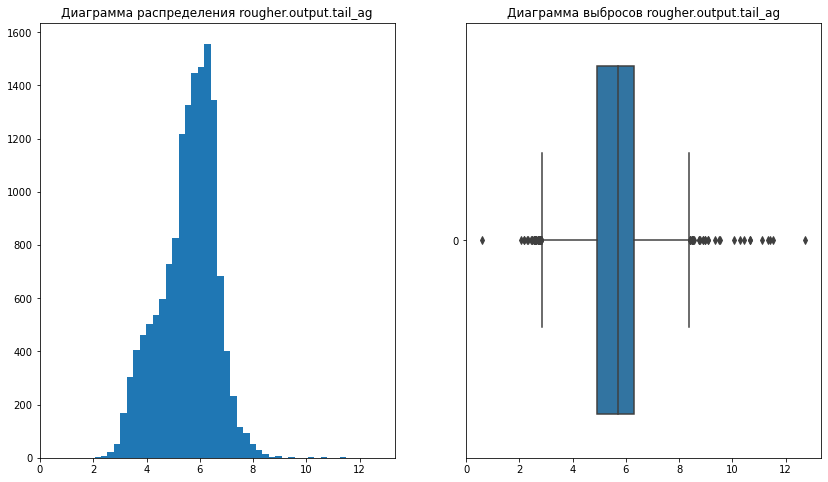

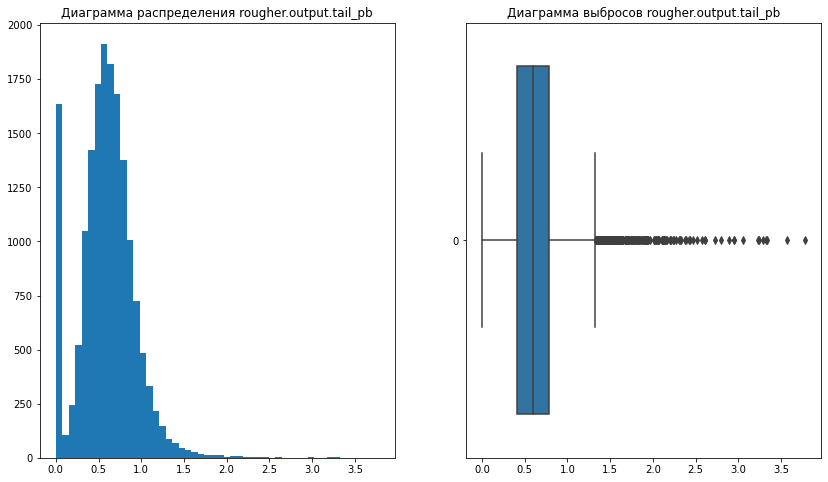

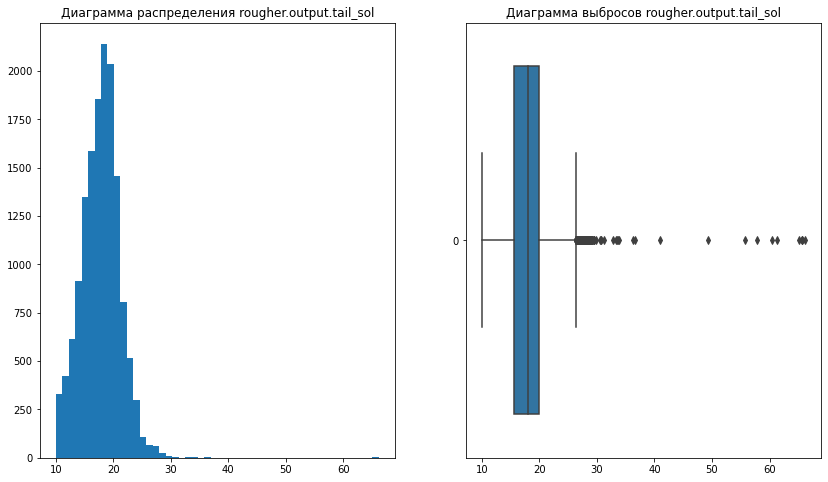

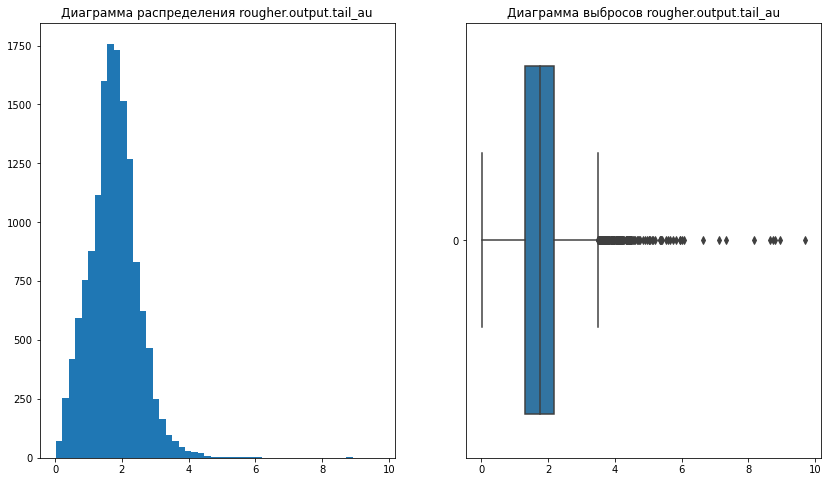

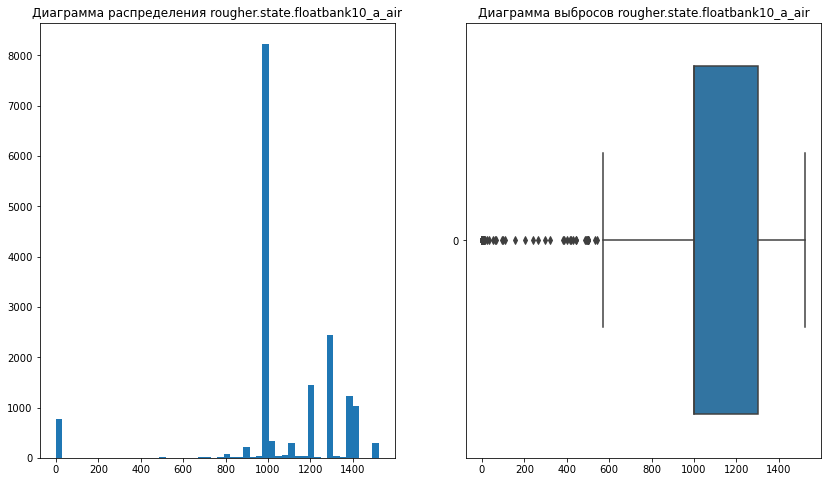

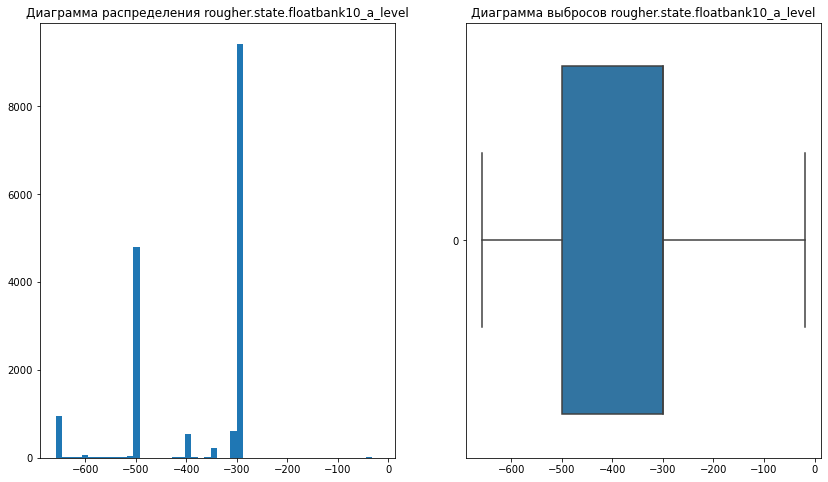

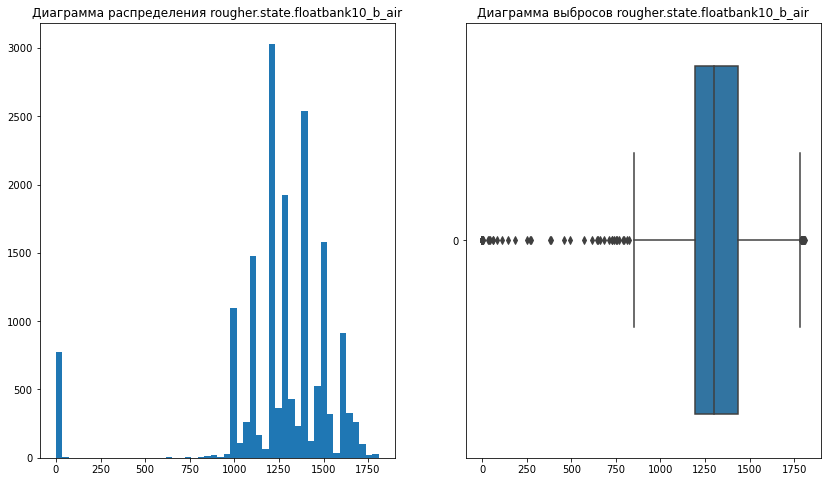

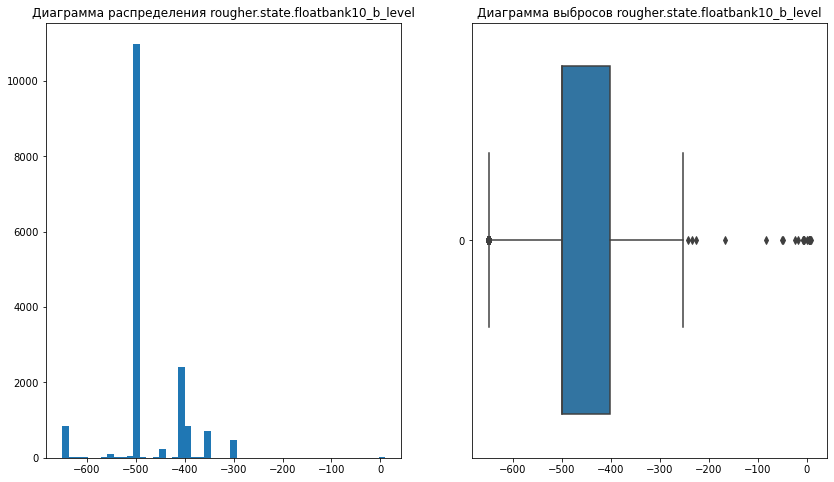

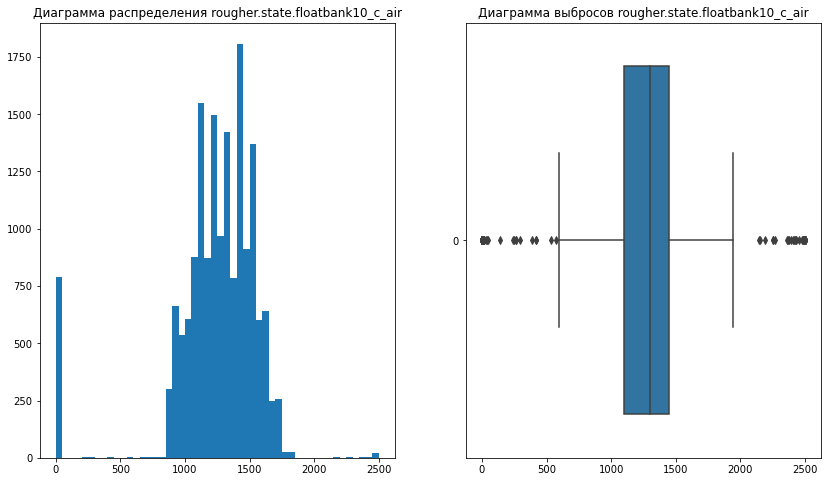

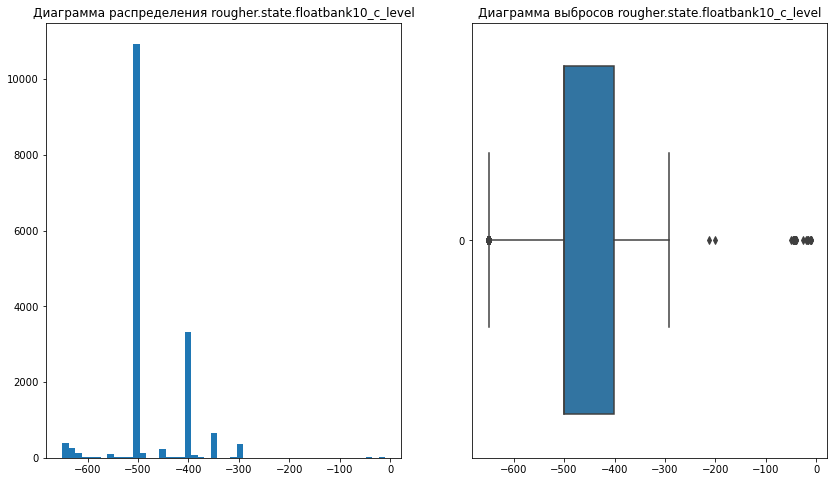

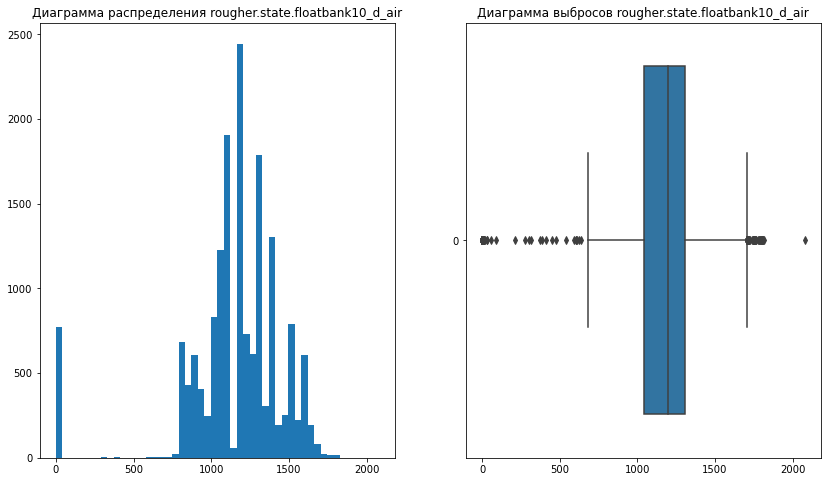

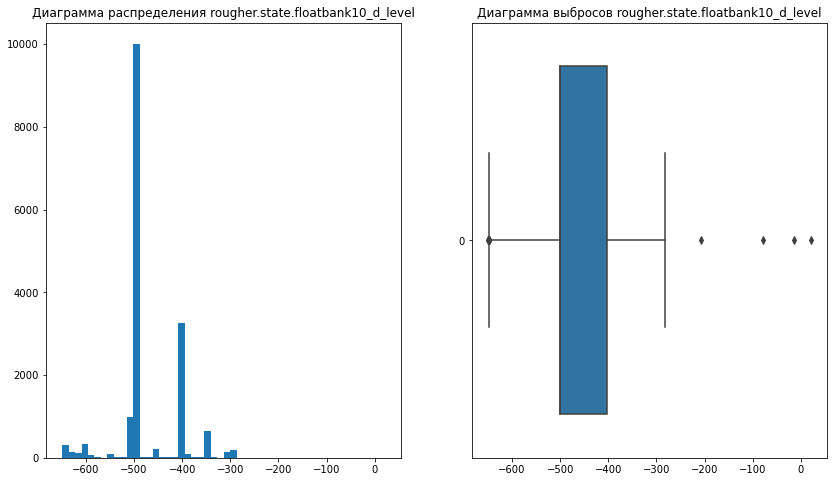

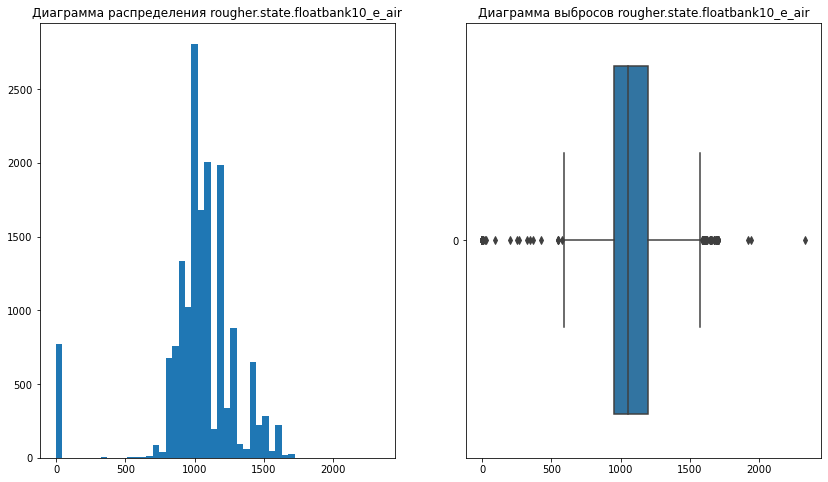

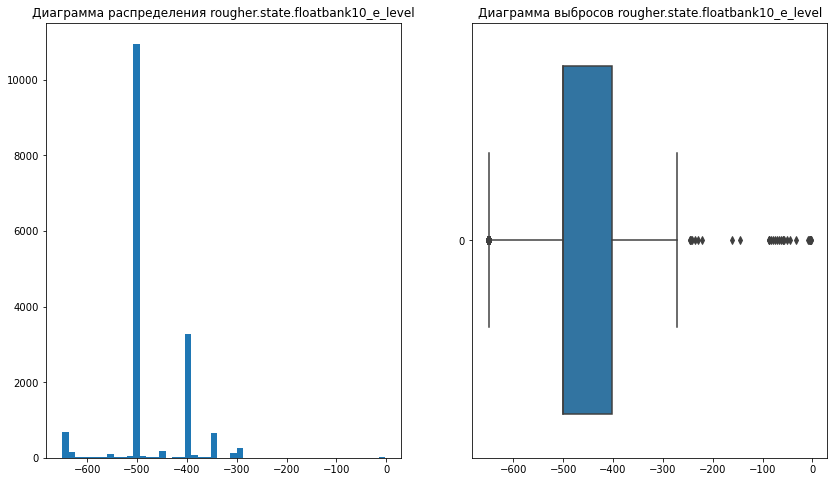

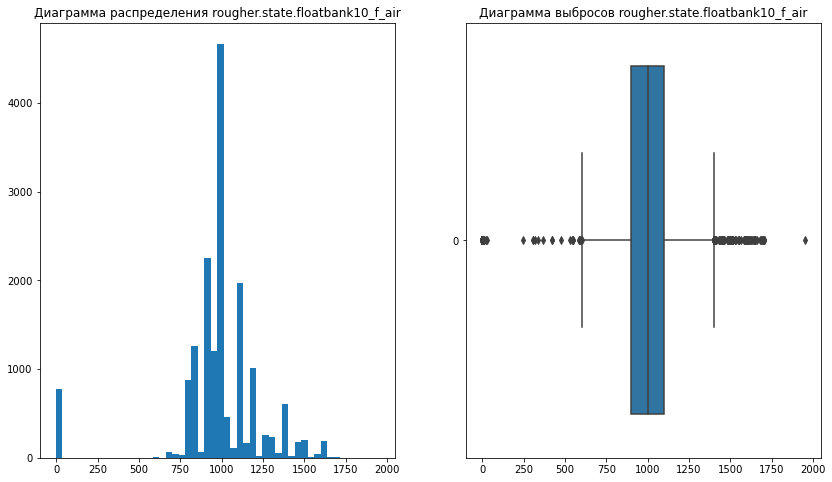

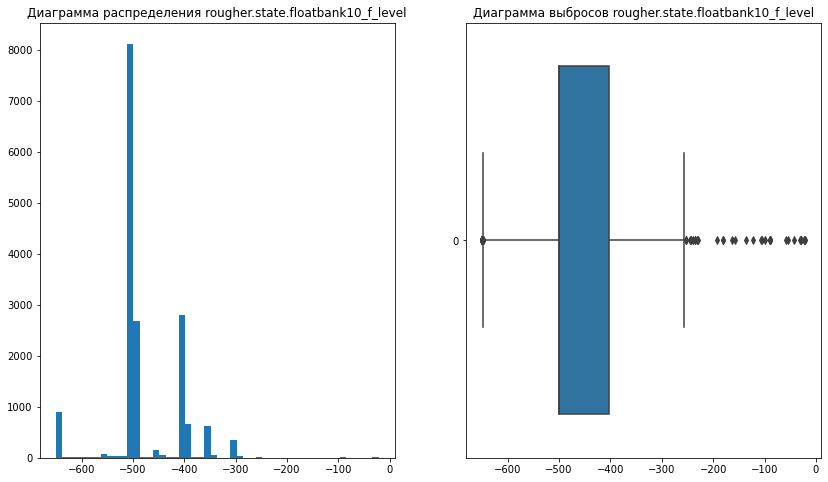

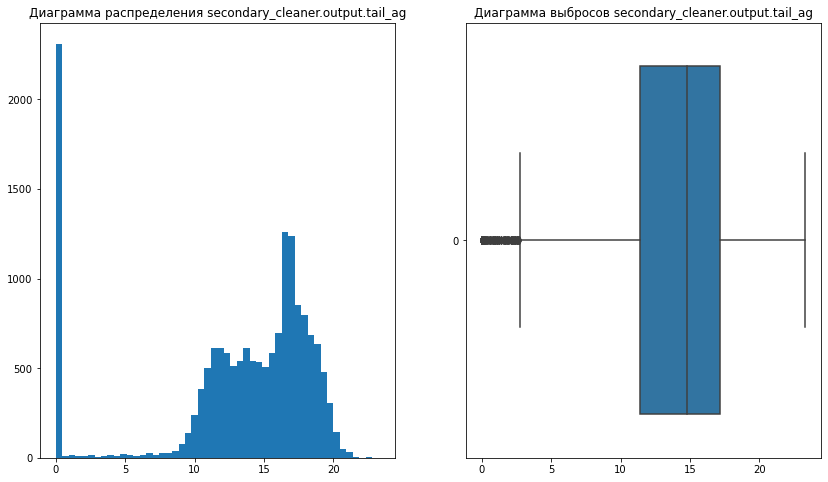

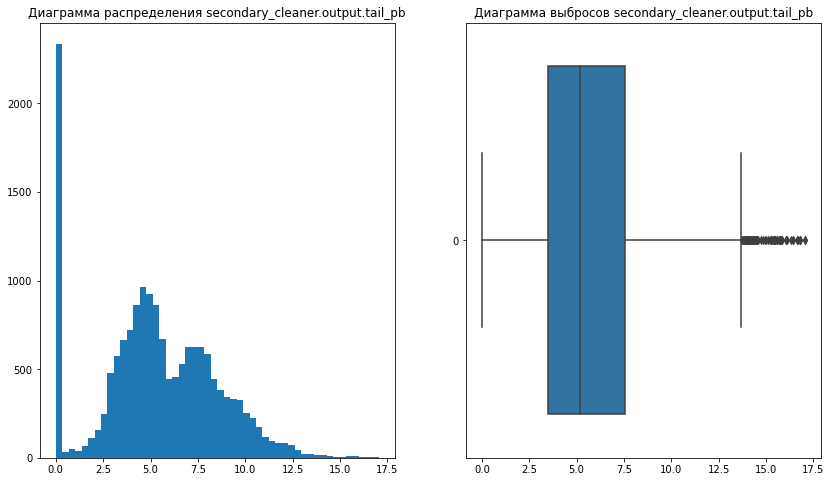

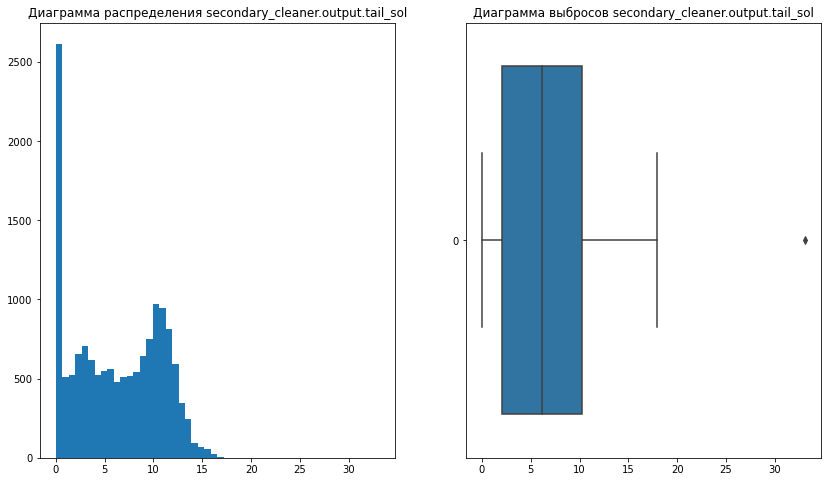

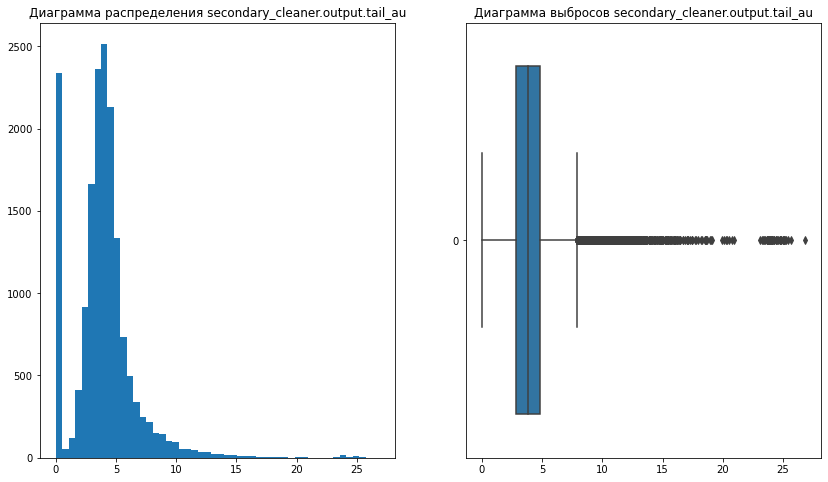

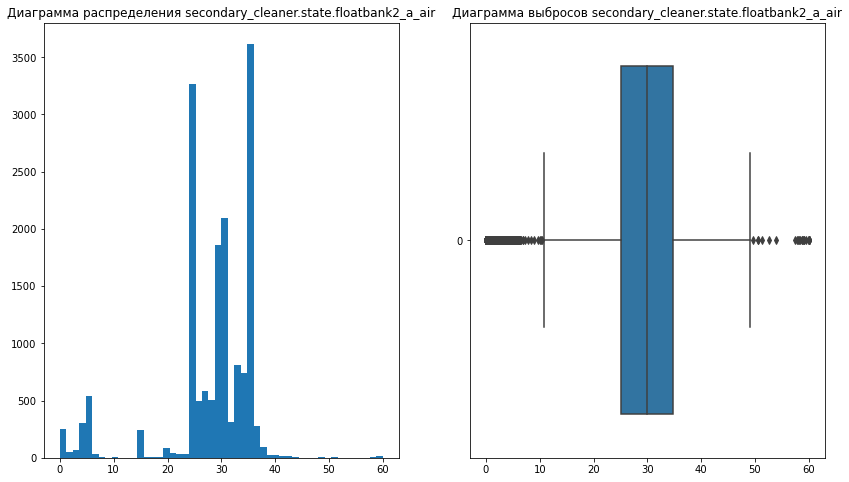

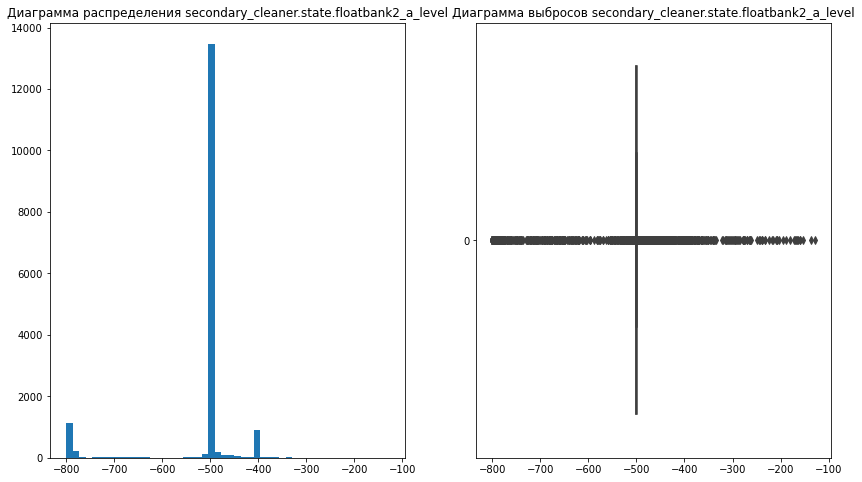

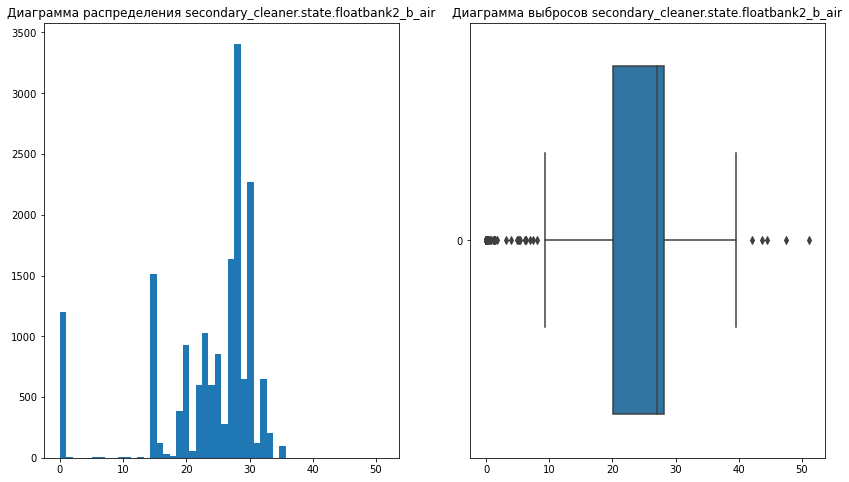

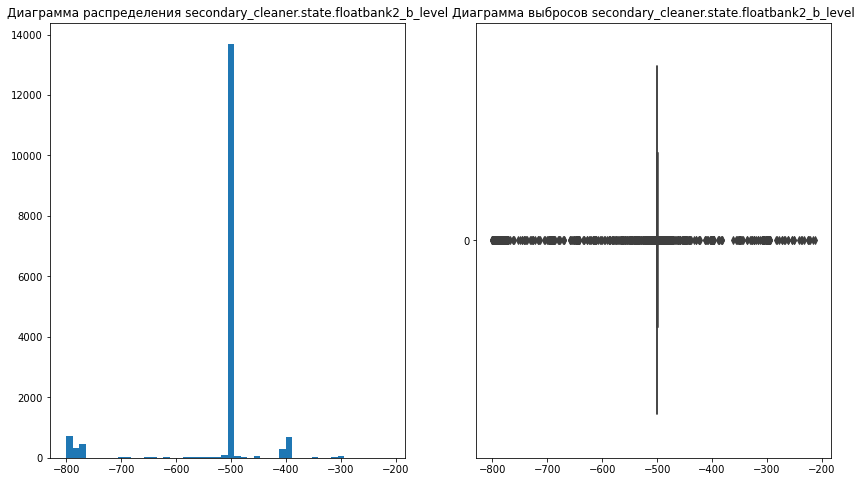

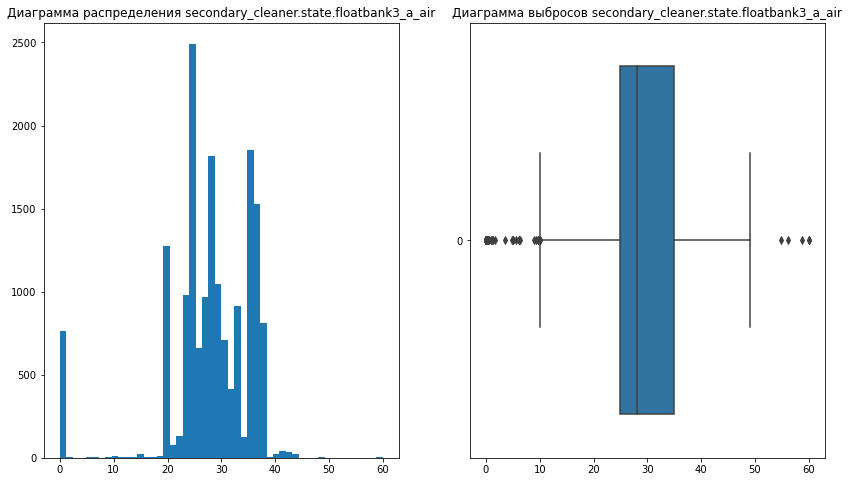

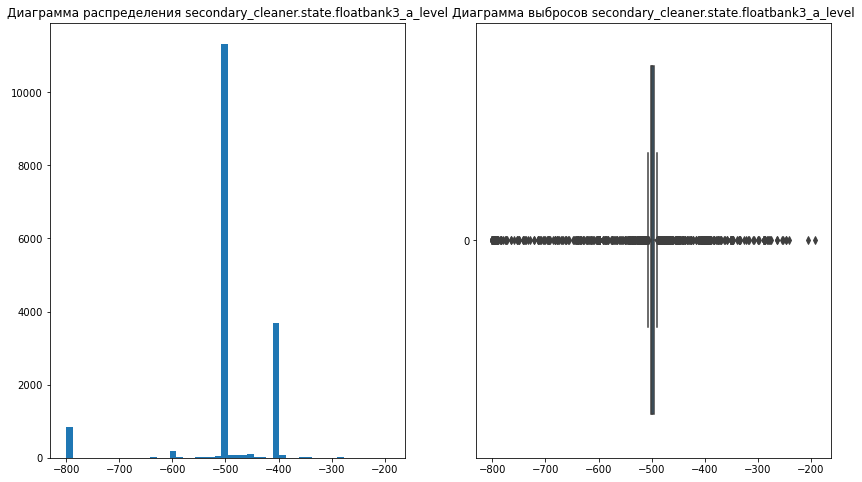

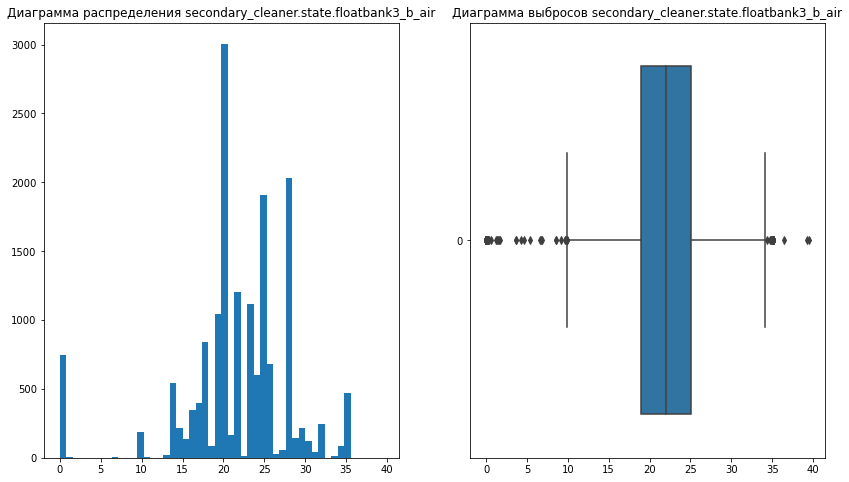

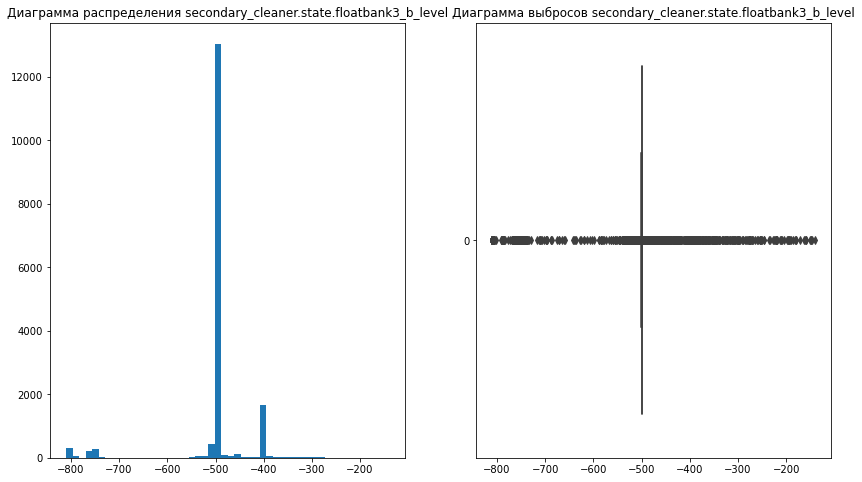

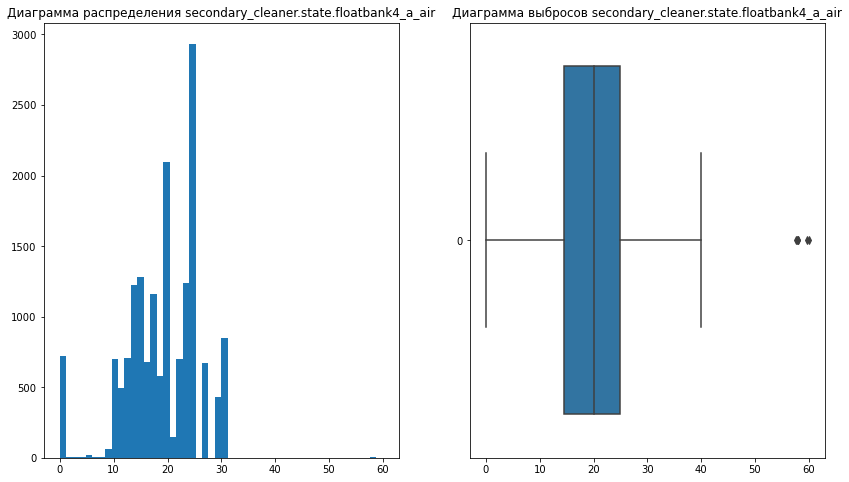

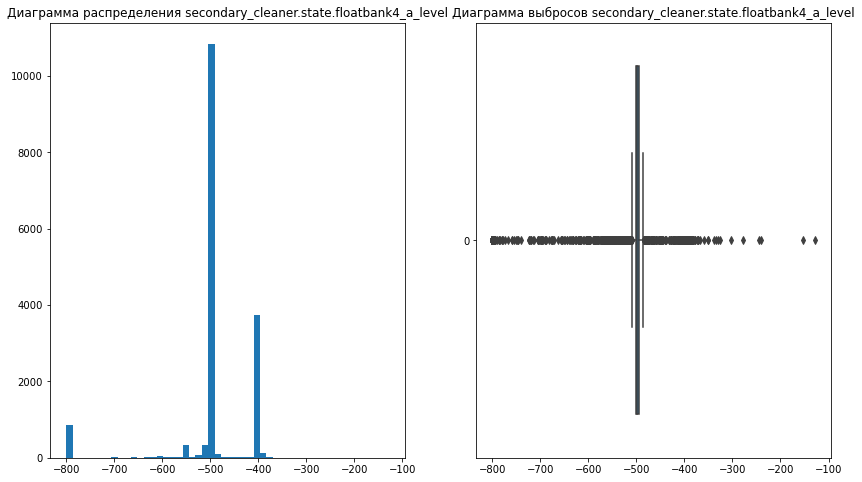

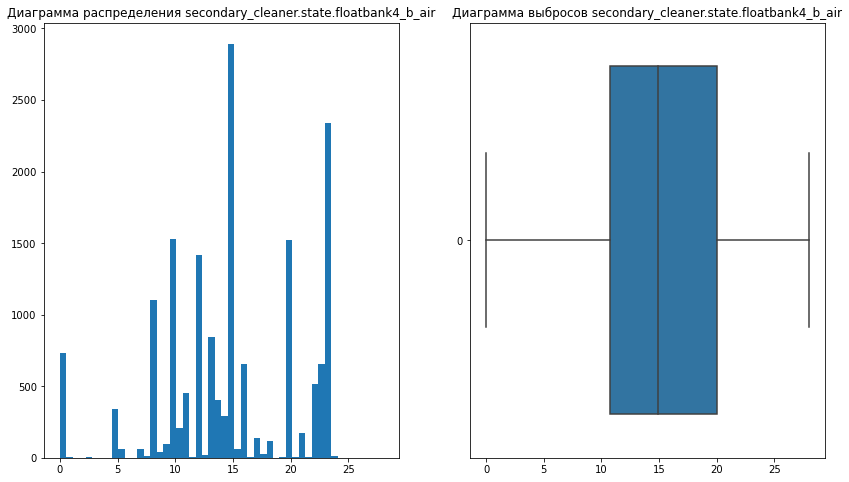

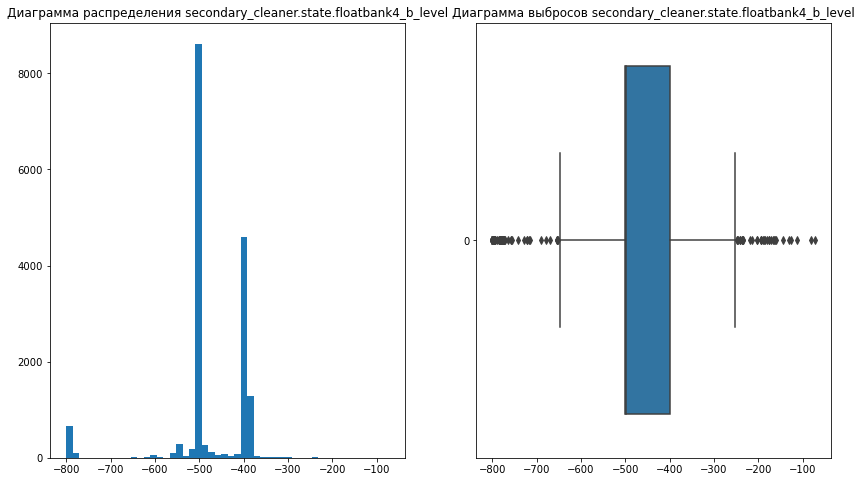

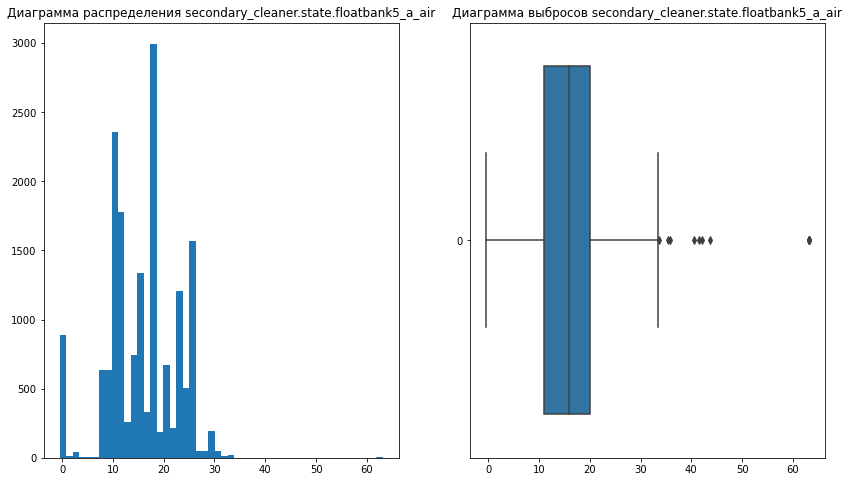

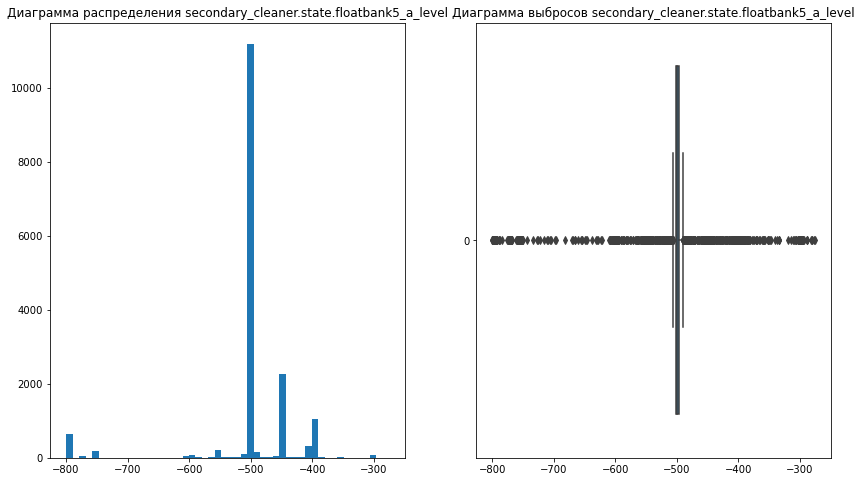

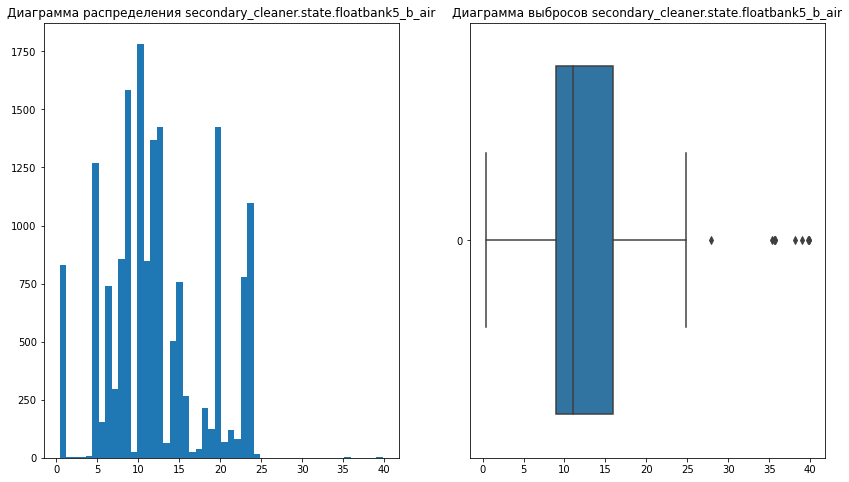

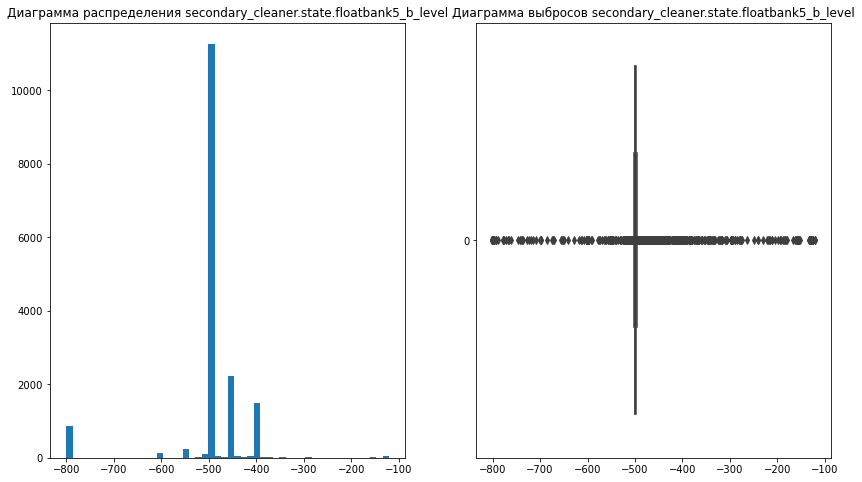

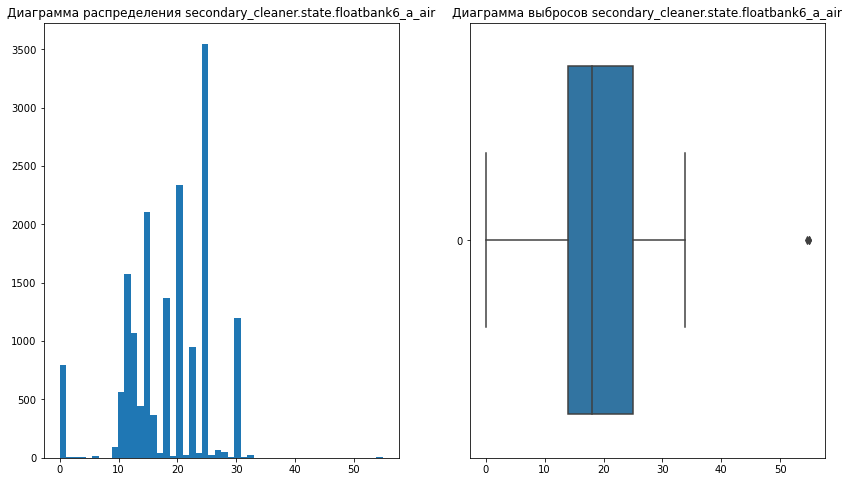

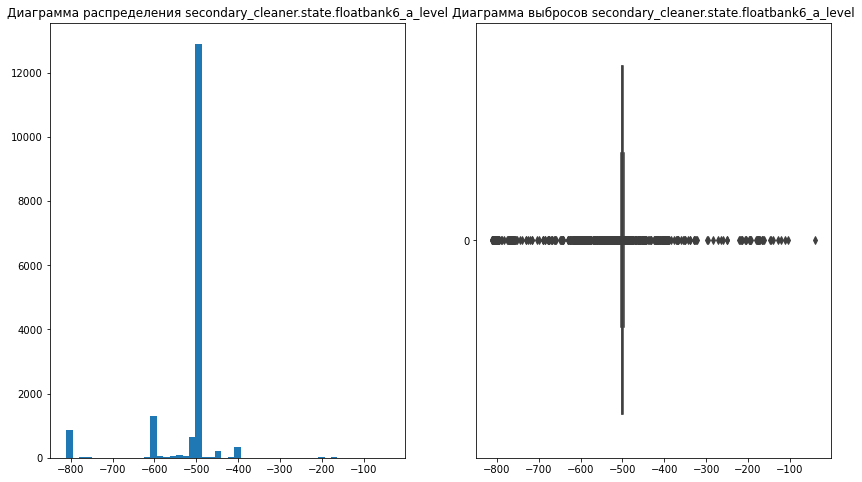

In [8]:
for column in data_train:
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, 
                                   ncols=2,
                                   figsize=(14, 8))
    ax1.hist(data_train[column], bins=50)
    ax1.set_title(f'Диаграмма распределения {column}')
    ax2 = sns.boxplot(data=data_train[column], 
                      orient='h')
    ax2.set_title(f'Диаграмма выбросов {column}')
    plt.show()

#### Многие признаки имеют существенные выбросы. Рассмотрим варианты избавления от них далее.

#### Построим матрицу корреляций, для определения мультиколлениарности признаков

In [9]:
data_train_corr = data_train.corr() 

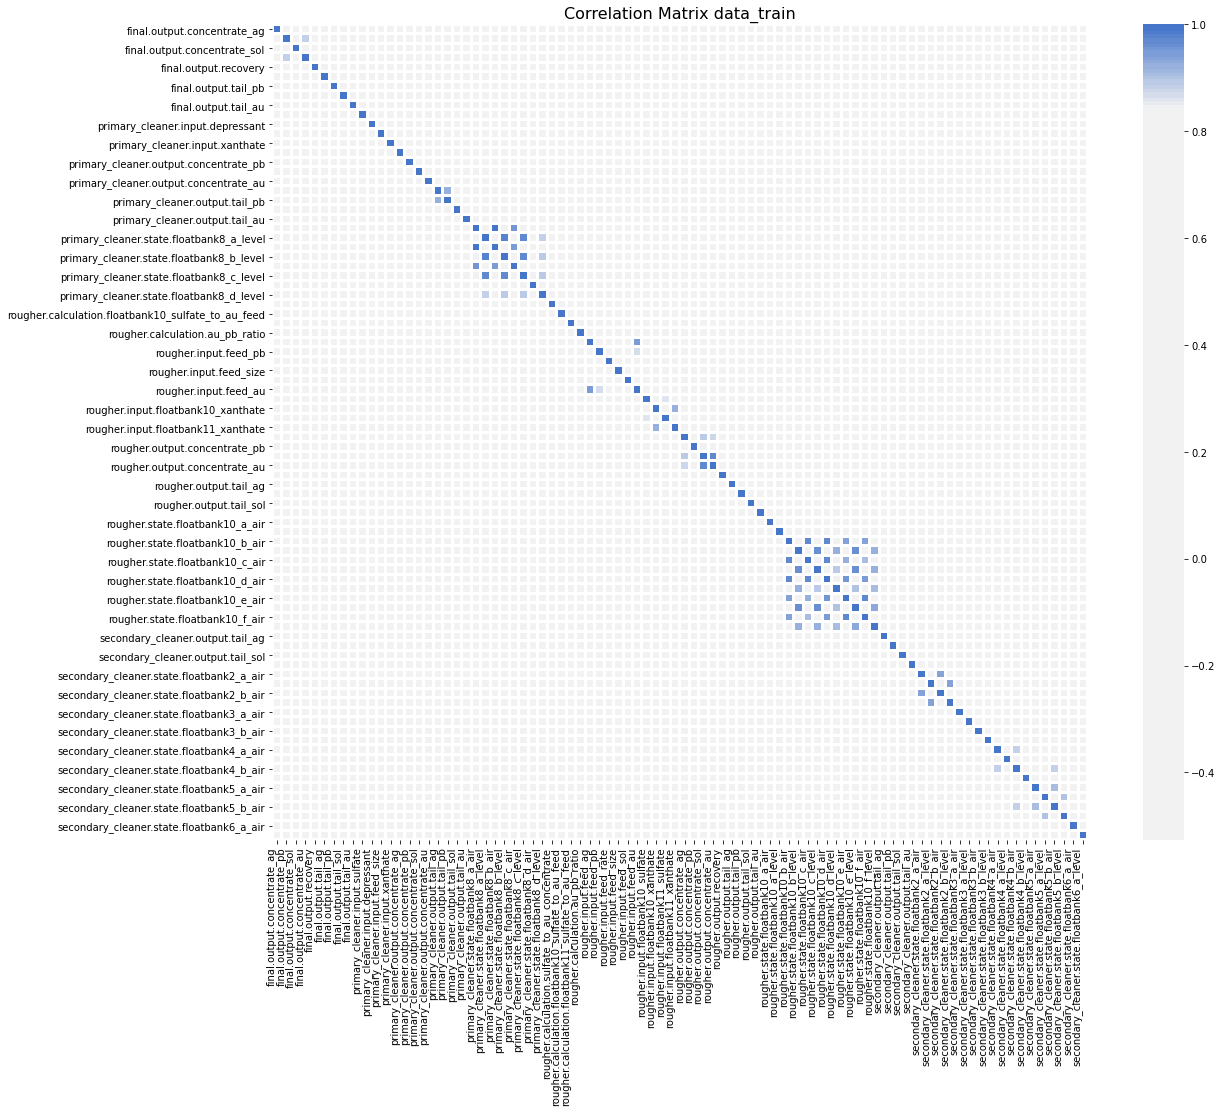

In [10]:
fig = plt.figure(figsize=(20, 15))
ax = sns.heatmap(data_train_corr, 
                 center=0, 
                 linewidths=2, 
                 cmap=sns.diverging_palette(0, 255, sep=216, n=256), 
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title('Correlation Matrix data_train', fontsize=16);

#### Между несколькими признаками можно наблюдать сильную взаимосвязь. (Коэффициент корреляции > 0.8).

#### Тестовый датсет

In [11]:
data_test = pd.read_csv('gold_recovery_test.csv', index_col='date')
data_test.head(10)

primary_cleaner.input.sulfate  \
date                                                 
2016-09-01 00:59:59                     210.800909   
2016-09-01 01:59:59                     215.392455   
2016-09-01 02:59:59                     215.259946   
2016-09-01 03:59:59                     215.336236   
2016-09-01 04:59:59                     199.099327   
2016-09-01 05:59:59                     168.485085   
2016-09-01 06:59:59                     144.133440   
2016-09-01 07:59:59                     133.513396   
2016-09-01 08:59:59                     133.735356   
2016-09-01 09:59:59                     126.961069   

                     primary_cleaner.input.depressant  \
date                                                    
2016-09-01 00:59:59                         14.993118   
2016-09-01 01:59:59                         14.987471   
2016-09-01 02:59:59                         12.884934   
2016-09-01 03:59:59                         12.006805   
2016-09-01 04:59:59                         10.682530   
2016-09-01 05:59:59                          8.817007   
2016-09-01 06:59:59                          7.924610   
2016-09-01 07:59:59                          8.055252   
2016-09-01 08:59:59                          7.999618   
2016-09-01 09:59:59                          8.017856   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-09-01 00:59:59                         8.080000   
2016-09-01 01:59:59                         8.080000   
2016-09-01 02:59:59                         7.786667   
2016-09-01 03:59:59                         7.640000   
2016-09-01 04:59:59                         7.530000   
2016-09-01 05:59:59                         7.420000   
2016-09-01 06:59:59                         7.420000   
2016-09-01 07:59:59                         6.988000   
2016-09-01 08:59:59                         6.935000   
2016-09-01 09:59:59                         7.030000   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-09-01 00:59:59                        1.005021   
2016-09-01 01:59:59                        0.990469   
2016-09-01 02:59:59                        0.996043   
2016-09-01 03:59:59                        0.863514   
2016-09-01 04:59:59                        0.805575   
2016-09-01 05:59:59                        0.791191   
2016-09-01 06:59:59                        0.788838   
2016-09-01 07:59:59                        0.801871   
2016-09-01 08:59:59                        0.789329   
2016-09-01 09:59:59                        0.805298   

                     primary_cleaner.state.floatbank8_a_air  \
date                                                          
2016-09-01 00:59:59                             1398.981301   
2016-09-01 01:59:59                             1398.777912   
2016-09-01 02:59:59                             1398.493666   
2016-09-01 03:59:59                             1399.618111   
2016-09-01 04:59:59                             1401.268123   
2016-09-01 05:59:59                             1402.826803   
2016-09-01 06:59:59                             1398.252401   
2016-09-01 07:59:59                             1401.669677   
2016-09-01 08:59:59                             1402.358981   
2016-09-01 09:59:59                             1400.816120   

                     primary_cleaner.state.floatbank8_a_level  \
date                                                            
2016-09-01 00:59:59                               -500.225577   
2016-09-01 01:59:59                               -500.057435   
2016-09-01 02:59:59                               -500.868360   
2016-09-01 03:59:59                               -498.863574   
2016-09-01 04:59:59                               -500.808305   
2016-09-01 05:59:59                               -499.299521   
2016-09-01 06:59:59                               -499.748672   
2016-09-01 

##### Процент пропусков в признаках

In [23]:
data_test.shape

(5856, 52)

In [24]:
get_info(data_test, False)

В датасете 52 колонок.
Из них 51 с пропущенными значениями.


Количество пропусков  % пропусков
rougher.input.floatbank11_xanthate                           353     6.028005
primary_cleaner.input.sulfate                                302     5.157104
primary_cleaner.input.depressant                             284     4.849727
rougher.input.floatbank10_sulfate                            257     4.388661
primary_cleaner.input.xanthate                               166     2.834699
rougher.input.floatbank10_xanthate                           123     2.100410
rougher.input.feed_sol                                        67     1.144126
rougher.input.floatbank11_sulfate                             55     0.939208
rougher.input.feed_rate                                       40     0.683060
secondary_cleaner.state.floatbank3_a_air                      34     0.580601
secondary_cleaner.state.floatbank2_b_air                      23     0.392760
rougher.input.feed_size                                       22     0.375683
secondary_cleaner.state.floatbank2_a_air                      20     0.341530
rougher.state.floatbank10_f_air                               17     0.290301
rougher.state.floatbank10_e_air                               17     0.290301
rougher.state.floatbank10_d_air                               17     0.290301
rougher.state.floatbank10_b_air                               17     0.290301
rougher.state.floatbank10_a_air                               17     0.290301
rougher.state.floatbank10_c_air                               17     0.290301
rougher.input.feed_au                                         16     0.273224
rougher.input.feed_pb                                         16     0.273224
secondary_cleaner.state.floatbank6_a_air                      16     0.273224
secondary_cleaner.state.floatbank5_b_level                    16     0.273224
secondary_cleaner.state.floatbank5_b_air                      16     0.273224
secondary_cleaner.state.floatbank5_a_level                    16     0.273224
secondary_cleaner.state.floatbank5_a_air                      16     0.273224
secondary_cleaner.state.floatbank4_b_level                    16     0.273224
secondary_cleaner.state.floatbank4_b_air                      16     0.273224
secondary_cleaner.state.floatbank4_a_level                    16     0.273224
secondary_cleaner.state.floatbank4_a_air                      16     0.273224
secondary_cleaner.state.floatbank3_b_level                    16     0.273224
secondary_cleaner.state.floatbank3_b_air                      16     0.273224
secondary_cleaner.state.floatbank3_a_level                    16     0.273224
secondary_cleaner.state.floatbank2_b_level                    16     0.273224
primary_cleaner.state.floatbank8_a_air                        16     0.273224
secondary_cleaner.state.floatbank2_a_level                    16     0.273224
primary_cleaner.state.floatbank8_a_level                      16     0.273224
rougher.state.floatbank10_f_level                             16     0.273224
primary_cleaner.state.floatbank8_b_air                        16     0.273224
rougher.state.floatbank10_e_level                             16     0.273224
primary_cleaner.state.floatbank8_b_level                      16     0.273224
rougher.state.floatbank10_d_level                             16     0.273224
primary_cleaner.state.floatbank8_c_air                        16     0.273224
rougher.state.floatbank10_c_level                             16     0.273224
primary_cleaner.state.floatbank8_c_level                      16     0.273224
rougher.state.floatbank10_b_level                             16     0.273224
primary_cleaner.state.floatbank8_d_air                        16     0.273224
rougher.state.floatbank10_a_level                             16     0.273224
primary_cleaner.state.floatbank8_d_level                      16     0.273224
rougher.input.feed_ag                                         16     0.273224
secondary_cleaner.state.floatbank6_a_level                    16  

In [25]:
data_test.duplicated().sum()

6

In [36]:
data_test = data_test.drop_duplicates()

##### Дублей нет

In [27]:
data_test.describe().T

count         mean         std  \
primary_cleaner.input.sulfate               5554.0   170.515243   49.608602   
primary_cleaner.input.depressant            5572.0     8.482873    3.353105   
primary_cleaner.input.feed_size             5856.0     7.264651    0.611526   
primary_cleaner.input.xanthate              5690.0     1.321420    0.693246   
primary_cleaner.state.floatbank8_a_air      5840.0  1481.990241  310.453166   
primary_cleaner.state.floatbank8_a_level    5840.0  -509.057796   61.339256   
primary_cleaner.state.floatbank8_b_air      5840.0  1486.908670  313.224286   
primary_cleaner.state.floatbank8_b_level    5840.0  -511.743956   67.139074   
primary_cleaner.state.floatbank8_c_air      5840.0  1468.495216  309.980748   
primary_cleaner.state.floatbank8_c_level    5840.0  -509.741212   62.671873   
primary_cleaner.state.floatbank8_d_air      5840.0  1486.398557  313.725248   
primary_cleaner.state.floatbank8_d_level    5840.0  -510.723606   65.417633   
rougher.input.feed_ag                       5840.0     8.736170    2.985805   
rougher.input.feed_pb                       5840.0     3.552722    1.326113   
rougher.input.feed_rate                     5816.0   458.485472  155.958272   
rougher.input.feed_size                     5834.0    55.937535   22.724254   
rougher.input.feed_sol                      5789.0    35.105834   10.793249   
rougher.input.feed_au                       5840.0     8.700930    2.803046   
rougher.input.floatbank10_sulfate           5599.0    13.439933    3.997715   
rougher.input.floatbank10_xanthate          5733.0     6.169553    1.673606   
rougher.input.floatbank11_sulfate           5801.0    13.056047    4.533948   
rougher.input.floatbank11_xanthate          5503.0     6.423566    1.120371   
rougher.state.floatbank10_a_air             5839.0  1016.294703  226.494775   
rougher.state.floatbank10_a_level           5840.0  -404.977728  100.953782   
rougher.state.floatbank10_b_air             5839.0  1270.598553  285.247715   
rougher.state.floatbank10_b_level           5840.0  -482.154567   55.399631   
rougher.state.floatbank10_c_air             5839.0  1253.495045  290.703157   
rougher.state.floatbank10_c_level           5840.0  -480.945868   53.759053   
rougher.state.floatbank10_d_air             5839.0  1169.675564  285.407244   
rougher.state.floatbank10_d_level           5840.0  -482.152253   54.967985   
rougher.state.floatbank10_e_air             5839.0  1018.386311  231.675756   
rougher.state.floatbank10_e_level           5840.0  -476.551547   67.002595   
rougher.state.floatbank10_f_air             5839.0   962.005375  220.862435   
rougher.state.floatbank10_f_level           5840.0  -477.795380   68.342305   
secondary_cleaner.state.floatbank2_a_air    5836.0    25.479808    5.450424   
secondary_cleaner.state.floatbank2_a_level  5840.0  -513.714941   62.448366   
secondary_cleaner.state.floatbank2_b_air    5833.0    21.083475    5.940017   
secondary_cleaner.state.floatbank2_b_level  5840.0  -512.325717   63.376776   
secondary_cleaner.state.floatbank3_a_air    5822.0    24.345831    7.950733   
secondary_cleaner.state.floatbank3_a_level  5840.0  -519.417733   73.968109   
secondary_cleaner.state.floatbank3_b_air    5840.0    20.068079    7.644391   
secondary_cleaner.state.floatbank3_b_level  5840.0  -515.028316   60.457838   
secondary_cleaner.state.floatbank4_a_air    5840.0    15.636031    4.660835   
secondary_cleaner.state.floatbank4_a_level  5840.0  -516.266074   62.756748   
secondary_cleaner.state.floatbank4_b_air    5840.0    13.145702    4.304086   
secondary_cleaner.state.floatbank4_b_level  5840.0  -476.338907  105.549424   
secondary_cleaner.state.floatbank5_a_air    5840.0    12.308967    3.762827   
secondary_cleaner.state.floatbank5_a_level  5840.0  -512.208126   58.864651   
secondary_cleaner.state.floatbank5_b_air    5840.0     9.470986    3.312471   
secondary_cleaner.state.floatbank5_b_level  5840.0  -505.017827   68.785898   
secondary_cleane

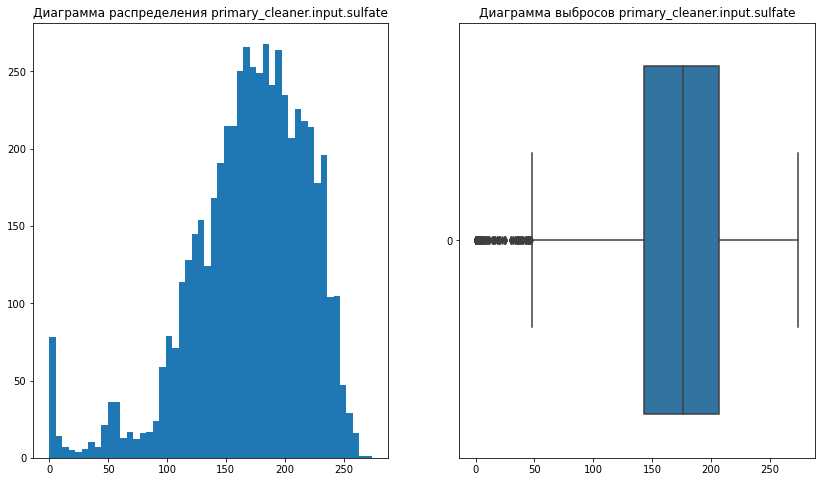

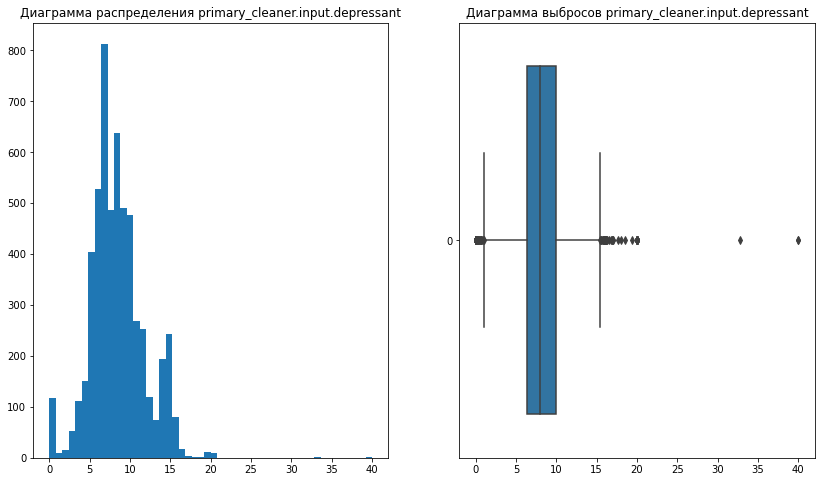

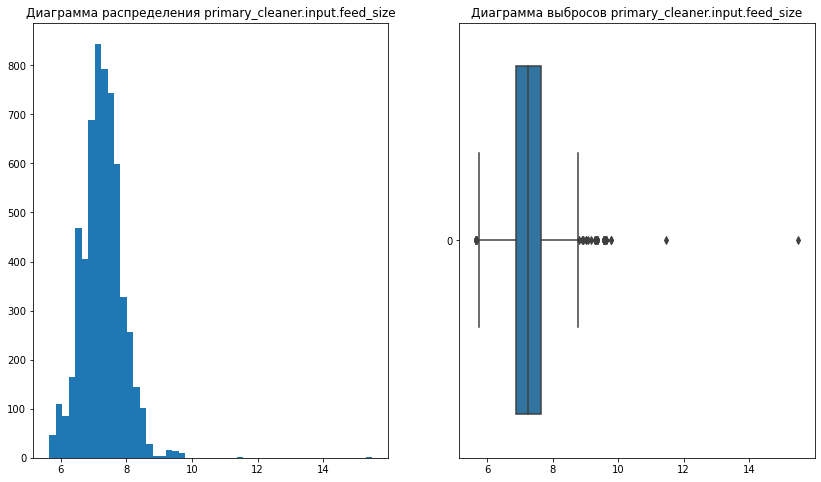

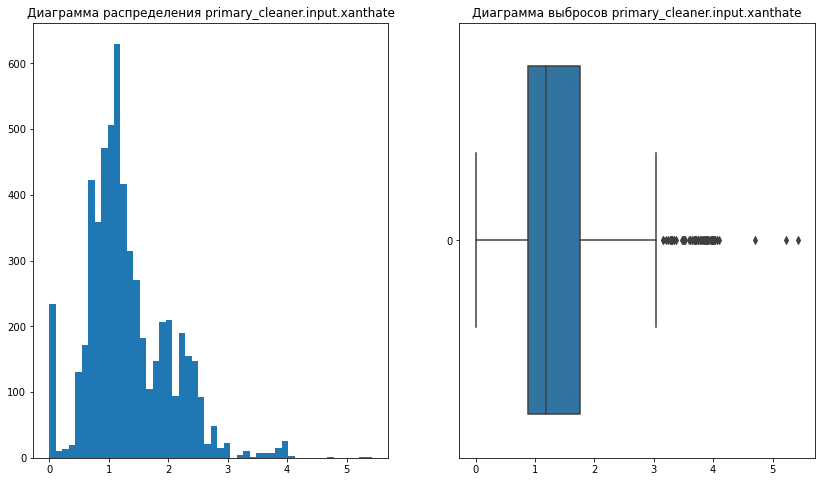

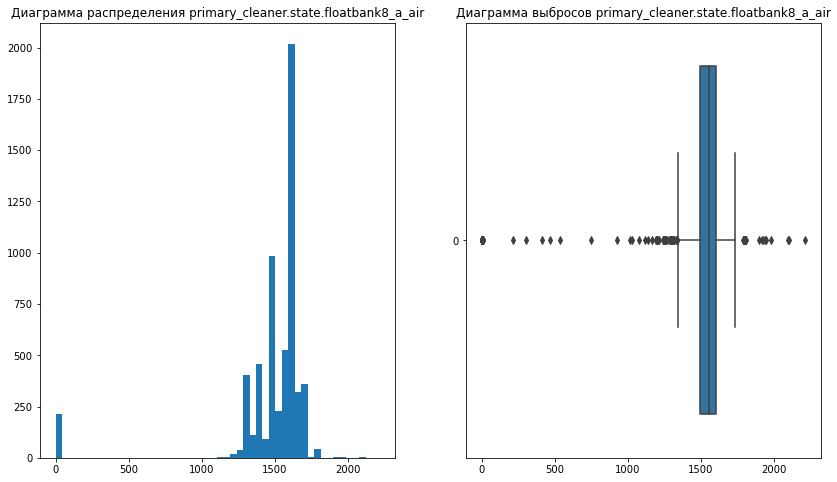

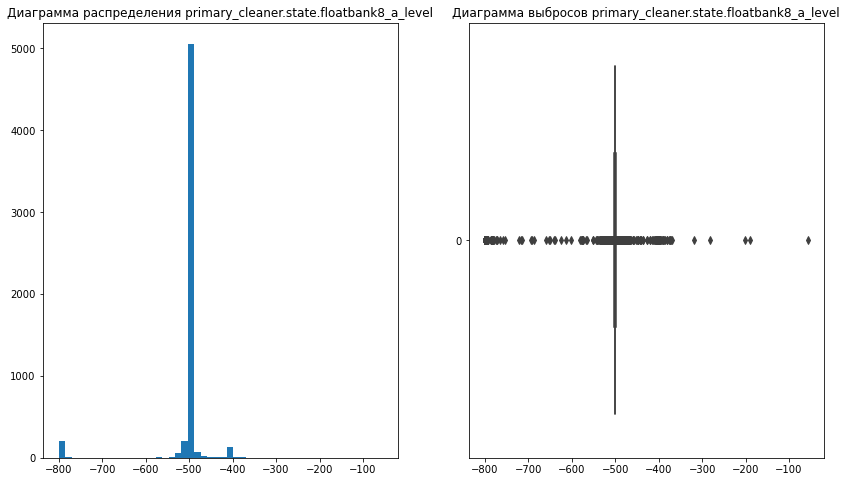

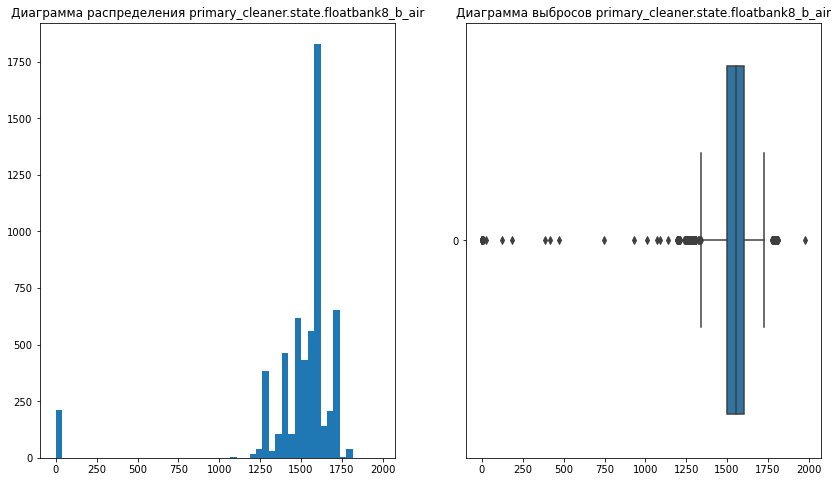

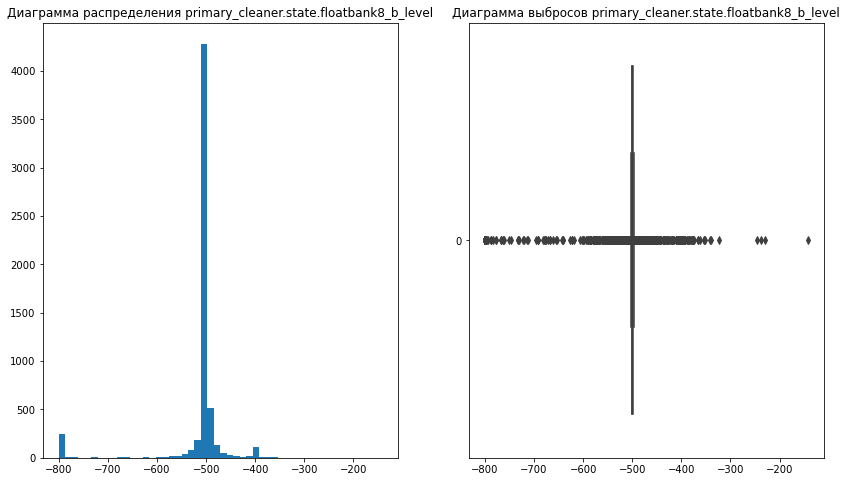

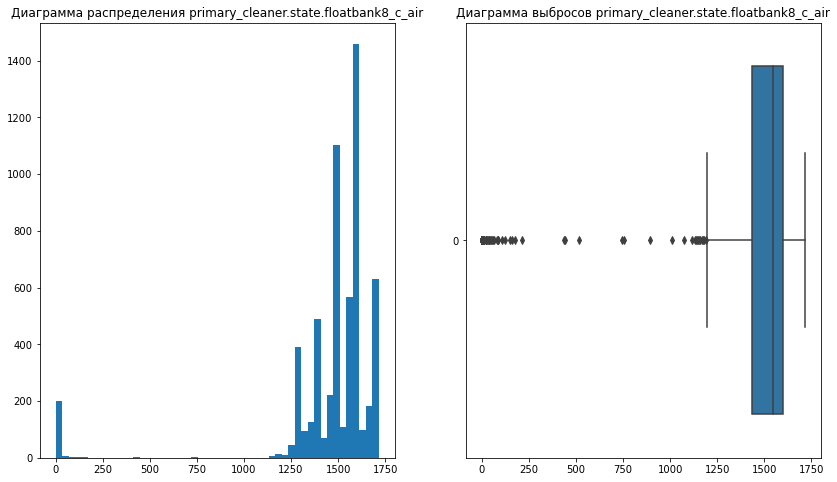

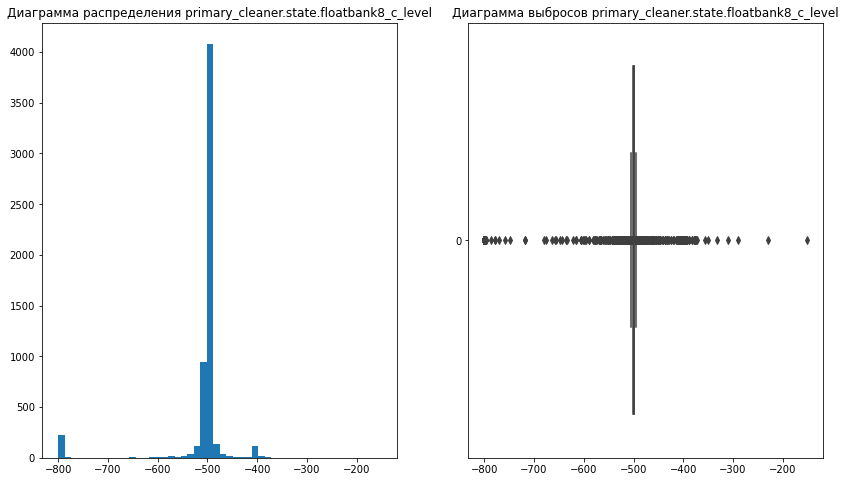

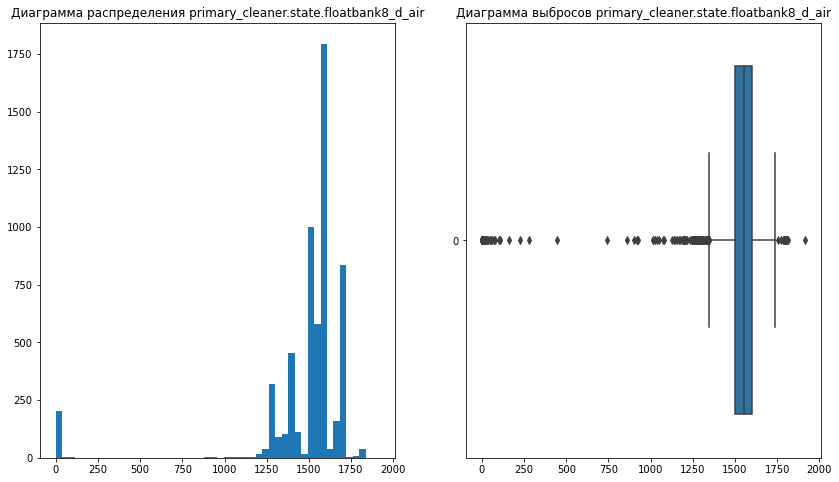

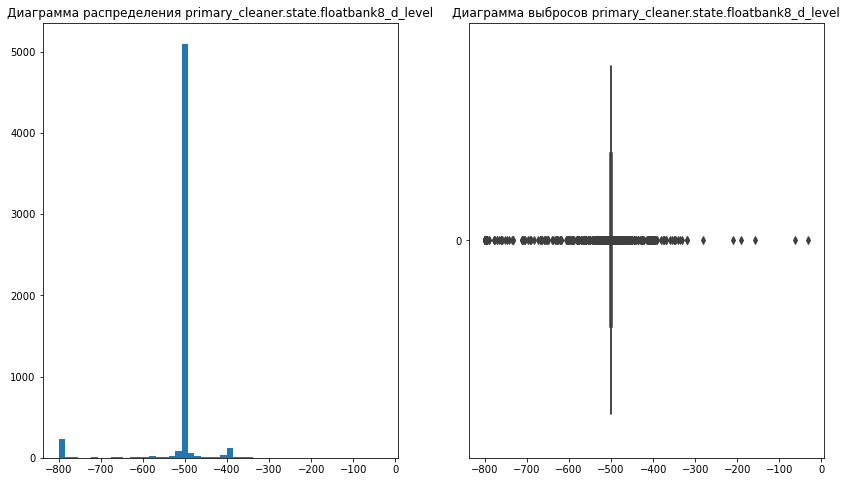

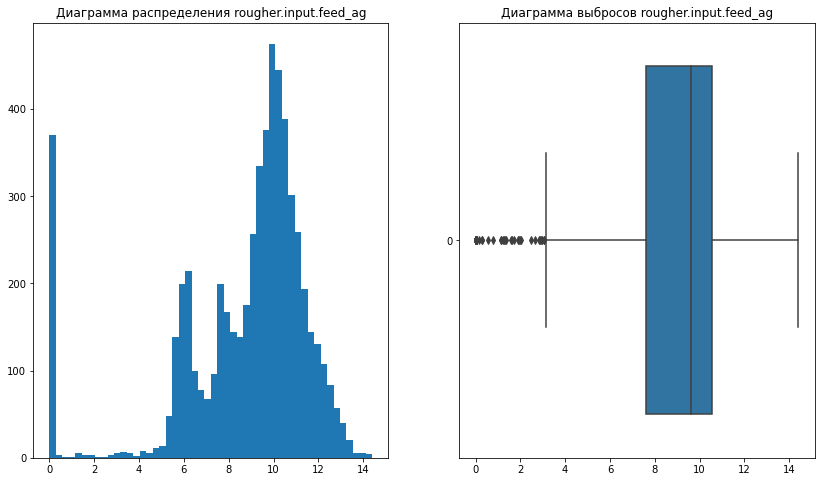

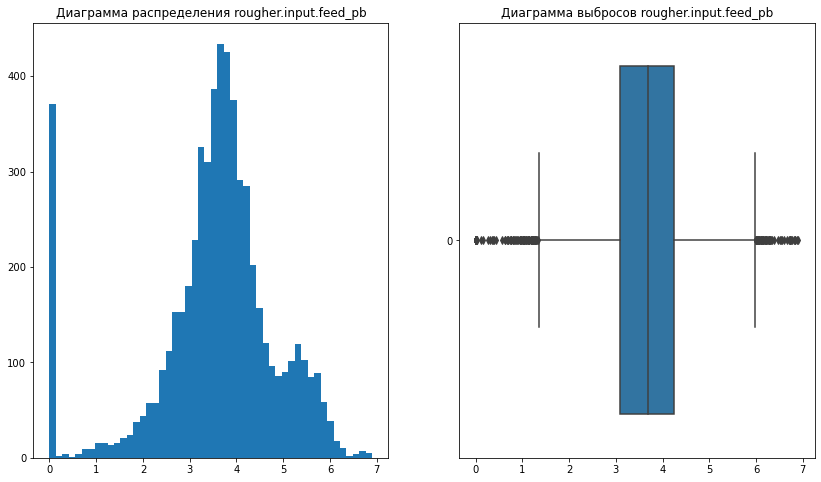

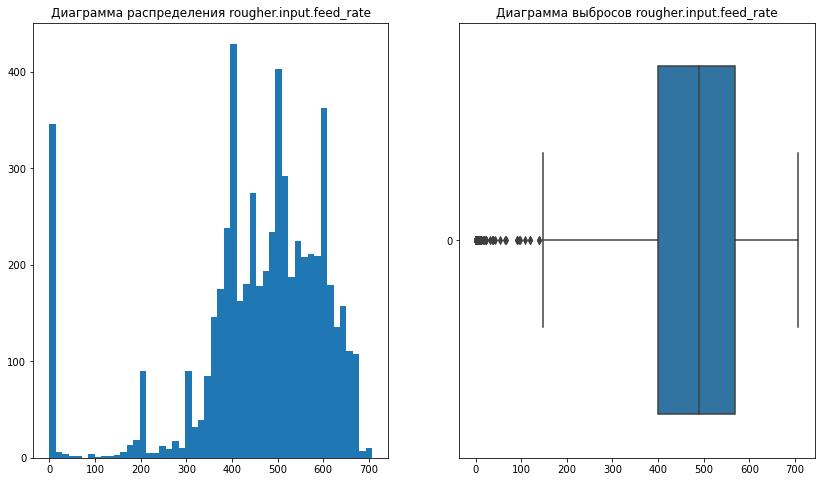

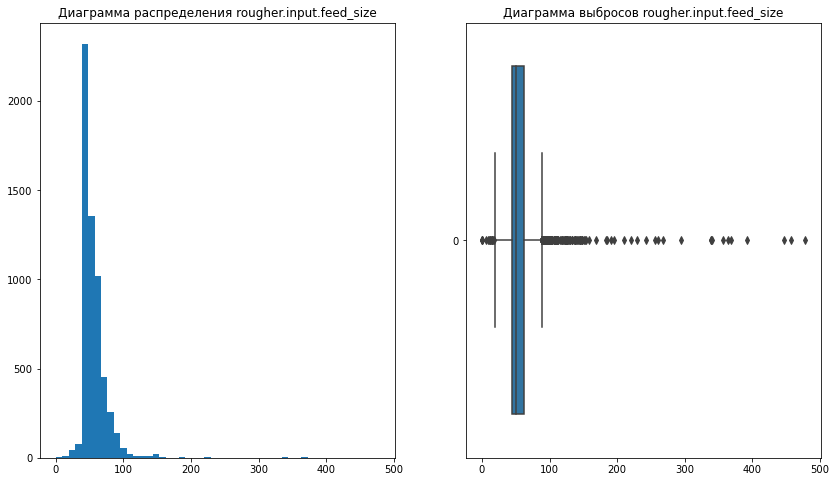

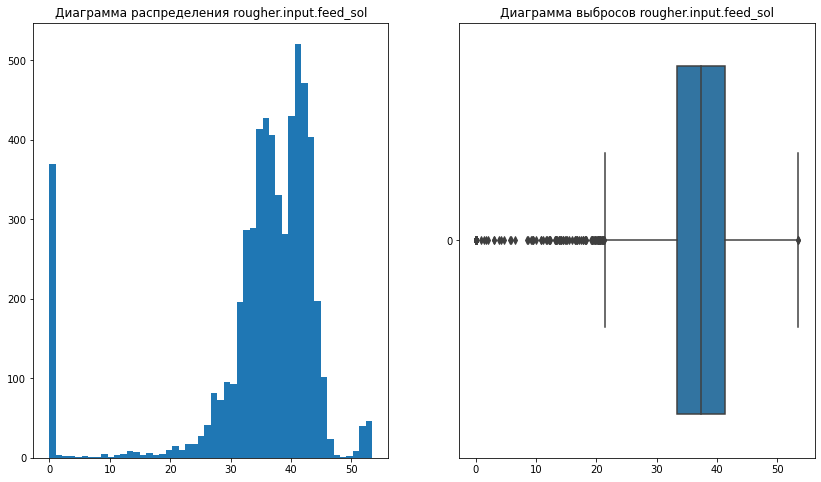

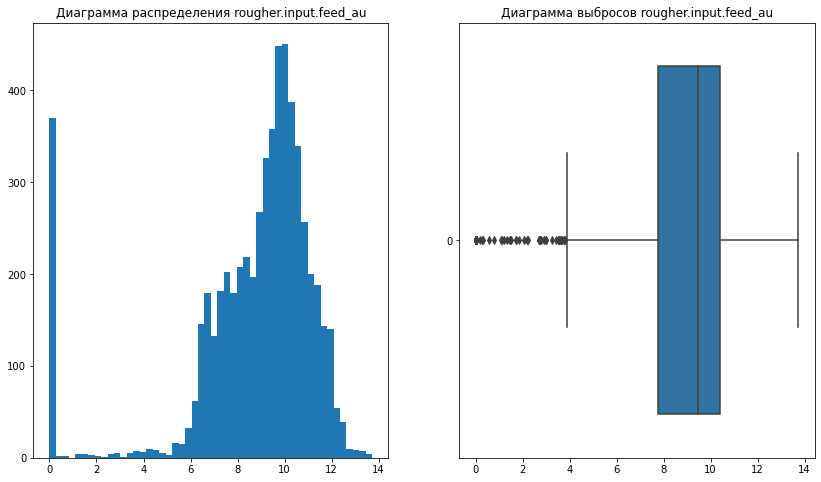

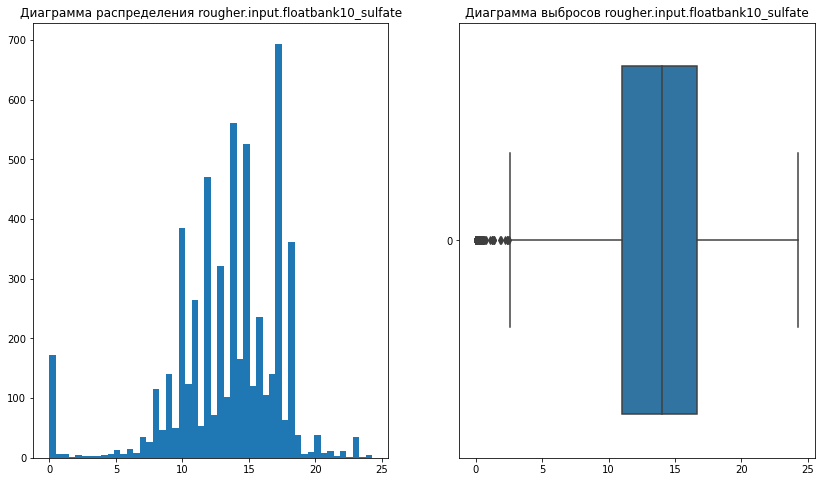

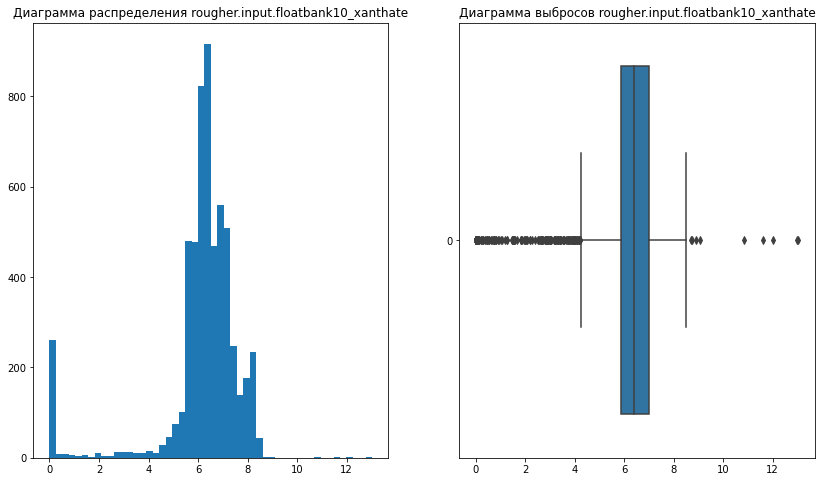

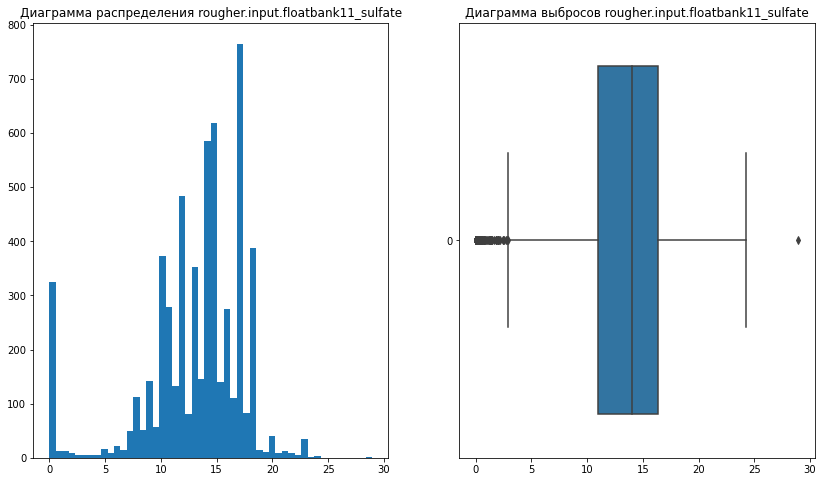

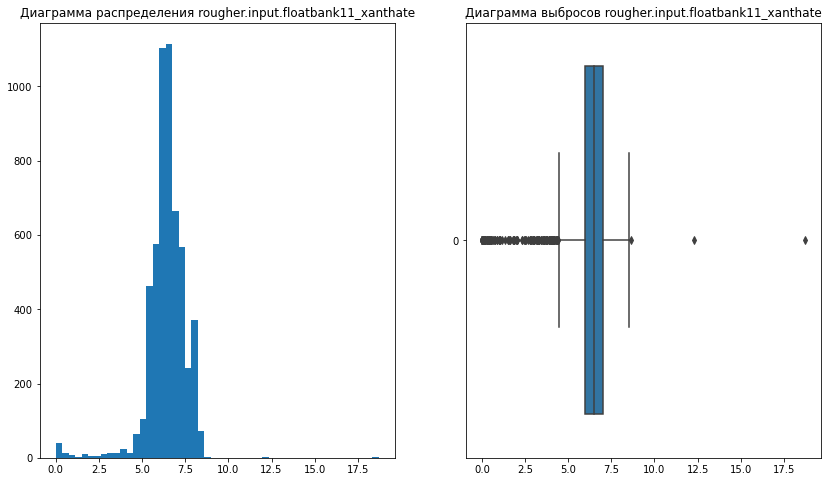

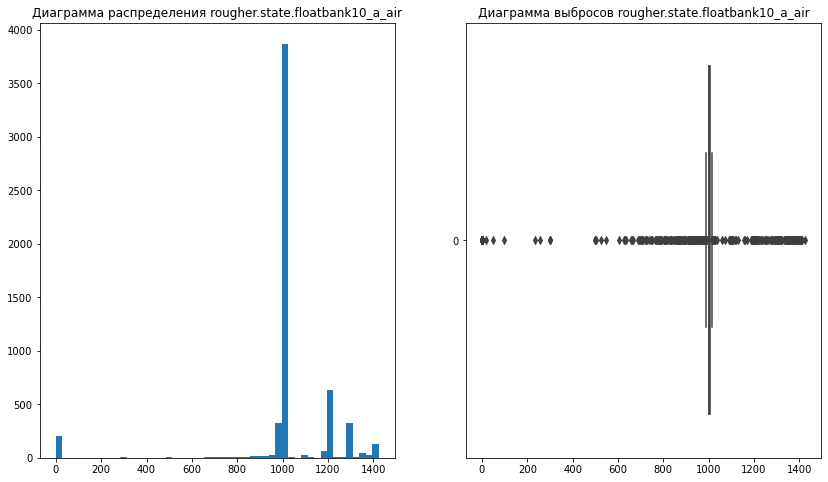

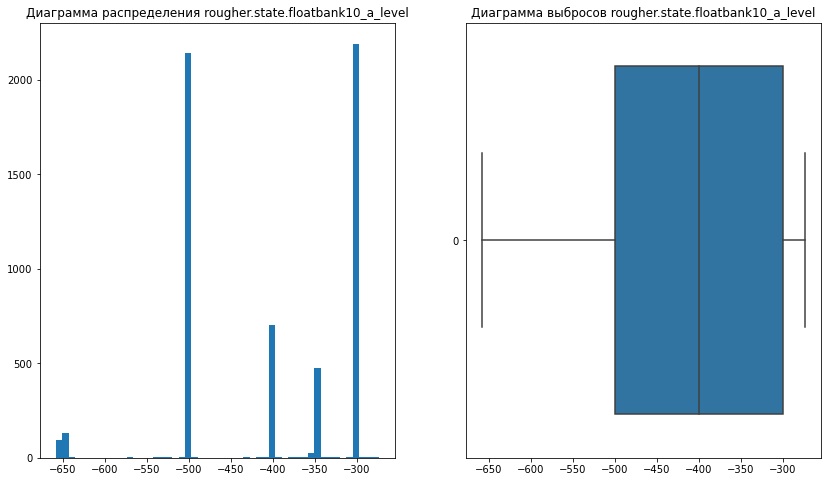

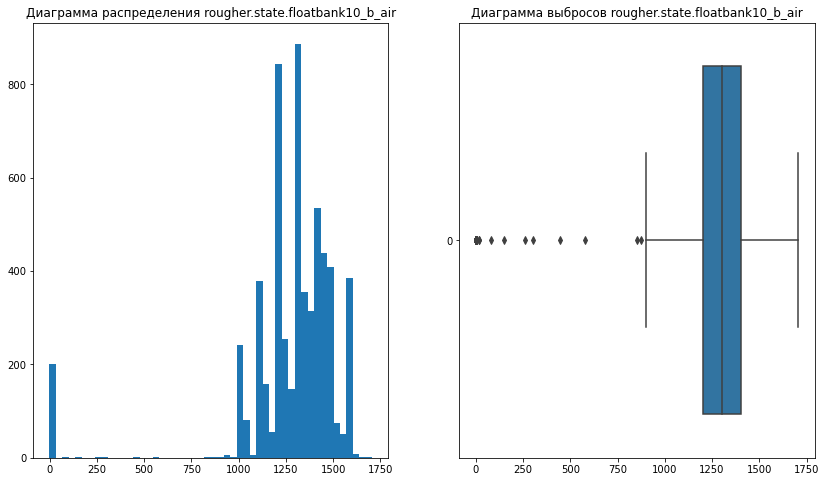

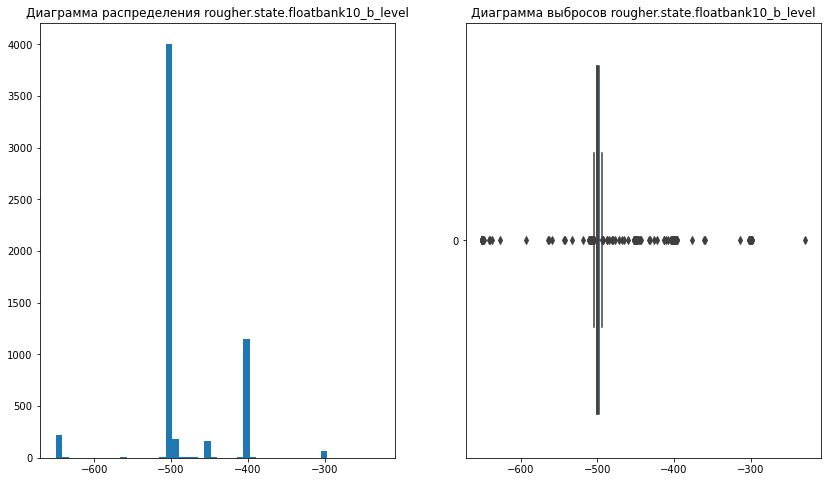

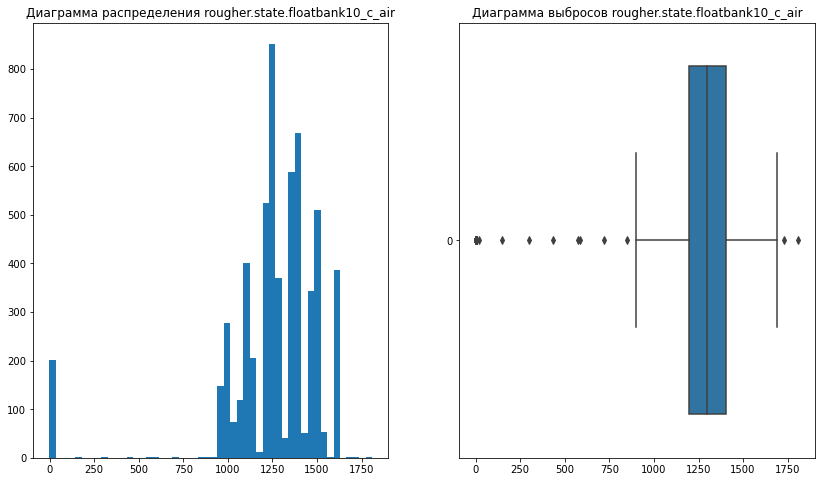

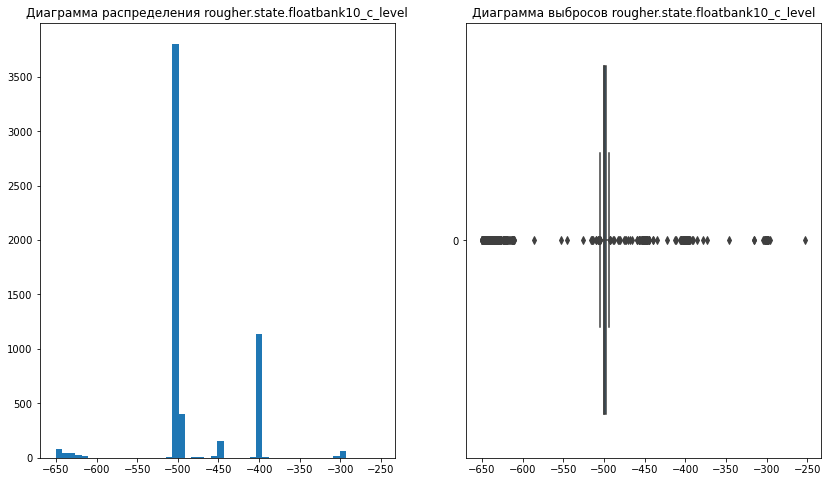

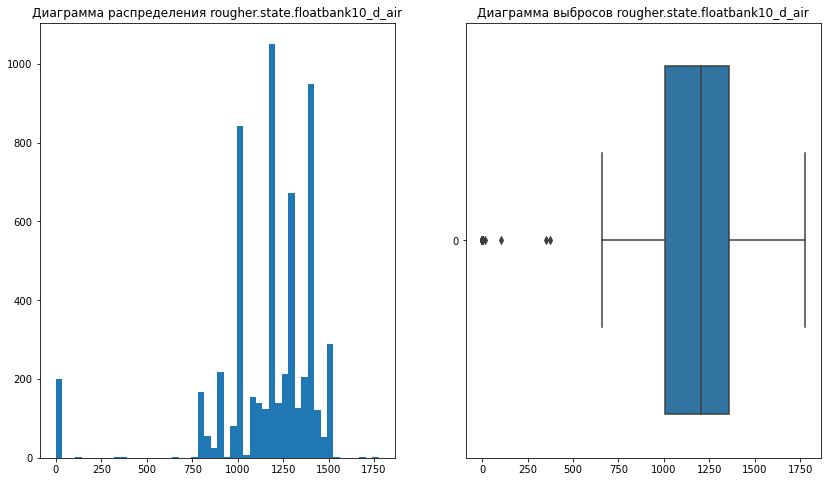

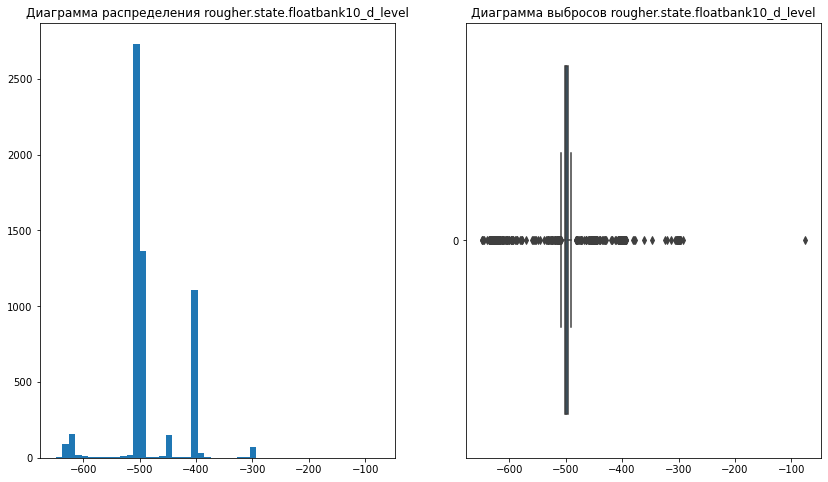

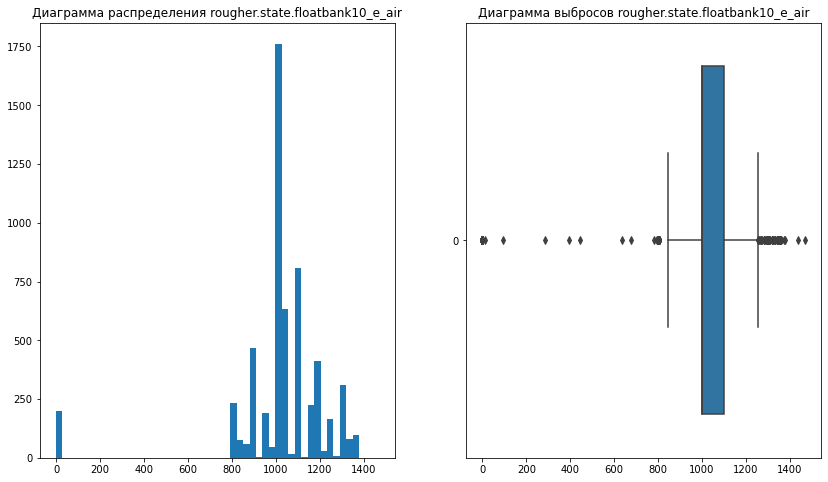

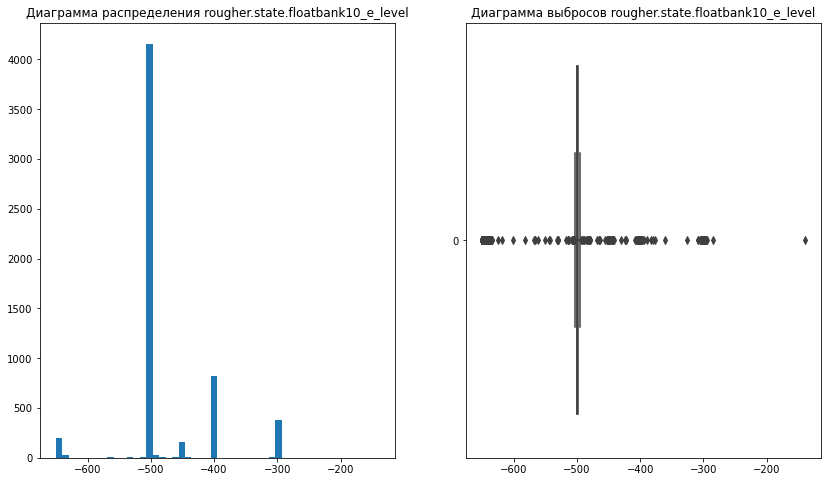

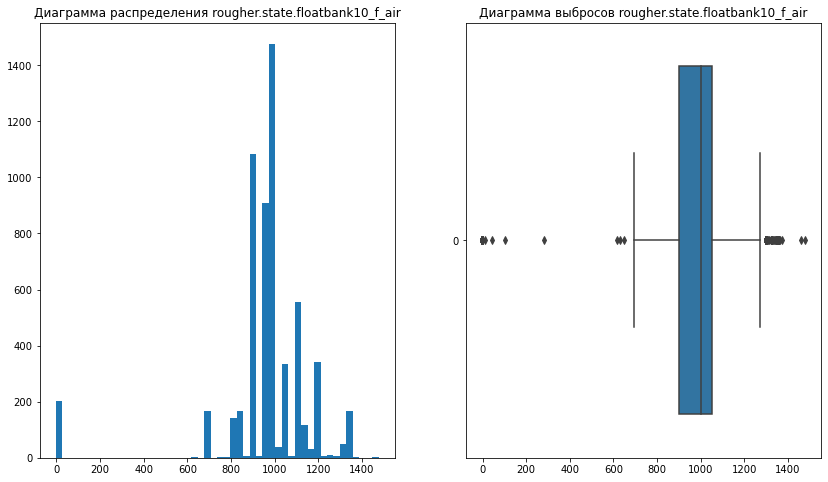

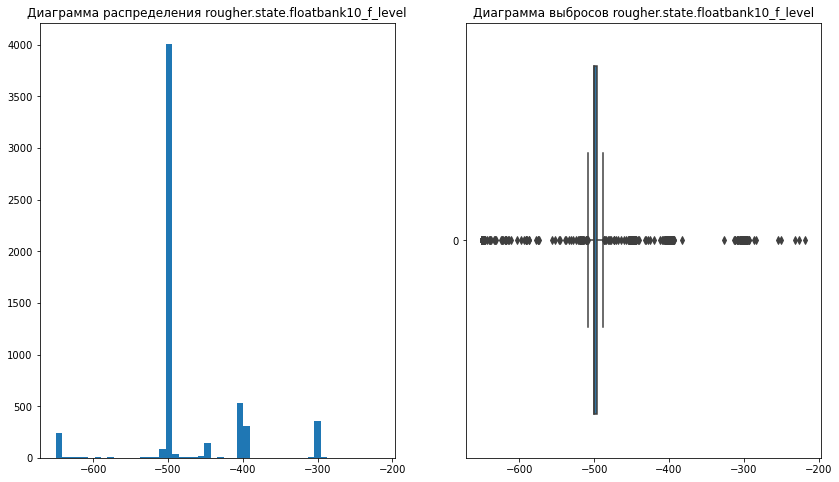

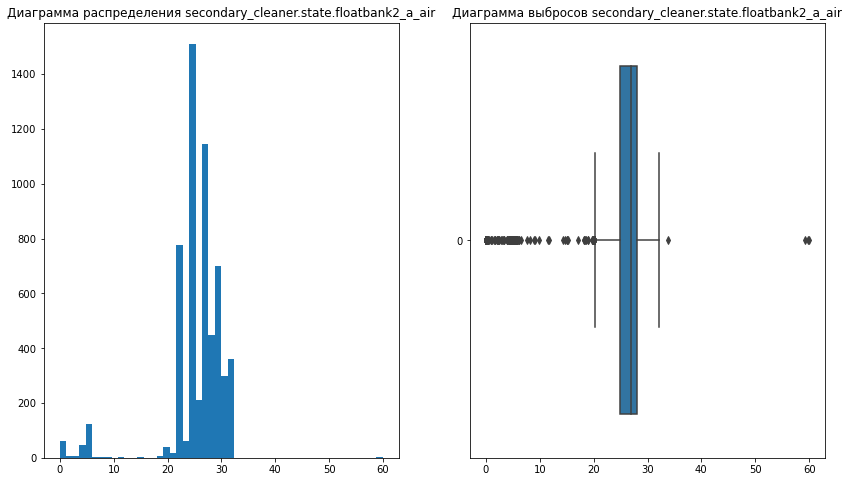

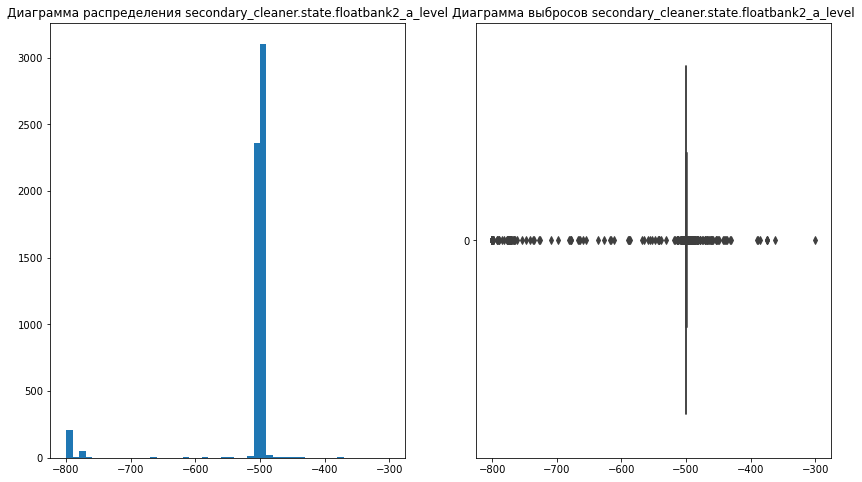

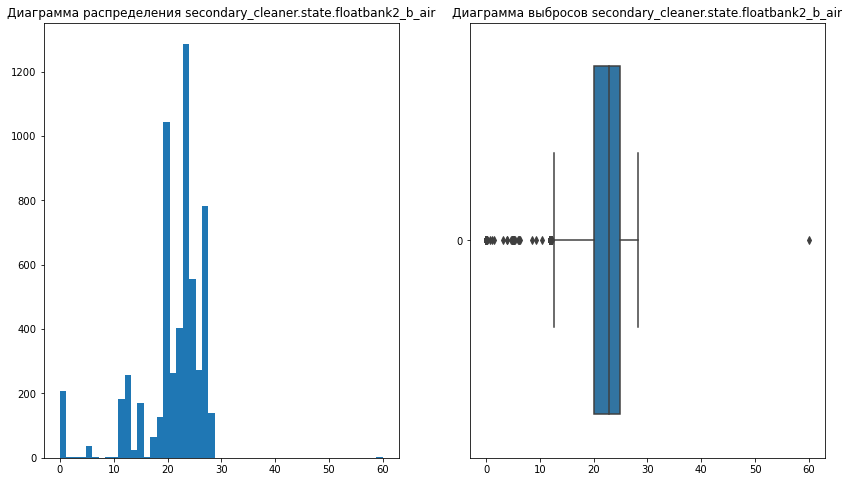

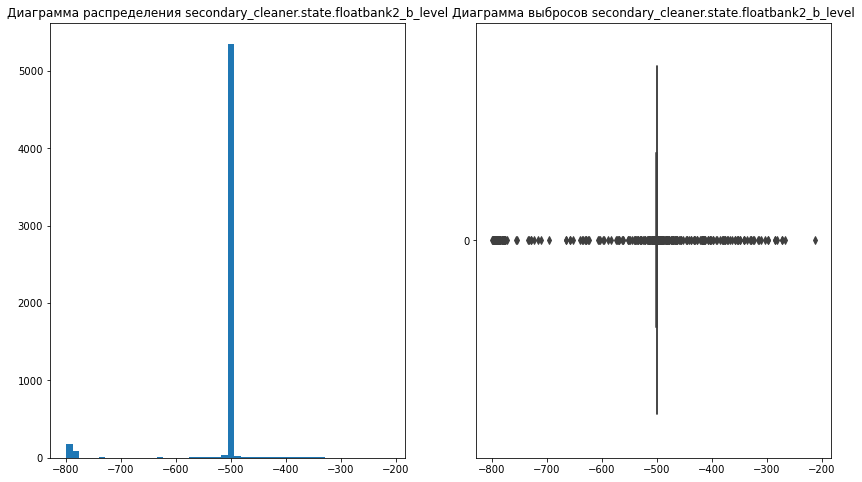

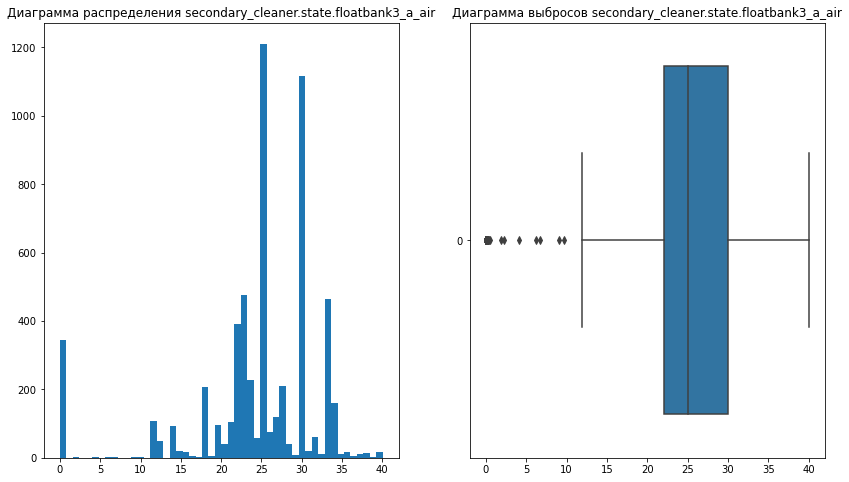

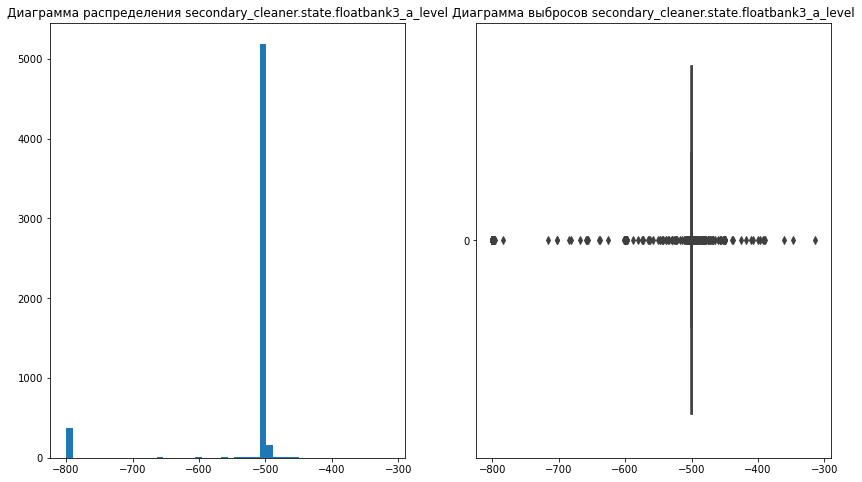

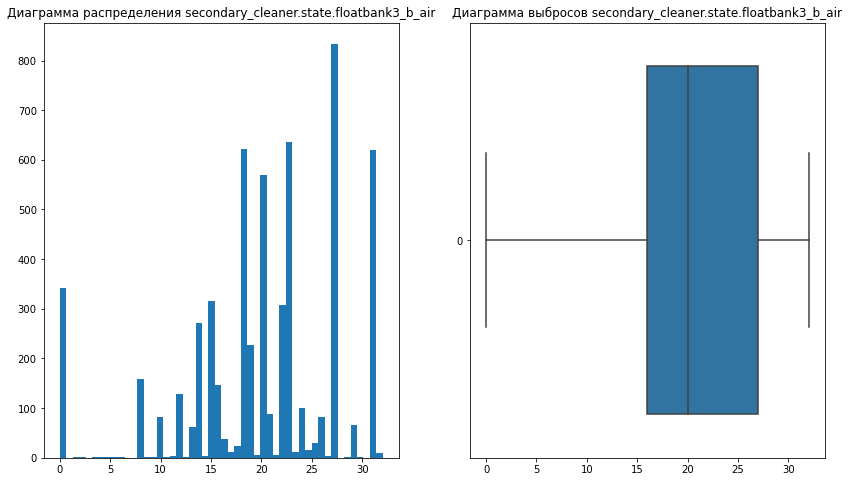

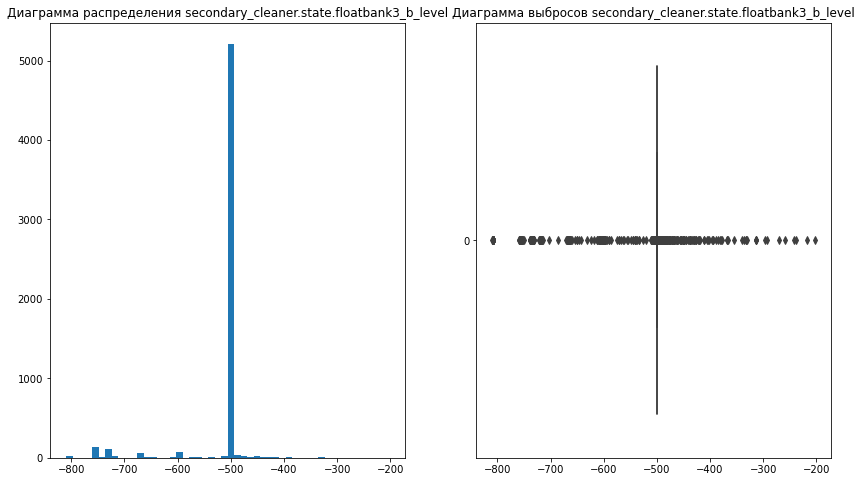

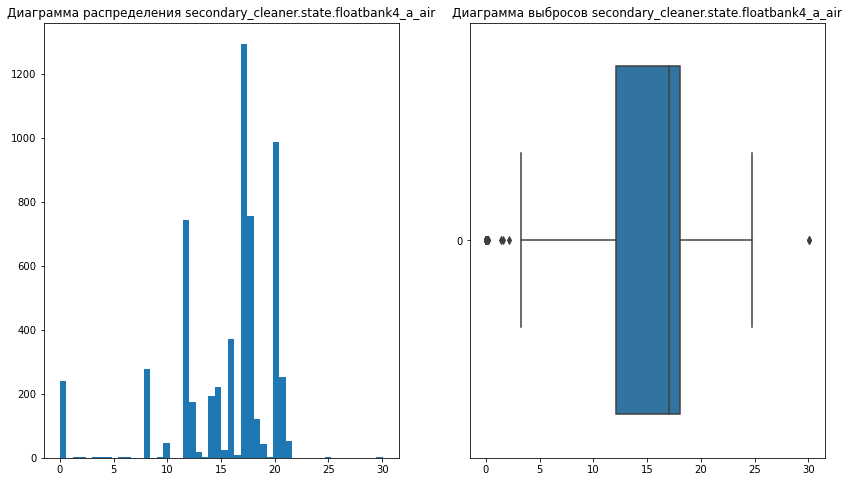

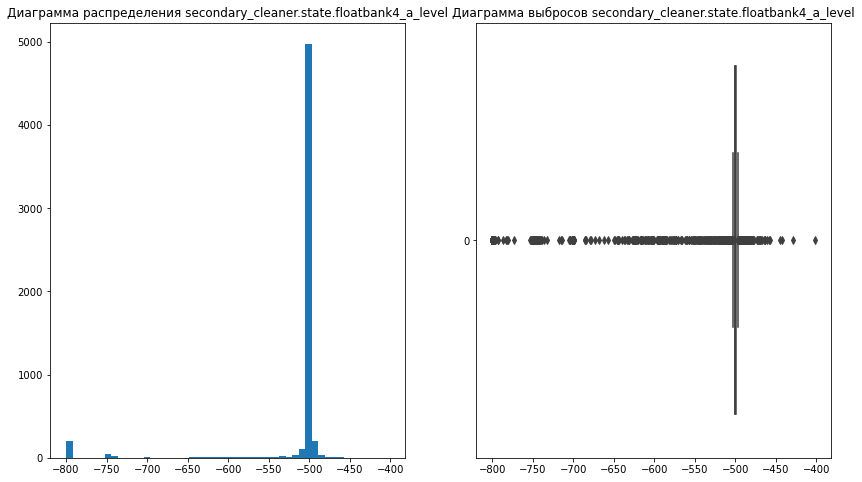

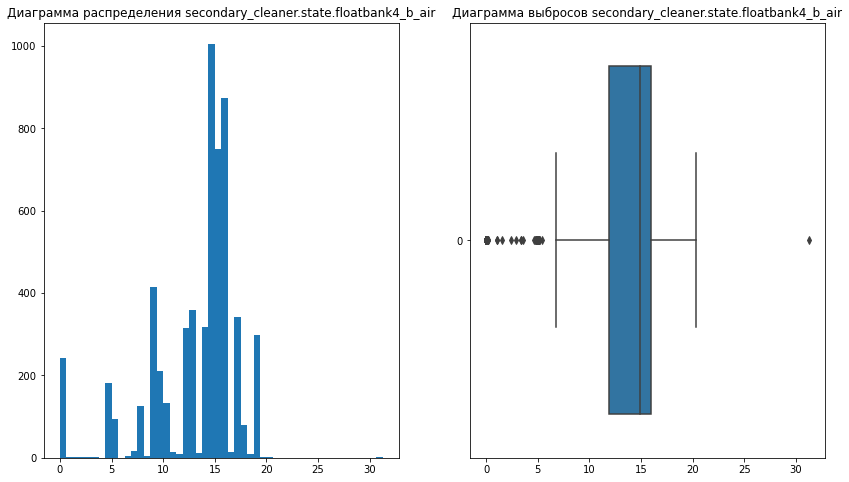

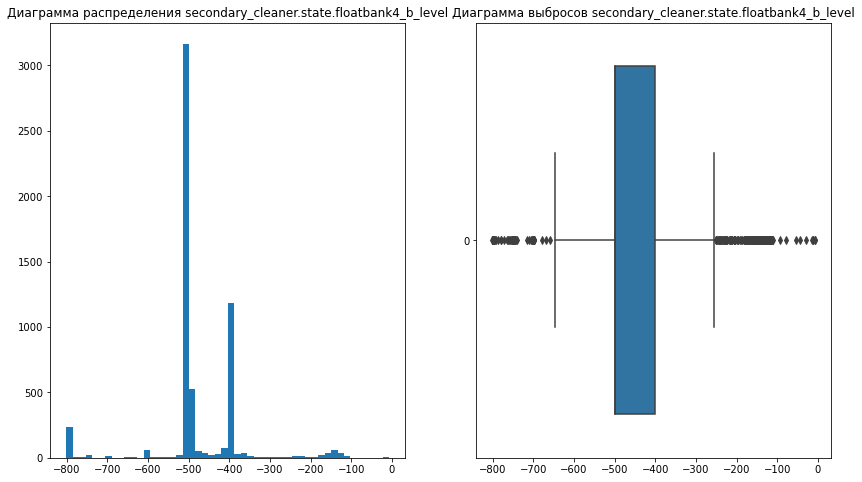

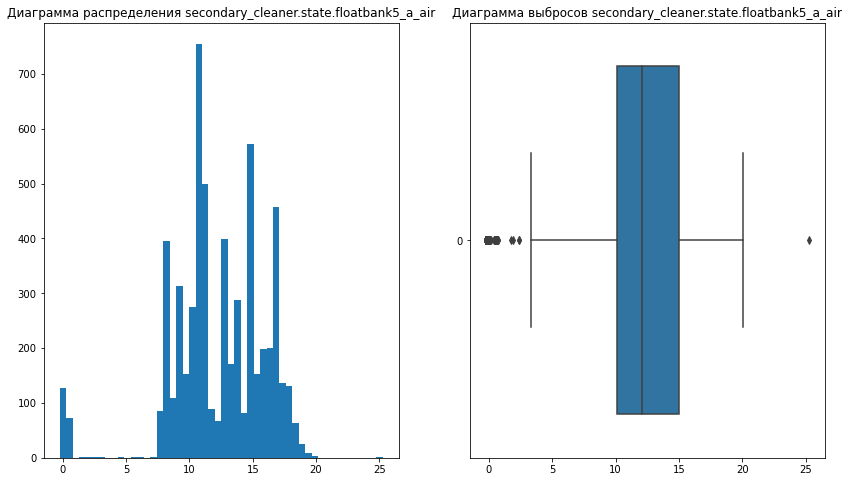

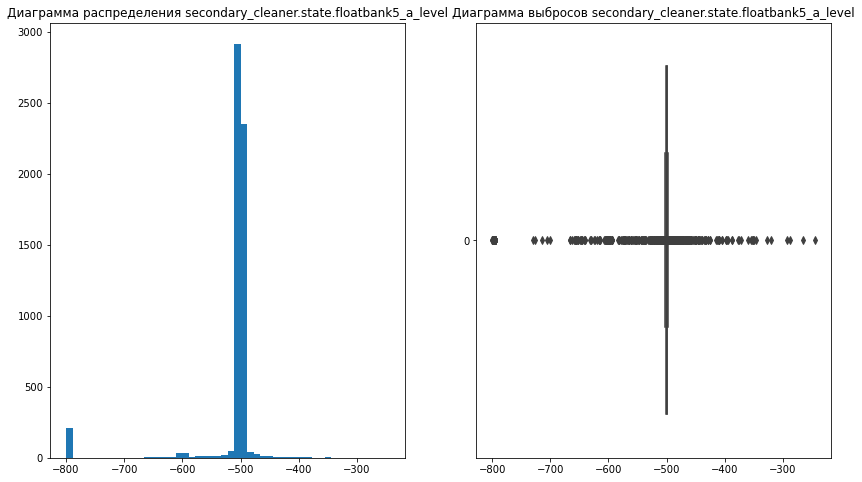

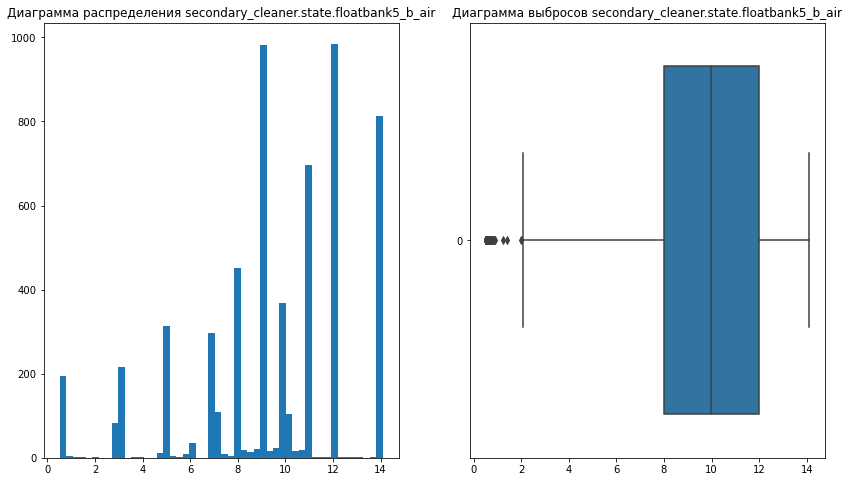

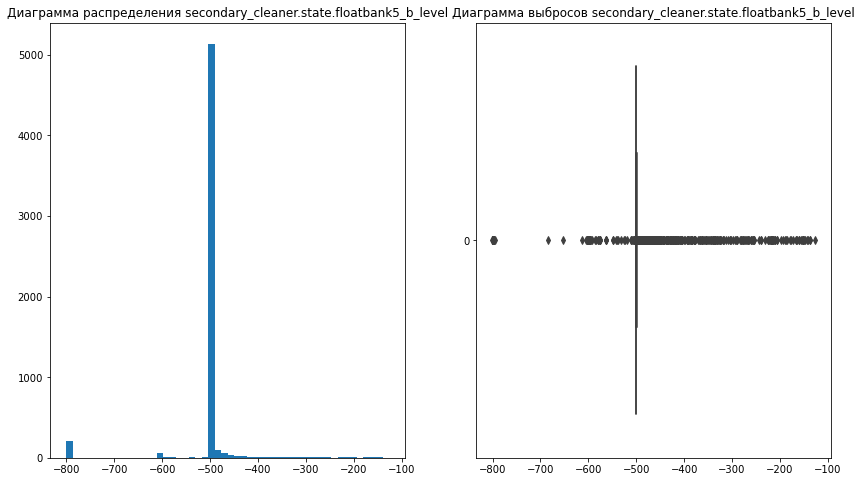

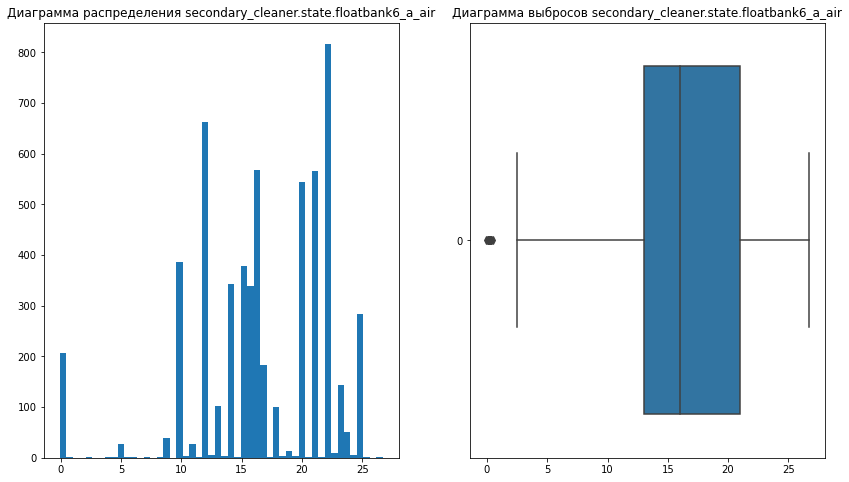

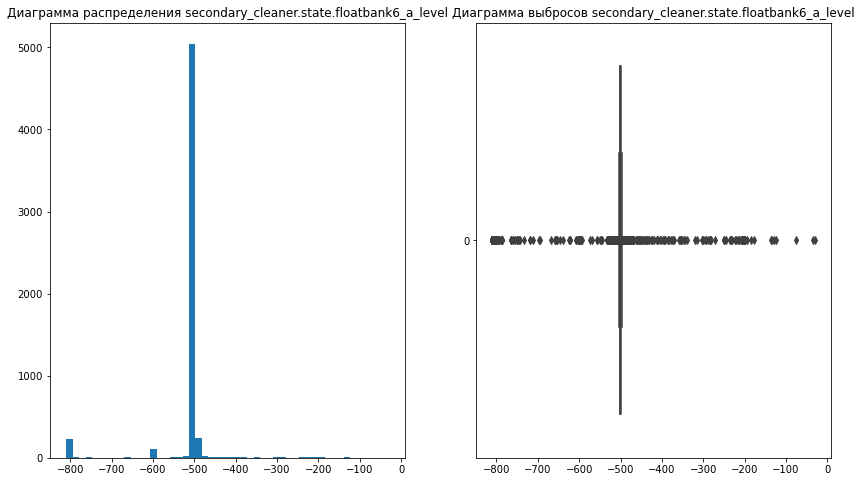

In [28]:
for column in data_test:
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, 
                                   ncols=2,
                                   figsize=(14, 8))
    ax1.hist(data_test[column], bins=50)
    ax1.set_title(f'Диаграмма распределения {column}')
    ax2 = sns.boxplot(data=data_test[column], 
                      orient='h')
    ax2.set_title(f'Диаграмма выбросов {column}')
    plt.show()

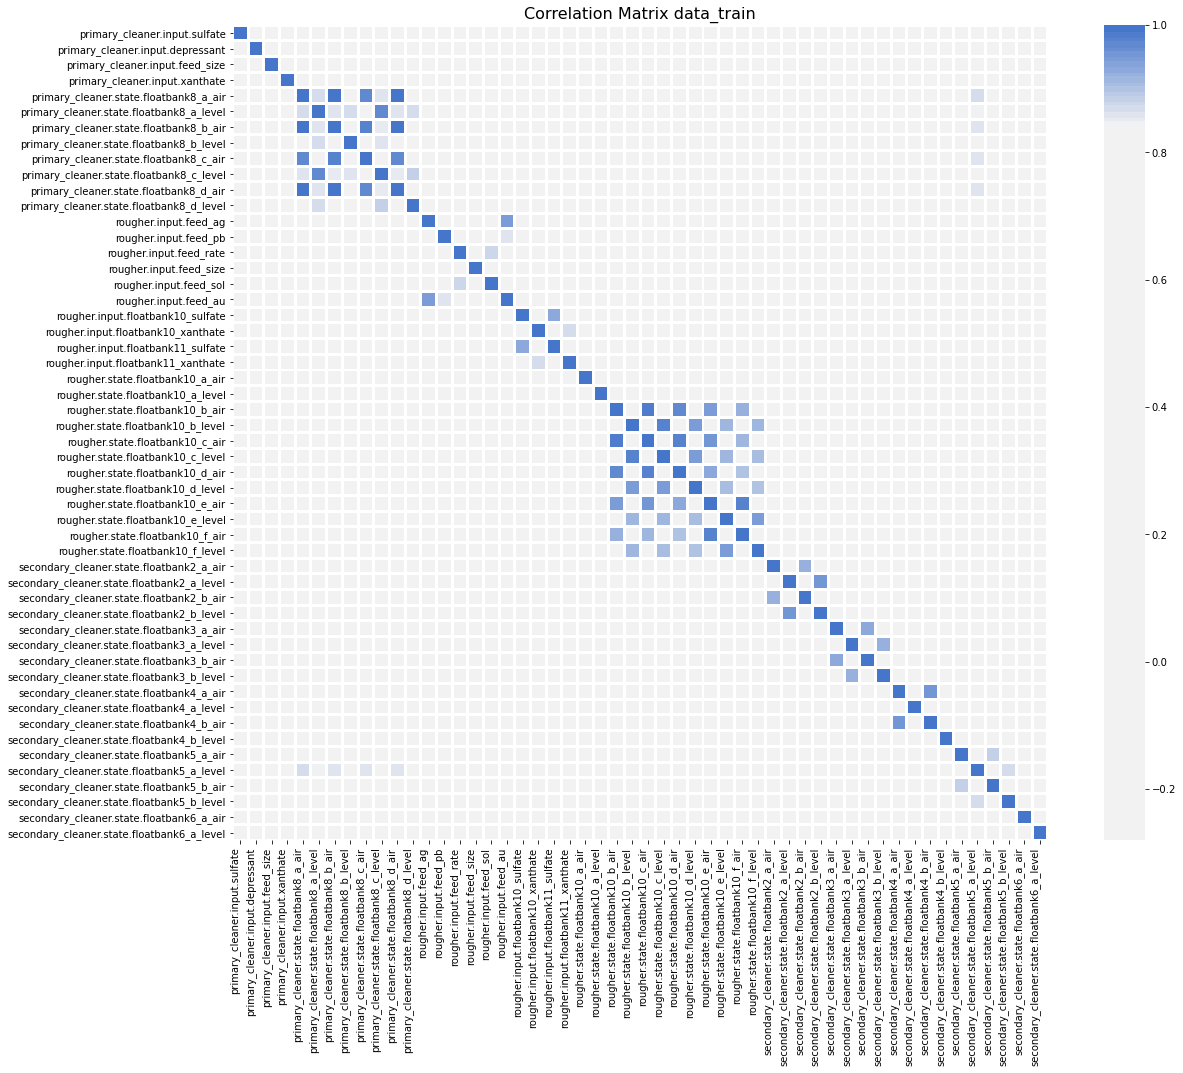

In [29]:
fig = plt.figure(figsize=(20, 15))
ax = sns.heatmap(data_test.corr(), 
                 center=0, 
                 linewidths=2, 
                 cmap=sns.diverging_palette(0, 255, sep=216, n=256), 
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title('Correlation Matrix data_train', fontsize=16);

#### Многие признаки имеют значительные выбросы

#### Между несколькими признаками можно наблюдать сильную взаимосвязь. (Коэффициент корреляции > 0.7)

#### Исходный датасет

In [31]:
data_full = pd.read_csv('gold_recovery_full.csv', index_col='date')
data_full.head(10)

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-15 00:00:00                     6.055403                     9.889648   
2016-01-15 01:00:00                     6.029369                     9.968944   
2016-01-15 02:00:00                     6.055926                    10.213995   
2016-01-15 03:00:00                     6.047977                     9.977019   
2016-01-15 04:00:00                     6.148599                    10.142511   
2016-01-15 05:00:00                     6.482968                    10.049416   
2016-01-15 06:00:00                     6.533849                    10.058141   
2016-01-15 07:00:00                     6.130823                     9.935481   
2016-01-15 08:00:00                     5.834140                    10.071156   
2016-01-15 09:00:00                     5.687063                     9.980404   

                     final.output.concentrate_sol  \
date                                                
2016-01-15 00:00:00                      5.507324   
2016-01-15 01:00:00                      5.257781   
2016-01-15 02:00:00                      5.383759   
2016-01-15 03:00:00                      4.858634   
2016-01-15 04:00:00                      4.939416   
2016-01-15 05:00:00                      5.480257   
2016-01-15 06:00:00                      4.569100   
2016-01-15 07:00:00                      4.389813   
2016-01-15 08:00:00                      4.876389   
2016-01-15 09:00:00                      5.282514   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-15 00:00:00                    42.192020              70.541216   
2016-01-15 01:00:00                    42.701629              69.266198   
2016-01-15 02:00:00                    42.657501              68.116445   
2016-01-15 03:00:00                    42.689819              68.347543   
2016-01-15 04:00:00                    42.774141              66.927016   
2016-01-15 05:00:00                    41.633678              69.465816   
2016-01-15 06:00:00                    41.995316              69.300835   
2016-01-15 07:00:00                    42.452727              70.230976   
2016-01-15 08:00:00                    43.404078              69.688595   
2016-01-15 09:00:00                    43.235220              70.279619   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-15 00:00:00             10.411962              0.895447   
2016-01-15 01:00:00             10.462676              0.927452   
2016-01-15 02:00:00             10.507046              0.953716   
2016-01-15 03:00:00             10.422762              0.883763   
2016-01-15 04:00:00             10.360302              0.792826   
2016-01-15 05:00:00             10.182708              0.664118   
2016-01-15 06:00:00             10.304598              0.807342   
2016-01-15 07:00:00             10.443288              0.949346   
2016-01-15 08:00:00             10.420140              1.065453   
2016-01-15 09:00:00             10.487013              1.159805   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-15 00:00:00              16.904297              2.143149   
2016-01-15 01:00:00              16.634514              2.224930   
2016-01-15 02:00:00              16.208849              2.257889   
2016-01-15 03:00:00              16.532835              2.146849   
2016-01-15 04:00:00              16.525686              2.055292   
2016-01-15 05:00:00              16.999638              1.918586   
2016-01-15 06:00:00              16.723575              2.058913   
2016-01-15 07:00:00              16.689959              2.143437   
2016-01-15 08:00:00      

In [32]:
get_info(data_full, True)

В датасете 86 колонок.
Из них 85 с пропущенными значениями.
<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  fl

Количество пропусков  \
rougher.output.recovery                                             3119   
rougher.output.tail_ag                                              2737   
rougher.output.tail_sol                                             2736   
rougher.output.tail_au                                              2736   
rougher.input.floatbank11_xanthate                                  2257   
...                                                                  ...   
rougher.calculation.floatbank10_sulfate_to_au_feed                    44   
primary_cleaner.state.floatbank8_b_level                              43   
primary_cleaner.state.floatbank8_c_level                              43   
primary_cleaner.state.floatbank8_d_level                              43   
primary_cleaner.input.feed_size                                        0   

                                                    % пропусков  
rougher.output.recovery                               13.730410  
rougher.output.tail_ag                                12.048776  
rougher.output.tail_sol                               12.044374  
rougher.output.tail_au                                12.044374  
rougher.input.floatbank11_xanthate                     9.935728  
...                                                         ...  
rougher.calculation.floatbank10_sulfate_to_au_feed     0.193696  
primary_cleaner.state.floatbank8_b_level               0.189294  
primary_cleaner.state.floatbank8_c_level               0.189294  
primary_cleaner.state.floatbank8_d_level               0.189294  
primary_cleaner.input.feed_size                        0.000000  

[86 rows x 2 columns]

In [33]:
data_full.duplicated().sum()

22

In [35]:
data_full = data_full.drop_duplicates()

In [154]:
data_full.describe().T

count        mean        std  \
final.output.concentrate_ag                 22627.0    4.781559   2.030128   
final.output.concentrate_pb                 22629.0    9.095308   3.230797   
final.output.concentrate_sol                22331.0    8.640317   3.785035   
final.output.concentrate_au                 22630.0   40.001172  13.398062   
final.output.recovery                       20753.0   67.447488  11.616034   
...                                             ...         ...        ...   
secondary_cleaner.state.floatbank5_a_level  22615.0 -503.323288  72.925589   
secondary_cleaner.state.floatbank5_b_air    22615.0   11.626743   5.757449   
secondary_cleaner.state.floatbank5_b_level  22616.0 -500.521502  78.956292   
secondary_cleaner.state.floatbank6_a_air    22597.0   17.976810   6.636203   
secondary_cleaner.state.floatbank6_a_level  22615.0 -519.361465  75.477151   

                                                   min         25%  \
final.output.concentrate_ag                   0.000000    4.018525   
final.output.concentrate_pb                   0.000000    8.750171   
final.output.concentrate_sol                  0.000000    7.116799   
final.output.concentrate_au                   0.000000   42.383721   
final.output.recovery                         0.000000   63.282393   
...                                                ...         ...   
secondary_cleaner.state.floatbank5_a_level -799.741097 -500.628697   
secondary_cleaner.state.floatbank5_b_air      0.427084    8.037533   
secondary_cleaner.state.floatbank5_b_level -800.258209 -500.167897   
secondary_cleaner.state.floatbank6_a_air     -0.079426   13.968418   
secondary_cleaner.state.floatbank6_a_level -810.473526 -500.981671   

                                                   50%         75%         max  
final.output.concentrate_ag                   4.953729    5.862593   16.001945  
final.output.concentrate_pb                   9.914519   10.929839   17.031899  
final.output.concentrate_sol                  8.908792   10.705824   19.615720  
final.output.concentrate_au                  44.653436   46.111999   53.611374  
final.output.recovery                        68.322258   72.950836  100.000000  
...                                                ...         ...         ...  
secondary_cleaner.state.floatbank5_a_level -499.865158 -498.489381 -244.483566  
secondary_cleaner.state.floatbank5_b_air     10.989756   14.001193   39.846228  
secondary_cleaner.state.floatbank5_b_level -499.951980 -499.492354 -120.190931  
secondary_cleaner.state.floatbank6_a_air     18.004215   23.009704   54.876806  
secondary_cleaner.state.floatbank6_a_level -500.095463 -499.526388  -29.093593  

[86 rows x 8 columns]

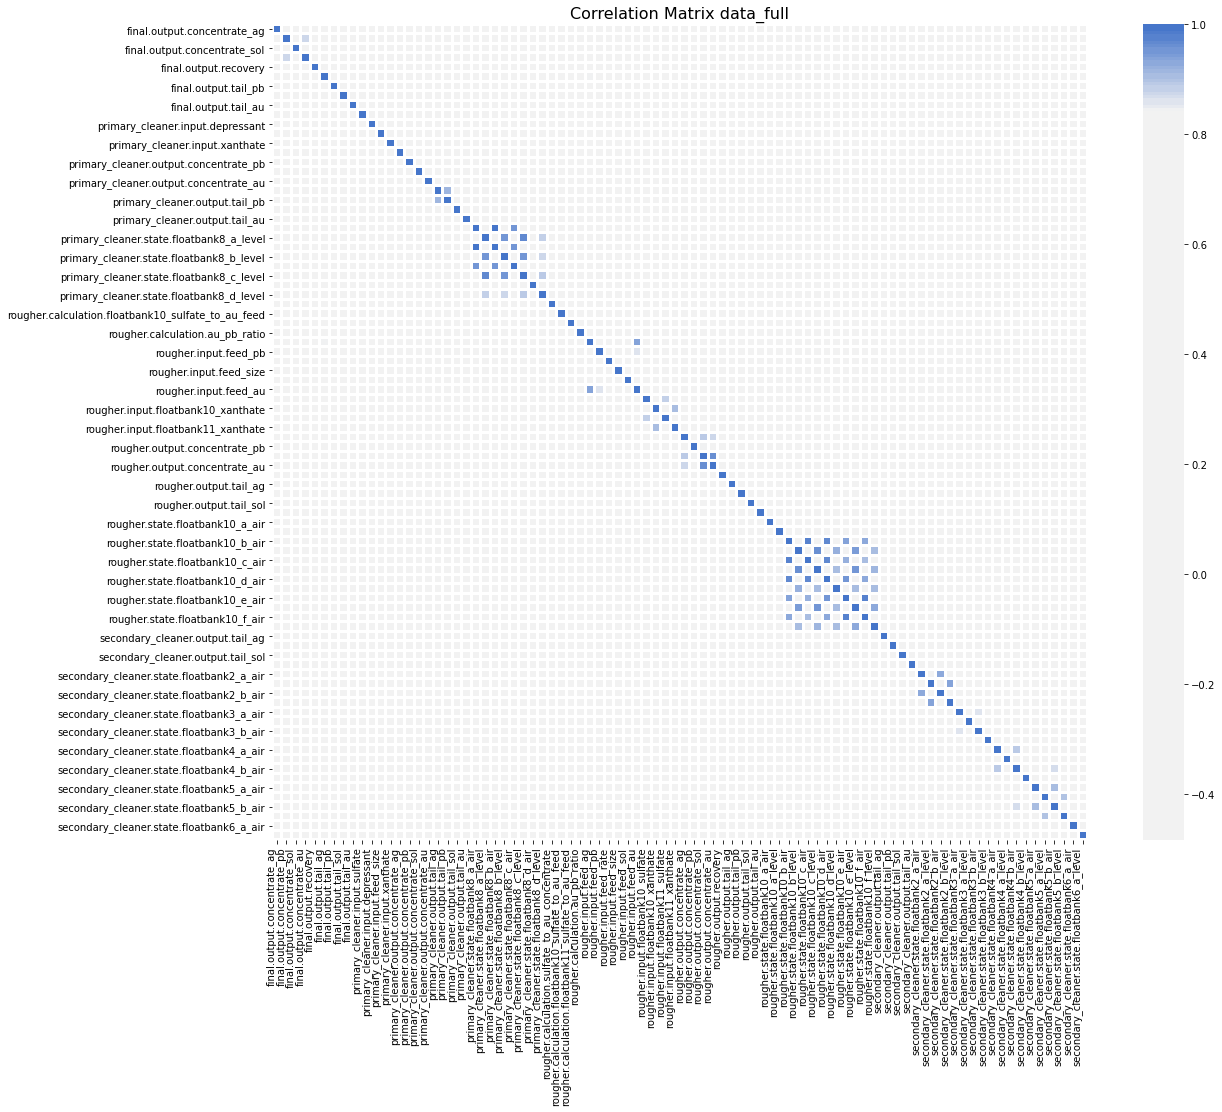

In [59]:
fig = plt.figure(figsize=(20, 15))
ax = sns.heatmap(data_full.corr(), 
                 center=0, 
                 linewidths=2, 
                 cmap=sns.diverging_palette(0, 255, sep=216, n=256), 
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, horizontalalignment='right')
plt.title('Correlation Matrix data_full', fontsize=16);

#### Между несколькими признаками можно наблюдать сильную взаимосвязь. (Коэффициент корреляции > 0.8)

1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака   rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.  
1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?  
1.4. Проведите предобработку данных.  

### 1.2. Проверьте, что эффективность обогащения рассчитана правильно. 
#### Вычислите её на обучающей выборке для признака rougher.output.recovery. 
#### Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [39]:
data_train['rougher.output.recovery'].isna().sum()

2557

In [40]:
### Список строк с нулевыми значениями rougher.output.recovery

In [41]:
rougher_output_recovery_NaN = data_train[data_train['rougher.output.recovery'].isnull()].index
rougher_output_recovery_NaN

Index(['2016-01-17 05:00:00', '2016-01-19 03:00:00', '2016-01-19 04:00:00',
       '2016-01-19 05:00:00', '2016-01-19 06:00:00', '2016-01-19 07:00:00',
       '2016-01-19 08:00:00', '2016-01-19 09:00:00', '2016-01-19 10:00:00',
       '2016-01-19 11:00:00',
       ...
       '2018-08-08 03:59:59', '2018-08-09 14:59:59', '2018-08-09 20:59:59',
       '2018-08-09 21:59:59', '2018-08-10 17:59:59', '2018-08-11 16:59:59',
       '2018-08-11 17:59:59', '2018-08-11 18:59:59', '2018-08-11 19:59:59',
       '2018-08-11 20:59:59'],
      dtype='object', name='date', length=2557)

#### Расчет mae

In [42]:
data_recovery = data_train[['rougher.output.recovery']]
data_recovery

rougher.output.recovery
date                                        
2016-01-15 00:00:00                87.107763
2016-01-15 01:00:00                86.843261
2016-01-15 02:00:00                86.842308
2016-01-15 03:00:00                87.226430
2016-01-15 04:00:00                86.688794
...                                      ...
2018-08-18 06:59:59                89.574376
2018-08-18 07:59:59                87.724007
2018-08-18 08:59:59                88.890579
2018-08-18 09:59:59                89.858126
2018-08-18 10:59:59                89.514960

[16844 rows x 1 columns]

In [43]:
c = data_train['rougher.output.concentrate_au']

f = data_train['rougher.input.feed_au']

t = data_train['rougher.output.tail_au']

#### Пустые значения в rougher.output.concentrate_au rougher.input.feed_au rougher.output.tail_au

In [44]:
nan_mask_concentrate_au = data_train['rougher.output.concentrate_au'].isnull()

nan_concentrate_au_index = data_train['rougher.output.concentrate_au'][nan_mask_concentrate_au].index


In [45]:
nan_mask_feed_au = data_train['rougher.input.feed_au'].isnull()
  
nan_feed_au_index = data_train['rougher.input.feed_au'][nan_mask_feed_au].index


In [46]:
nan_mask_tail_au = data_train['rougher.output.tail_au'].isnull()
 
nan_tail_au_index = data_train['rougher.output.tail_au'][nan_mask_tail_au].index


In [47]:
nan_concentrate_au_index.isin(nan_tail_au_index)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [48]:
#### Количество объектов, где пропущены все 3 признака

In [49]:
len(t[nan_mask_concentrate_au & nan_mask_feed_au & nan_mask_tail_au])

66

In [50]:
data_train['rougher.output.concentrate_au'].isnull().sum()

66

In [51]:
data_train['rougher.input.feed_au'].isna().sum()

67

In [52]:
data_train['rougher.output.tail_au'].isna().sum()

2233

#### Нулевые значения в колонке rougher.output.concentrate_au, также имеет нулевые значения в rougher.input.feed_au и rougher.output.tail_au. Восстановить по ним целевой признак не получится, так что придется удалить их из исходного датасета по срезу индекса

In [53]:
data_train.drop(index=nan_concentrate_au_index, inplace=True)

In [54]:
data_train

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-15 00:00:00                     6.055403                     9.889648   
2016-01-15 01:00:00                     6.029369                     9.968944   
2016-01-15 02:00:00                     6.055926                    10.213995   
2016-01-15 03:00:00                     6.047977                     9.977019   
2016-01-15 04:00:00                     6.148599                    10.142511   
...                                          ...                          ...   
2018-08-18 06:59:59                     3.224920                    11.356233   
2018-08-18 07:59:59                     3.195978                    11.349355   
2018-08-18 08:59:59                     3.109998                    11.434366   
2018-08-18 09:59:59                     3.367241                    11.625587   
2018-08-18 10:59:59                     3.598375                    11.737832   

                     final.output.concentrate_sol  \
date                                                
2016-01-15 00:00:00                      5.507324   
2016-01-15 01:00:00                      5.257781   
2016-01-15 02:00:00                      5.383759   
2016-01-15 03:00:00                      4.858634   
2016-01-15 04:00:00                      4.939416   
...                                           ...   
2018-08-18 06:59:59                      6.803482   
2018-08-18 07:59:59                      6.862249   
2018-08-18 08:59:59                      6.886013   
2018-08-18 09:59:59                      6.799433   
2018-08-18 10:59:59                      6.717509   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-15 00:00:00                    42.192020              70.541216   
2016-01-15 01:00:00                    42.701629              69.266198   
2016-01-15 02:00:00                    42.657501              68.116445   
2016-01-15 03:00:00                    42.689819              68.347543   
2016-01-15 04:00:00                    42.774141              66.927016   
...                                          ...                    ...   
2018-08-18 06:59:59                    46.713954              73.755150   
2018-08-18 07:59:59                    46.866780              69.049291   
2018-08-18 08:59:59                    46.795691              67.002189   
2018-08-18 09:59:59                    46.408188              65.523246   
2018-08-18 10:59:59                    46.299438              70.281454   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-15 00:00:00             10.411962              0.895447   
2016-01-15 01:00:00             10.462676              0.927452   
2016-01-15 02:00:00             10.507046              0.953716   
2016-01-15 03:00:00             10.422762              0.883763   
2016-01-15 04:00:00             10.360302              0.792826   
...                                   ...                   ...   
2018-08-18 06:59:59              8.769645              3.141541   
2018-08-18 07:59:59              8.897321              3.130493   
2018-08-18 08:59:59              8.529606              2.911418   
2018-08-18 09:59:59              8.777171              2.819214   
2018-08-18 10:59:59              8.406690              2.517518   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-15 00:00:00              16.904297              2.143149   
2016-01-15 01:00:00              16.634514              2.224930   
2016-01-15 02:00:00              16.208849              2.257889   
2016-01-15 03:00:00              16.532835              2.146849   
2016-01-15 04:00:00  

In [55]:
def calculate_recovery(c, f, t):

    result = (c * (f - t)/(f * (c-t))) * 100
    result = result.apply(lambda x: np.nan if x <= 0 or x >= 100 else x)
   
    return result

In [56]:
data_recovery['rougher.output.recovery_calc'] = calculate_recovery(data_train['rougher.output.concentrate_au'],
                                                                         data_train['rougher.input.feed_au'],
                                                                         data_train['rougher.output.tail_au'])

In [57]:
data_recovery.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16844 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   rougher.output.recovery       14287 non-null  float64
 1   rougher.output.recovery_calc  13961 non-null  float64
dtypes: float64(2)
memory usage: 1.0+ MB


#### Нулевые значения в тренировочной и расчетной по тренировочнм данным выборках

In [58]:
data_recovery['rougher.output.recovery'].isnull().sum(), data_recovery['rougher.output.recovery_calc'].isnull().sum()

(2557, 2883)

#### Расчеты нам  помогли определить, что в тренировочном датасете больше не нулевых значений, чем мы рассчитали по его данным. Поэтому восстановить их расчетом по формуле не удастся. Необходимо искать другие решения заполнения 0 или удалять строки с пустыми значениями.

#### Удаляем пустые строки из датасета для возможности расчета mae.

In [176]:
# data_train = data_train.dropna(subset=['rougher.output.recovery'])

#### Удалим теже данные с нулевыми значениями в rougher.output.recovery, чтобы в дальнейшем эти данные не повлияли на построение моделей

In [177]:
# data_full_update = data_full.drop(data_full.index[rougher_output_recovery_NaN])
# data_full_update.shape

#### Рассчитаем MAE

In [178]:
data_recovery = data_recovery.dropna()

In [179]:
mae_recovery = mean_absolute_error(data_recovery['rougher.output.recovery'], data_recovery['rougher.output.recovery_calc'])
mae_recovery

9.665437357510252e-15

#### МАЕ близко к 0. Значит значения в выборках идентичны. 

#### 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?


In [59]:
loss_feature = []
for column in data_train:
    if column not in data_test:
        loss_feature.append(column)

In [60]:
loss_feature

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [182]:
data_train.shape[1] - data_test.shape[1]
#### В тренировочной выборке на 34 колонки больше, чем на тестовой. Уберем из тренировочной выборки, те колонки, которы отсутсвуют в тестовой

34

#### В основном отсутвуют колонки со значениями параметров продукта, расчётные характеристики. 
#### Данные появляются позже формирования датасетов.

#### 1.4. Проведите предобработку данных.

#### В тренировочном датасете оставим только колонки имеющиеся в тестовом

In [61]:
data_train = data_train[data_test.columns]

In [62]:
# print(data_train_new.shape)
print(data_test.shape)
print(data_train.shape)
print(data_full.shape)

(5850, 52)
(16778, 52)
(22694, 86)


In [63]:
data_train.shape[0] + data_test.shape[0] 

22628

In [64]:
data_full.shape

(22694, 86)

In [65]:
data_test.isna().sum().sum()

2054

In [66]:
data_train.isna().sum().sum()

9812

In [67]:
data_full.isna().sum().sum()

34829

In [68]:
#### Удалим все колонки, где во всех строках значения NaN, если такие есть.

In [69]:
for dataset in data_train, data_test, data_full:
    dataset = dataset.dropna(how='all')

In [70]:
#### В полном датасете диапазон значений целевого признака rougher.output.recovery от 0 до 100, что верно. Аномальных значений нет

In [71]:
data_full['rougher.output.recovery'].describe() 

count    19597.000000
mean        83.078122
std         14.661880
min          0.000000
25%         80.941306
50%         86.144121
75%         89.987561
max        100.000000
Name: rougher.output.recovery, dtype: float64

#### Заполним пропуски последним известным значением перед пропуском. Этот метод может подойти нашей задаче, но желательно предварительно исследовать насколько близки пропуски. Если разрыв между пропусками составляется не часы, а дни, тогда при таком варианте заполнения предсказания могут быть искажены. 

In [72]:
data_full_new = data_full.fillna(method='ffill')

In [73]:
data_test = data_test.fillna(method='ffill')

In [74]:
data_train = data_train.fillna(method='ffill')

#### Избавимся от выбросов

In [75]:
from scipy import stats

(z = (X — μ) / σ)

In [76]:
#### Удалим выбросы с помощью статистического теста  - zscores. Из каждого значения столбца вычитается среднее по столбцу и делится на стандартное отклонение

# На этом этапе по каждой колонке рассчитывается z_score. Расчет происходит по формуле z_score = (x - x.mean()) / x.std()
z_scores = stats.zscore(data_train.select_dtypes('float'))

# Берем модуль от рассчитанного числа
abs_z_scores = np.abs(z_scores)

# Устанавливаем пороговое значение и создаем срез данных
threshold= 3
filtered_mask = (abs_z_scores < threshold).all(axis=1)

In [77]:
# Создаем новый датафрейм по срезу данных
data_train_new = data_train[filtered_mask]
data_train_new

primary_cleaner.input.sulfate  \
date                                                 
2016-01-15 00:00:00                     127.092003   
2016-01-15 01:00:00                     125.629232   
2016-01-15 02:00:00                     123.819808   
2016-01-15 03:00:00                     122.270188   
2016-01-15 04:00:00                     117.988169   
...                                            ...   
2018-08-18 06:59:59                     123.381787   
2018-08-18 07:59:59                     120.878188   
2018-08-18 08:59:59                     105.666118   
2018-08-18 09:59:59                      98.880538   
2018-08-18 10:59:59                      95.248427   

                     primary_cleaner.input.depressant  \
date                                                    
2016-01-15 00:00:00                         10.128295   
2016-01-15 01:00:00                         10.296251   
2016-01-15 02:00:00                         11.316280   
2016-01-15 03:00:00                         11.322140   
2016-01-15 04:00:00                         11.913613   
...                                               ...   
2018-08-18 06:59:59                          8.028927   
2018-08-18 07:59:59                          7.962636   
2018-08-18 08:59:59                          7.955111   
2018-08-18 09:59:59                          7.984164   
2018-08-18 10:59:59                          8.078957   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-01-15 00:00:00                             7.25   
2016-01-15 01:00:00                             7.25   
2016-01-15 02:00:00                             7.25   
2016-01-15 03:00:00                             7.25   
2016-01-15 04:00:00                             7.25   
...                                              ...   
2018-08-18 06:59:59                             6.50   
2018-08-18 07:59:59                             6.50   
2018-08-18 08:59:59                             6.50   
2018-08-18 09:59:59                             6.50   
2018-08-18 10:59:59                             6.50   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-01-15 00:00:00                        0.988759   
2016-01-15 01:00:00                        1.002663   
2016-01-15 02:00:00                        0.991265   
2016-01-15 03:00:00                        0.996739   
2016-01-15 04:00:00                        1.009869   
...                                             ...   
2018-08-18 06:59:59                        1.304232   
2018-08-18 07:59:59                        1.302419   
2018-08-18 08:59:59                        1.315926   
2018-08-18 09:59:59                        1.241969   
2018-08-18 10:59:59                        1.283045   

                     primary_cleaner.state.floatbank8_a_air  \
date                                                          
2016-01-15 00:00:00                             1549.775757   
2016-01-15 01:00:00                             1576.166671   
2016-01-15 02:00:00                             1601.556163   
2016-01-15 03:00:00                             1599.968720   
2016-01-15 04:00:00                             1601.339707   
...                                                     ...   
2018-08-18 06:59:59                             1648.421193   
2018-08-18 07:59:59                             1649.820162   
2018-08-18 08:59:59                             1649.166761   
2018-08-18 09:59:59                             1646.547763   
2018-08-18 10:59:59                             1648.759906   

                     primary_cleaner.state.floatbank8_a_level  \
date                                                            
2016-01-15 00:00:00                               -498.912140   
2016-01-15 01:00:00                               -500.904965   
2016-01-15 02:00:00                               -

In [78]:
data_train = data_train_new[data_test.columns]

In [79]:
data_train

primary_cleaner.input.sulfate  \
date                                                 
2016-01-15 00:00:00                     127.092003   
2016-01-15 01:00:00                     125.629232   
2016-01-15 02:00:00                     123.819808   
2016-01-15 03:00:00                     122.270188   
2016-01-15 04:00:00                     117.988169   
...                                            ...   
2018-08-18 06:59:59                     123.381787   
2018-08-18 07:59:59                     120.878188   
2018-08-18 08:59:59                     105.666118   
2018-08-18 09:59:59                      98.880538   
2018-08-18 10:59:59                      95.248427   

                     primary_cleaner.input.depressant  \
date                                                    
2016-01-15 00:00:00                         10.128295   
2016-01-15 01:00:00                         10.296251   
2016-01-15 02:00:00                         11.316280   
2016-01-15 03:00:00                         11.322140   
2016-01-15 04:00:00                         11.913613   
...                                               ...   
2018-08-18 06:59:59                          8.028927   
2018-08-18 07:59:59                          7.962636   
2018-08-18 08:59:59                          7.955111   
2018-08-18 09:59:59                          7.984164   
2018-08-18 10:59:59                          8.078957   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-01-15 00:00:00                             7.25   
2016-01-15 01:00:00                             7.25   
2016-01-15 02:00:00                             7.25   
2016-01-15 03:00:00                             7.25   
2016-01-15 04:00:00                             7.25   
...                                              ...   
2018-08-18 06:59:59                             6.50   
2018-08-18 07:59:59                             6.50   
2018-08-18 08:59:59                             6.50   
2018-08-18 09:59:59                             6.50   
2018-08-18 10:59:59                             6.50   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-01-15 00:00:00                        0.988759   
2016-01-15 01:00:00                        1.002663   
2016-01-15 02:00:00                        0.991265   
2016-01-15 03:00:00                        0.996739   
2016-01-15 04:00:00                        1.009869   
...                                             ...   
2018-08-18 06:59:59                        1.304232   
2018-08-18 07:59:59                        1.302419   
2018-08-18 08:59:59                        1.315926   
2018-08-18 09:59:59                        1.241969   
2018-08-18 10:59:59                        1.283045   

                     primary_cleaner.state.floatbank8_a_air  \
date                                                          
2016-01-15 00:00:00                             1549.775757   
2016-01-15 01:00:00                             1576.166671   
2016-01-15 02:00:00                             1601.556163   
2016-01-15 03:00:00                             1599.968720   
2016-01-15 04:00:00                             1601.339707   
...                                                     ...   
2018-08-18 06:59:59                             1648.421193   
2018-08-18 07:59:59                             1649.820162   
2018-08-18 08:59:59                             1649.166761   
2018-08-18 09:59:59                             1646.547763   
2018-08-18 10:59:59                             1648.759906   

                     primary_cleaner.state.floatbank8_a_level  \
date                                                            
2016-01-15 00:00:00                               -498.912140   
2016-01-15 01:00:00                               -500.904965   
2016-01-15 02:00:00                               -

## 2. Проанализируйте данные
### 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [80]:
elements = (data_full_new.columns[data_full_new.columns.
                             str.contains('concentrate_') & 
                                  data_full_new.columns.str.contains('au|ag|pb')])
elements

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_au', 'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_au',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
       'rougher.output.concentrate_au'],
      dtype='object')

In [81]:
metals = [('au', 'золота'), ('ag', 'серебра'), ('pb', 'свинца')]

In [82]:
stages = [('rougher.output.concentrate_', 'Флотация'), 
          ('primary_cleaner.output.concentrate_', 'Первый этап очистки'), 
          ('final.output.concentrate_', 'Второй этап очистки')]

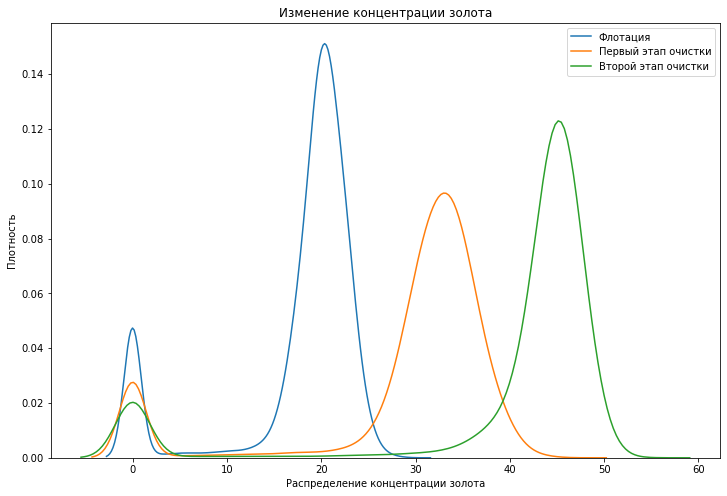

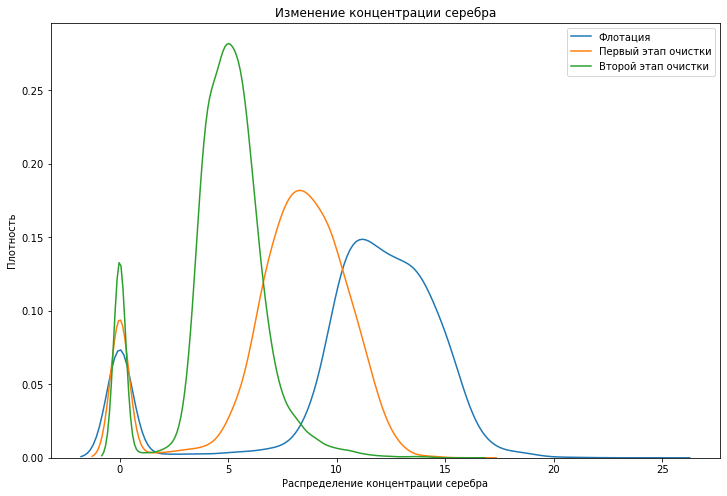

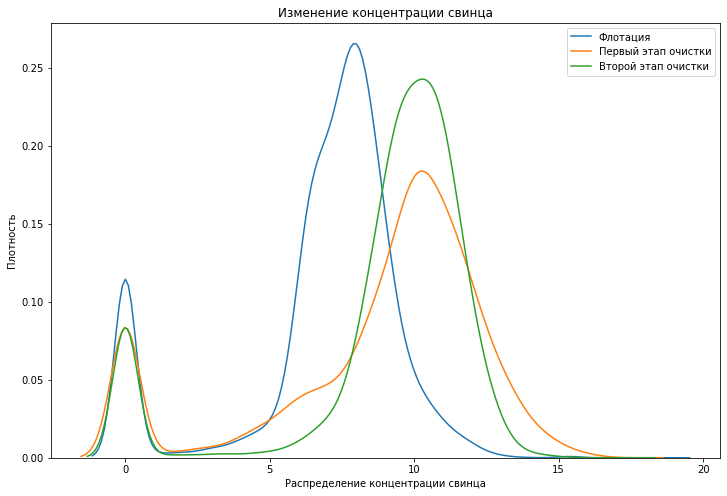

In [83]:
for elem in metals:
    plt.figure(figsize=(12, 8))
    for stage in stages:
        ax = sns.kdeplot(data_full_new[stage[0] + elem[0]], label=stage[1])
        plt.legend()
        _ = ax.set(xlabel='Распределение концeнтрации ' + elem[1],
                   ylabel='Плотность',
                   title='Изменение концентрации ' + elem[1])
    plt.show() 

#### Построим график "Ящик с усами" для более наглядного измененеия концентраций элементов по этапам очистки

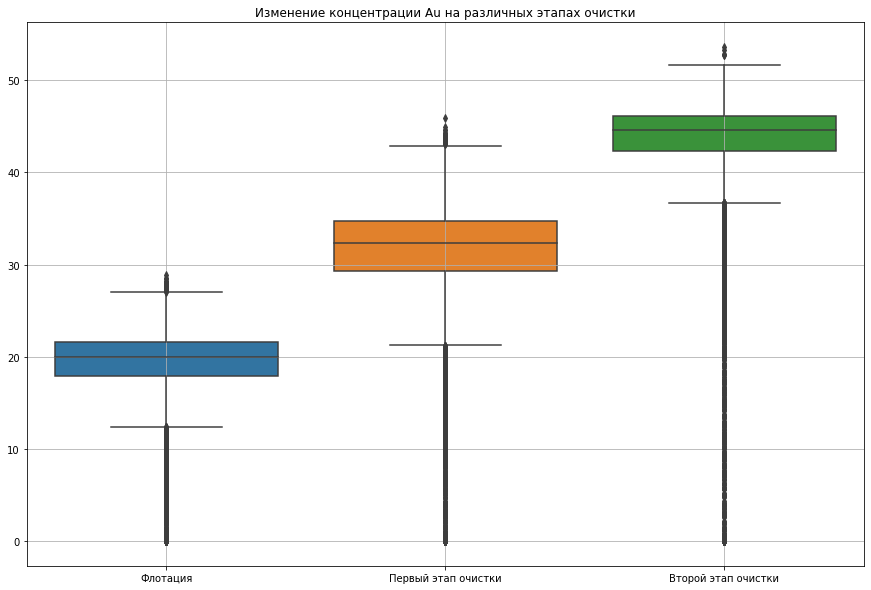

In [84]:
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=data_full_new[['rougher.output.concentrate_au',  
                                    'primary_cleaner.output.concentrate_au',  
                                    'final.output.concentrate_au']])
ax.set_title("Изменение концентрации Au на различных этапах очистки")
plt.xticks([0, 1, 2], [stages[0][1], stages[1][1], stages[2][1]])
plt.grid(True);

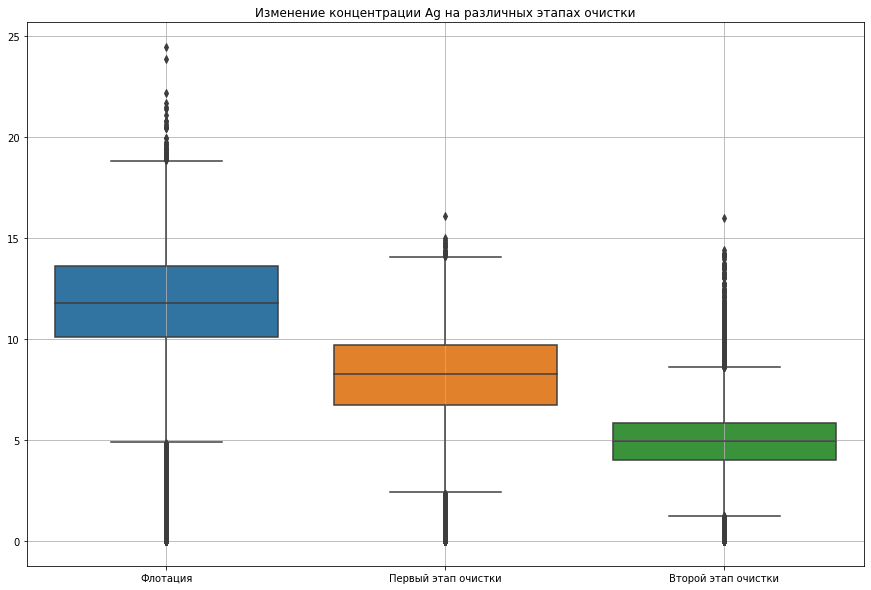

In [85]:
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=data_full_new[['rougher.output.concentrate_ag',  
                                    'primary_cleaner.output.concentrate_ag',  
                                    'final.output.concentrate_ag']])
ax.set_title("Изменение концентрации Ag на различных этапах очистки")
plt.xticks([0, 1, 2], [stages[0][1], stages[1][1], stages[2][1]])
plt.grid(True);

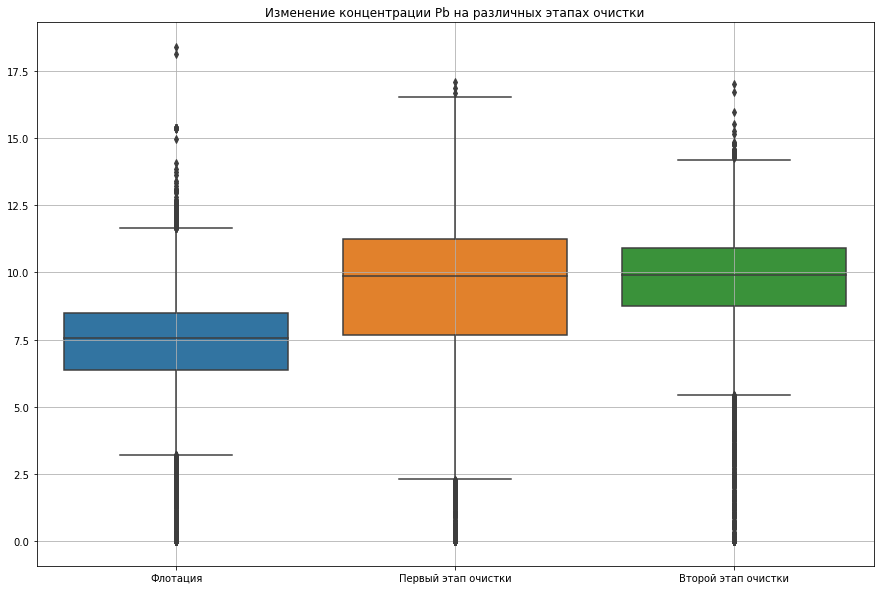

In [86]:
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=data_full_new[['rougher.output.concentrate_pb',  
                                    'primary_cleaner.output.concentrate_pb',  
                                    'final.output.concentrate_pb']])
ax.set_title("Изменение концентрации Pb на различных этапах очистки")
plt.xticks([0, 1, 2], [stages[0][1], stages[1][1], stages[2][1]])
plt.grid(True);

### Вывод: концентрация золота возрастает от этапа к этапу

### 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [87]:
data_train.columns[data_train.columns.str.contains('feed_size')]

Index(['primary_cleaner.input.feed_size', 'rougher.input.feed_size'], dtype='object')

In [88]:
feed_size_train = data_train['rougher.input.feed_size']
feed_size_test = data_test['rougher.input.feed_size']

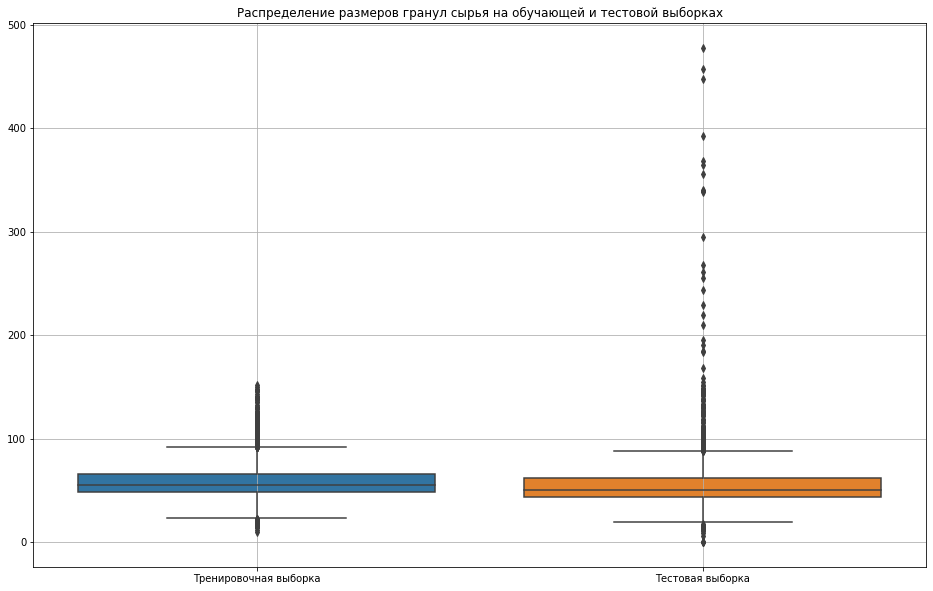

In [89]:
fig, ax = plt.subplots(nrows=1, 
                       ncols=1,
                       figsize=(16, 10))
ax = sns.boxplot(data=[feed_size_train, feed_size_test])
ax.set_title("Распределение размеров гранул сырья на обучающей и тестовой выборках")
plt.xticks([0, 1], ['Тренировочная выборка', 'Тестовая выборка'])
plt.grid(True);

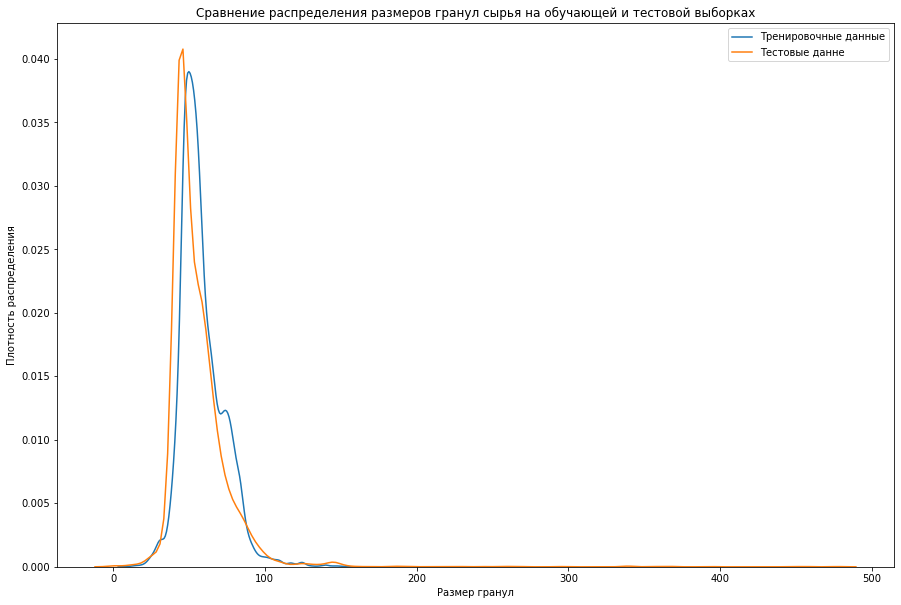

In [90]:
plt.figure(figsize=(15, 10))
for var in feed_size_train, feed_size_test:
    ax = sns.kdeplot(var, label=['Размер гранул тренировочной выборки', 'Размер гранул тестовой выборки'])
    label=['Тренировочные данные', 'Тестовые данне']
    _ = ax.set(xlabel='Размер гранул',
               ylabel='Плотность распределения',
               title='Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках')
    plt.legend(label);

#### Распределения незначительно различаются.

### 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

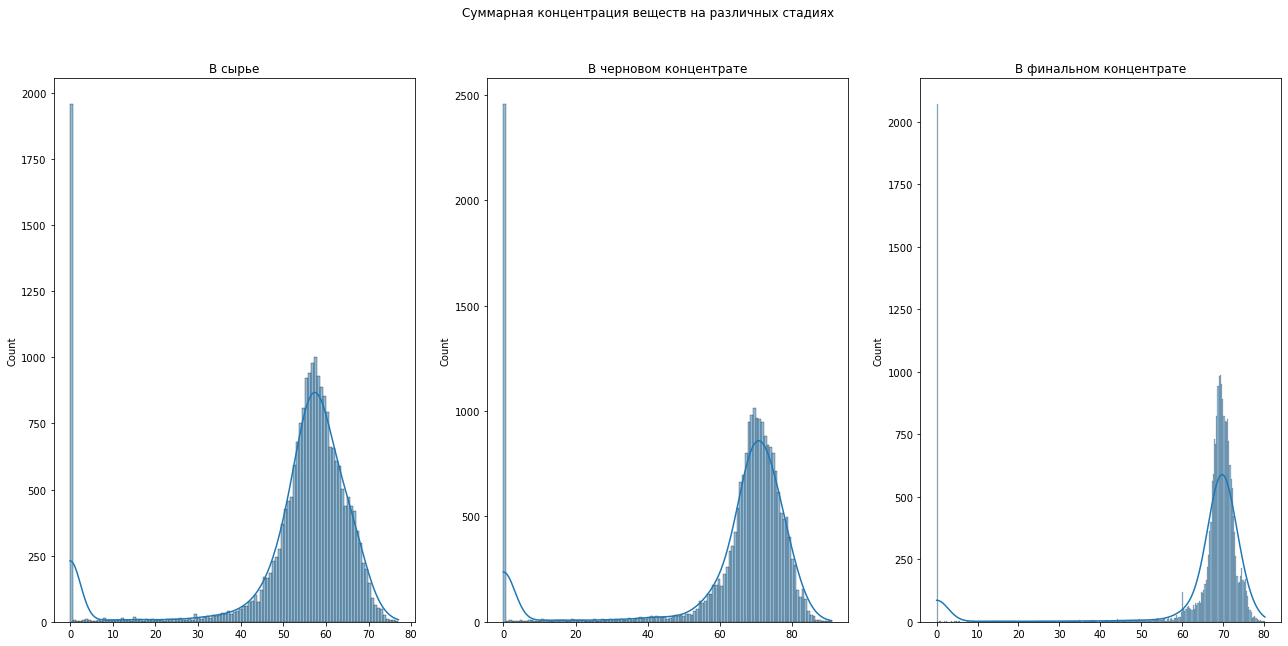

In [91]:
stages_of_concentration = [('rougher.input.feed_', 'В сырье'),
                        ('rougher.output.concentrate_', 'В черновом концентрате'), 
                        ('final.output.concentrate_', 'В финальном концентрате')]

metalls = ['au', 'ag', 'pb', 'sol']

fig, ax = plt.subplots(nrows=1, 
                       ncols=3, 
                       figsize=(22, 10))

fig.suptitle('Суммарная концентрация веществ на различных стадиях')

for stage, axes in zip(stages_of_concentration, ax):
    axes.set_title(stage[1])
    overall =  data_full_new[stage[0]+ metalls[0]] + \
        data_full_new[stage[0]+ metalls[1]] + \
        data_full_new[stage[0]+ metalls[2]] + \
        data_full_new[stage[0]+ metalls[3]]
    
    sns.histplot(overall, ax=axes, kde=True)

plt.show()

#### По графику можно увидеть аномальные значения в 0. Таких данных по всем элементам не может быть. Избавимся от выбросов и снова построим график.

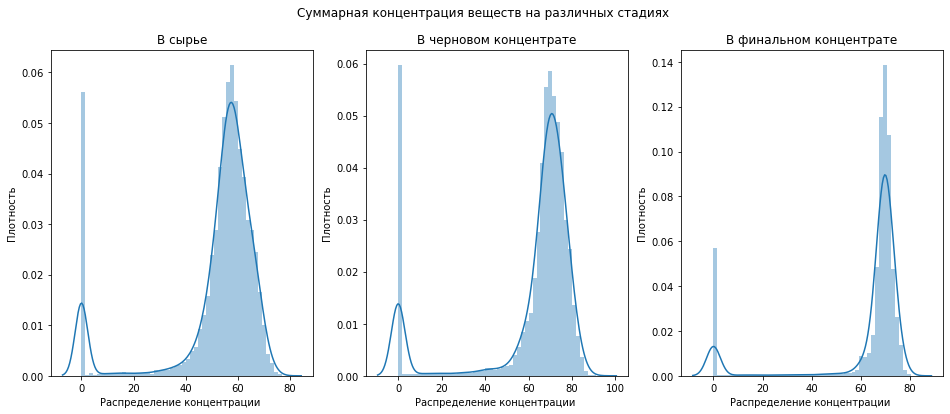

In [92]:
stages_of_concentration = [('rougher.input.feed_', 'В сырье'),
                        ('rougher.output.concentrate_', 'В черновом концентрате'), 
                        ('final.output.concentrate_', 'В финальном концентрате')]

metalls = ['au', 'ag', 'pb', 'sol']

fig, ax = plt.subplots(nrows=1, 
                       ncols=3, 
                       figsize=(16, 6))

fig.suptitle('Суммарная концентрация веществ на различных стадиях')

for stage, axes in zip(stages_of_concentration, ax):
    axes.set_title(stage[1])
    overall =  data_full_new[stage[0]+ metalls[0]] + \
        data_full_new[stage[0]+ metalls[1]] + \
        data_full_new[stage[0]+ metalls[2]] + \
        data_full_new[stage[0]+ metalls[3]]
    
    sns.distplot(overall, ax=axes)  
    _ = axes.set(xlabel='Распределение концeнтрации ',
                 ylabel='Плотность')

plt.show()

In [93]:
(data_full_new[stage[0]+ metalls[0]] == 0).sum()

1669

In [94]:
(data_full_new[stage[0]+ metalls[1]] == 0).sum()

1671

In [95]:
(data_full_new[stage[0]+ metalls[2]] == 0).sum()

1669

In [216]:
# def remove_outlier(df_in, col_name):

#     q1 = df_in[col_name].quantile(0.5)
#     q3 = df_in[col_name].quantile(0.95)
#     iqr = q3-q1
# #     print(iqr)
#     fence_low  = q1 - 3 * iqr
# #     print(fence_low)
#     fence_high = q3 + 3 * iqr
# #     print(fence_high)
#     df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]

#     return df_out

In [217]:
# remove_outlier(data_train, data_train.columns)

### Заменим нулевые значения на NaN для последующего удаления.

In [96]:
data_full_new = data_full_new.replace(0, np.NaN)

In [97]:
data_full_new.shape

(22694, 86)

In [98]:
data_full_new.isna().sum().sum()

63222

In [99]:
data_full_new = data_full_new.dropna(axis=0)

In [100]:
data_full_new.isna().sum().sum()

0

#### Проверим без нулевых значений

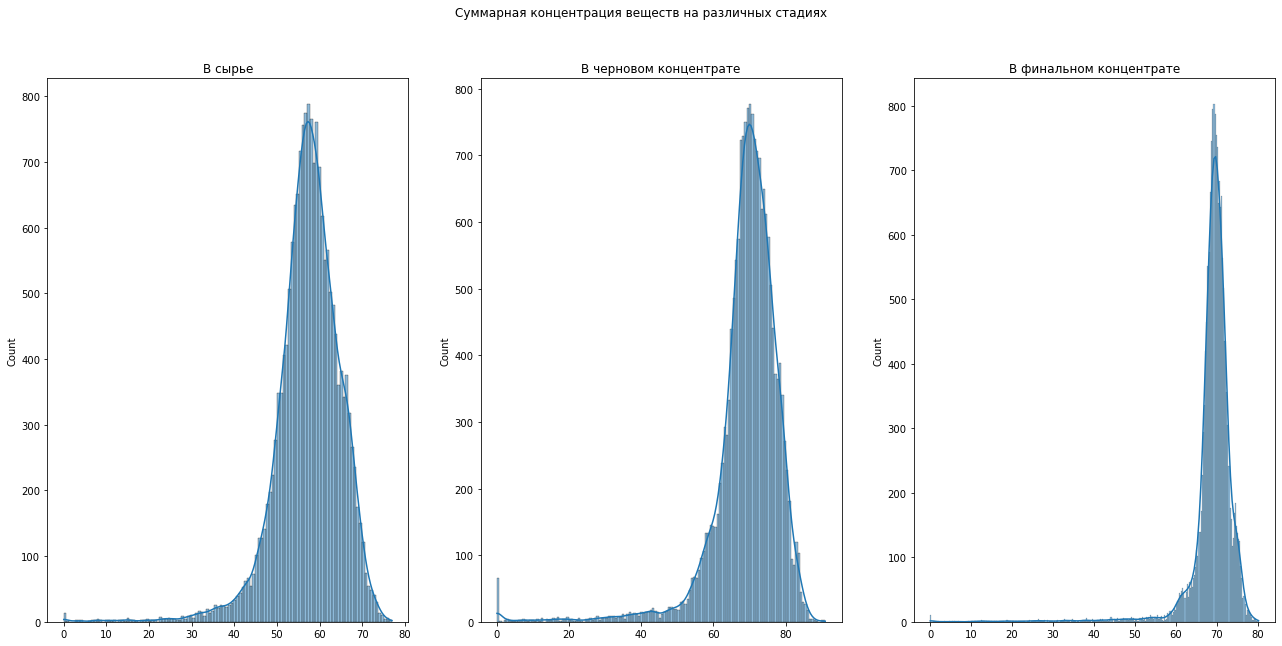

In [101]:
stages_of_concentration = [('rougher.input.feed_', 'В сырье'),
                        ('rougher.output.concentrate_', 'В черновом концентрате'), 
                        ('final.output.concentrate_', 'В финальном концентрате')]

metalls = ['au', 'ag', 'pb', 'sol']

fig, ax = plt.subplots(nrows=1, 
                       ncols=3, 
                       figsize=(22, 10))

fig.suptitle('Суммарная концентрация веществ на различных стадиях')

for stage, axes in zip(stages_of_concentration, ax):
    axes.set_title(stage[1])
    overall_ =  data_full_new[stage[0]+ metalls[0]] + \
        data_full_new[stage[0]+ metalls[1]] + \
        data_full_new[stage[0]+ metalls[2]] + \
        data_full_new[stage[0]+ metalls[3]]
    
    sns.histplot(overall_, ax=axes, kde=True)

plt.show()

## 3. Постройте модель
  
 

### 3.1. Напишите функцию для вычисления итоговой sMAPE.  

<img src="smape_1576238825.jpg">

In [102]:
state = np.random.RandomState(2021)

In [103]:
data_train.shape, data_full_new.shape

((14327, 52), (18242, 86))

#### Подготовим выборки для построения моделей. Так как в тестовой выбоке нет целевых признаков, то возмем их из полного датасета по срезу индексов

In [171]:
data_full_new.reset_index(drop=True, inplace=True)
data_train_new.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

In [200]:
feature_train = data_train_new.reset_index().copy()

target_train_rouger = (data_full_new.loc[feature_train.index, 'rougher.output.recovery'])

target_train_final = (data_full_new.loc[feature_train.index, 'final.output.recovery'])

In [201]:
feature_train.shape, data_full_new.shape

((14327, 32), (18242, 87))

In [202]:
#Добавляем из полного датасета целевые признаки по срезу индексов
target_train = data_full_new.loc[feature_train.index, ['rougher.output.recovery', 'final.output.recovery']]

#### Поскольку в тестовом датасете отсутсвуют целевые признаки возмем их из полного по срезу индексов

In [203]:
feature_test = data_test.reset_index().copy()

target_test_rouger = data_full_new.loc[feature_test.index, 'rougher.output.recovery']

target_test_final = data_full_new.loc[feature_test.index, 'final.output.recovery']

#Добавляем из полного датасета целевые признаки по срезу индексов
target_test = data_full_new.loc[feature_test.index, ['rougher.output.recovery', 'final.output.recovery']]

#### Проверим размерность

In [204]:
feature_train.shape, target_train.shape, feature_test.shape, target_test.shape

((14327, 32), (14327, 2), (5850, 32), (5850, 2))

##### Избавимся от сильно коррелирующих между собой признаков, так как они могут ухудшить качество моделей.

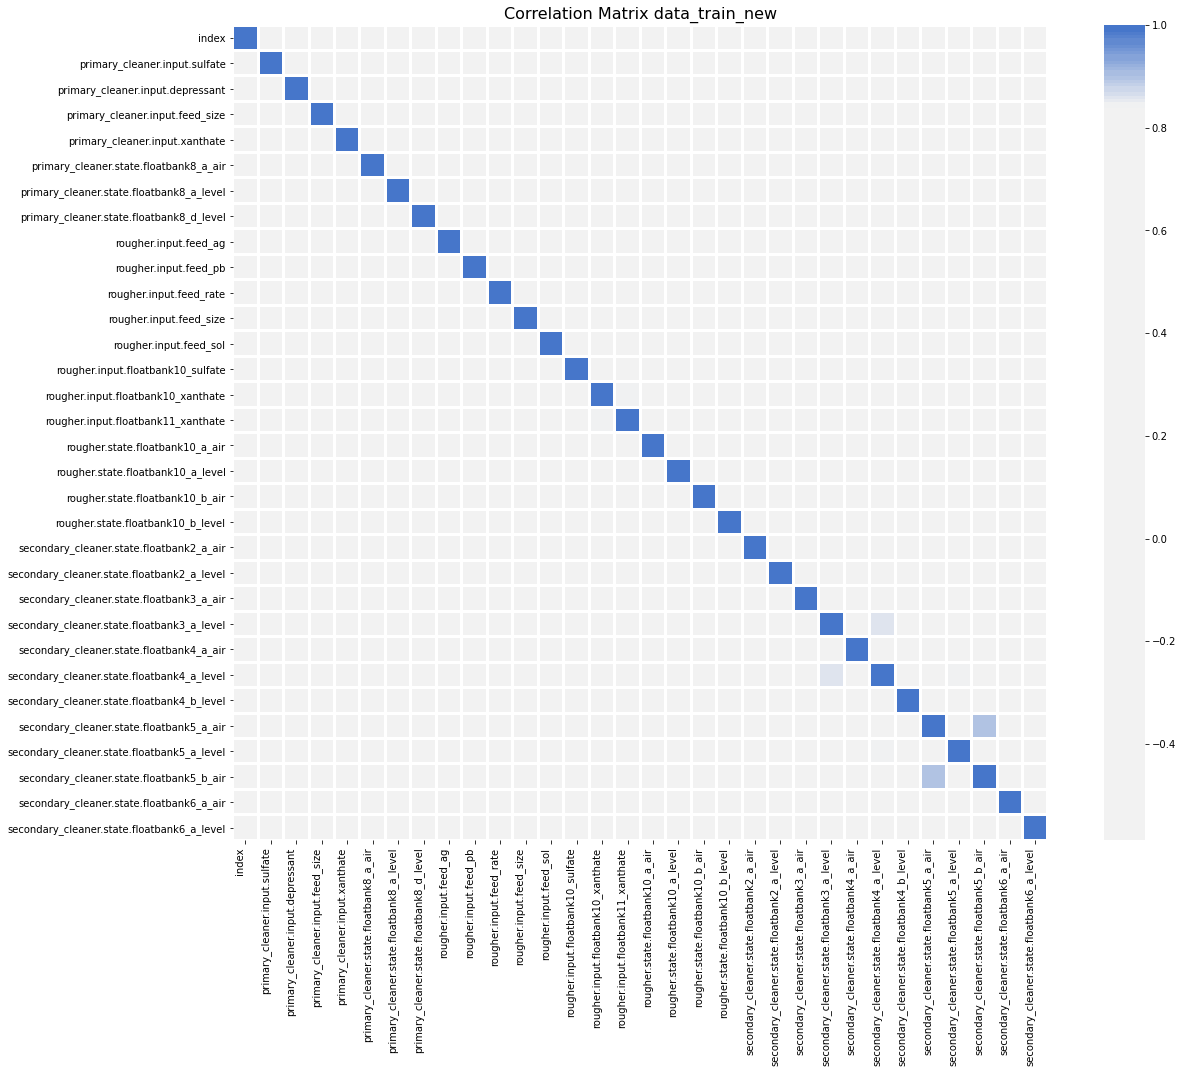

In [205]:
fig = plt.figure(figsize=(20, 15))
ax = sns.heatmap(feature_train.corr(), 
                 center=0, 
                 linewidths=2, 
                 cmap=sns.diverging_palette(0, 255, sep=216, n=256), 
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, horizontalalignment='right')
plt.title('Correlation Matrix data_train_new', fontsize=16);

In [206]:
def correlation_col(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [207]:
### Удалим все колнки которые коррелируют на 85% и более.
train_corr_mask = correlation_col(feature_train, .9)
train_corr_mask

set()

In [208]:
# Тестовые данне

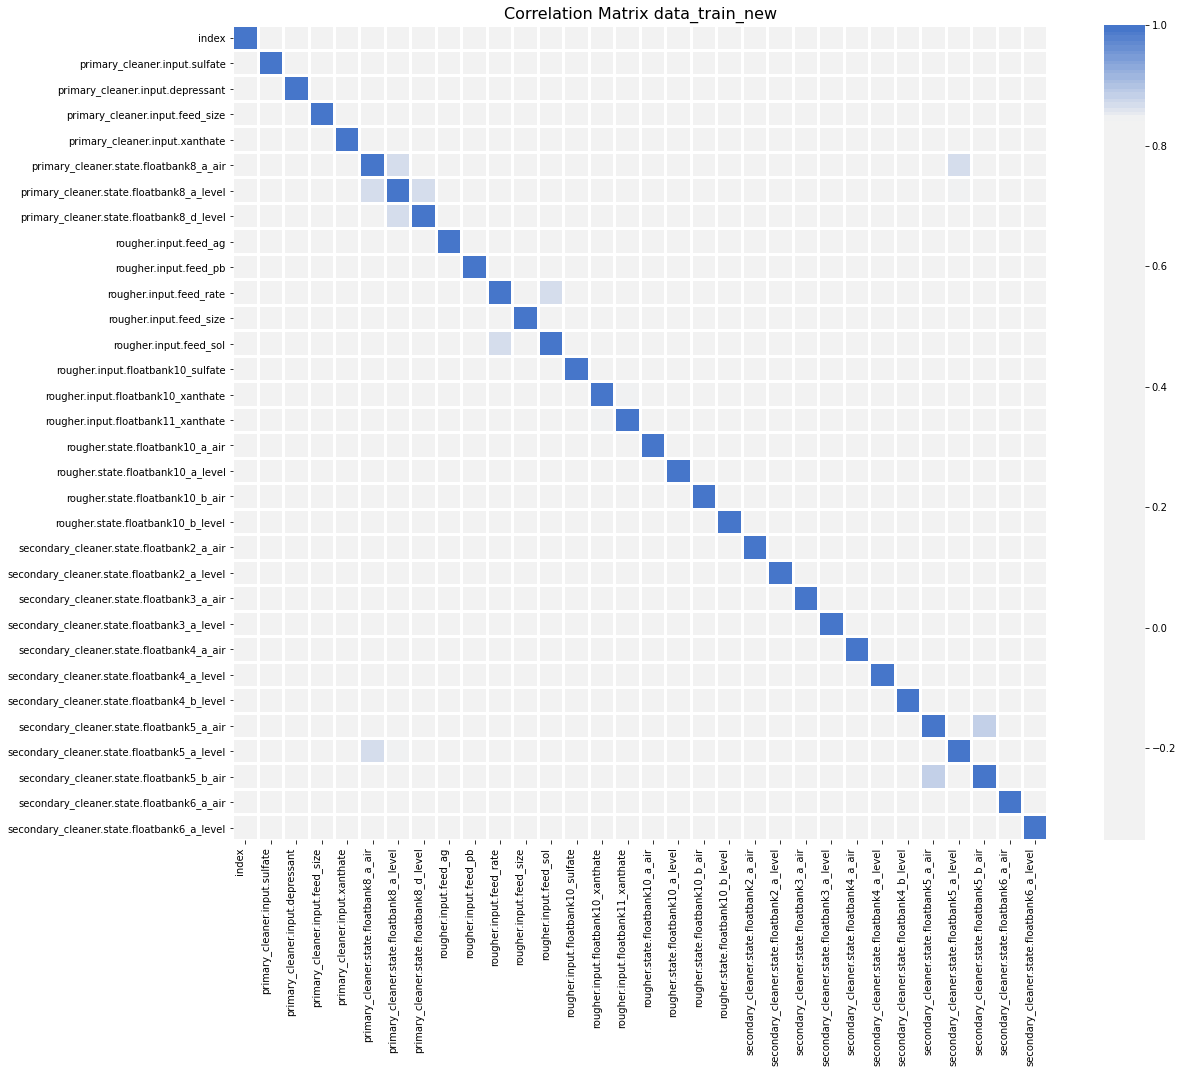

In [209]:
fig = plt.figure(figsize=(20, 15))
ax = sns.heatmap(feature_test.corr(), 
                 center=0, 
                 linewidths=2, 
                 cmap=sns.diverging_palette(0, 255, sep=216, n=256), 
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, horizontalalignment='right')
plt.title('Correlation Matrix data_train_new', fontsize=16);

In [210]:
test_corr_mask = correlation_col(feature_test, .9)
test_corr_mask

set()

In [211]:
columns_to_drop = test_corr_mask.union(train_corr_mask)
columns_to_drop

set()

##### Признаки нужно удалить из тренировочной и тестовой выборок

In [212]:
data_train_new.drop(columns_to_drop, axis=1, inplace=True)
data_test.drop(columns_to_drop, axis=1, inplace=True)

#### Выполним масштабирование при помощи функции StandardScaler, так как в датасетах есть признаки различающиеся на порядки. Это может привести к снижению качества моделей чувствительных к масштабу.

In [213]:
feature_train

index  primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0          0                     127.092003                         10.128295   
1          1                     125.629232                         10.296251   
2          2                     123.819808                         11.316280   
3          3                     122.270188                         11.322140   
4          4                     117.988169                         11.913613   
...      ...                            ...                               ...   
14322  14322                     123.381787                          8.028927   
14323  14323                     120.878188                          7.962636   
14324  14324                     105.666118                          7.955111   
14325  14325                      98.880538                          7.984164   
14326  14326                      95.248427                          8.078957   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                                 7.25                        0.988759   
1                                 7.25                        1.002663   
2                                 7.25                        0.991265   
3                                 7.25                        0.996739   
4                                 7.25                        1.009869   
...                                ...                             ...   
14322                             6.50                        1.304232   
14323                             6.50                        1.302419   
14324                             6.50                        1.315926   
14325                             6.50                        1.241969   
14326                             6.50                        1.283045   

       primary_cleaner.state.floatbank8_a_air  \
0                                 1549.775757   
1                                 1576.166671   
2                                 1601.556163   
3                                 1599.968720   
4                                 1601.339707   
...                                       ...   
14322                             1648.421193   
14323                             1649.820162   
14324                             1649.166761   
14325                             1646.547763   
14326                             1648.759906   

       primary_cleaner.state.floatbank8_a_level  \
0                                   -498.912140   
1                                   -500.904965   
2                                   -499.997791   
3                                   -500.951778   
4                                   -498.975456   
...                                         ...   
14322                               -400.382169   
14323                               -399.930973   
14324                               -399.888631   
14325                               -398.977083   
14326                               -399.862053   

       primary_cleaner.state.floatbank8_d_level  rougher.input.feed_ag  \
0                                   -493.428131               6.100378   
1                                   -498.931665               6.161113   
2                                   -499.827444               6.116455   
3                                   -500.052575               6.043309   
4                                   -500.593010               6.060915   
...                                         ...                    ...   
14322                               -399.669220               6.091855   
14323                               -400.636306               6.121323   
14324                               -399.831902               5.970515   
14325                               -399.745329               6.048130   
14326                               -400.673303               6.158718   

       rougher.input.feed_pb  ...  secondary_cleaner.s

In [214]:
scaler = StandardScaler()

In [215]:
feature_train_scaled = pd.DataFrame(scaler.fit_transform(feature_train), columns=feature_train.columns)

In [216]:
feature_train_scaled.head()

index  primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0 -1.731930                      -0.103245                          0.376981   
1 -1.731688                      -0.136672                          0.424232   
2 -1.731446                      -0.178020                          0.711194   
3 -1.731205                      -0.213432                          0.712842   
4 -1.730963                      -0.311283                          0.879240   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                        -0.115638                        0.327630   
1                        -0.115638                        0.363205   
2                        -0.115638                        0.334043   
3                        -0.115638                        0.348047   
4                        -0.115638                        0.381642   

   primary_cleaner.state.floatbank8_a_air  \
0                               -0.440995   
1                               -0.234867   
2                               -0.036561   
3                               -0.048960   
4                               -0.038252   

   primary_cleaner.state.floatbank8_a_level  \
0                                 -0.303074   
1                                 -0.358483   
2                                 -0.333259   
3                                 -0.359784   
4                                 -0.304834   

   primary_cleaner.state.floatbank8_d_level  rougher.input.feed_ag  \
0                                 -0.225751              -0.992259   
1                                 -0.350969              -0.966476   
2                                 -0.371350              -0.985434   
3                                 -0.376473              -1.016484   
4                                 -0.388769              -1.009010   

   rougher.input.feed_pb  ...  secondary_cleaner.state.floatbank3_a_air  \
0              -0.933420  ...                                 -0.969883   
1              -0.948750  ...                                 -0.968289   
2              -1.035158  ...                                 -0.978673   
3              -1.134073  ...                                 -0.968965   
4              -1.337835  ...                                 -0.965530   

   secondary_cleaner.state.floatbank3_a_level  \
0                                   -0.379111   
1                                   -0.482235   
2                                   -0.468483   
3                                   -0.480596   
4                                   -0.482199   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 -1.053889   
1                                 -1.058231   
2                                 -1.054211   
3                                 -1.050411   
4                                 -1.052039   

   secondary_cleaner.state.floatbank4_a_level  \
0                                   -0.506813   
1                                   -0.572454   
2                                   -0.507530   
3                                   -0.471314   
4                                   -0.449137   

   secondary_cleaner.state.floatbank4_b_level  \
0                                   -0.801793   
1                                   -0.738638   
2                                   -0.734941   
3                                   -0.736066   
4                                   -0.733457   

   secondary_cleaner.state.floatbank5_a_air  \
0                                 -1.131722   
1                                 -1.112054   
2                                 -1.106572   
3                                 -1.123978   
4                                 -1.131709   

   secondary_cleaner.state.floatbank5_a_level  \
0                                   -0.362171   
1                                   -0.411506   
2                                   -0.410423   
3                              

In [217]:
feature_test_scaled = pd.DataFrame(scaler.fit_transform(feature_test), columns=feature_test.columns)

In [218]:
feature_test_scaled.head()

index  primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0 -1.731755                       0.805457                          1.892416   
1 -1.731163                       0.882101                          1.890842   
2 -1.730570                       0.879889                          1.304582   
3 -1.729978                       0.881163                          1.059730   
4 -1.729386                       0.610128                          0.690477   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                         1.333127                       -0.399033   
1                         1.333127                       -0.419412   
2                         0.853632                       -0.411606   
3                         0.613884                       -0.597204   
4                         0.434073                       -0.678344   

   primary_cleaner.state.floatbank8_a_air  \
0                               -0.265707   
1                               -0.266360   
2                               -0.267273   
3                               -0.263662   
4                               -0.258364   

   primary_cleaner.state.floatbank8_a_level  \
0                                  0.144992   
1                                  0.147725   
2                                  0.134542   
3                                  0.167133   
4                                  0.135519   

   primary_cleaner.state.floatbank8_d_level  rougher.input.feed_ag  \
0                                  0.172660               1.470498   
1                                  0.158460               1.439609   
2                                  0.169148               1.473792   
3                                  0.148968               1.226819   
4                                  0.174354               0.867663   

   rougher.input.feed_pb  ...  secondary_cleaner.state.floatbank3_a_air  \
0               1.570254  ...                                 -0.528304   
1               1.486877  ...                                 -0.531983   
2               1.411895  ...                                 -0.525634   
3               1.176934  ...                                 -0.526699   
4               0.915168  ...                                 -0.535226   

   secondary_cleaner.state.floatbank3_a_level  \
0                                    0.932605   
1                                    0.936411   
2                                    0.934398   
3                                    0.946419   
4                                    0.929327   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 -0.773530   
1                                 -0.766117   
2                                 -0.786644   
3                                 -0.771486   
4                                 -0.773141   

   secondary_cleaner.state.floatbank4_a_level  \
0                                    0.294629   
1                                    0.280326   
2                                    0.279187   
3                                    0.285807   
4                                    0.247099   

   secondary_cleaner.state.floatbank4_b_level  \
0                                   -0.235001   
1                                   -0.219333   
2                                   -0.230630   
3                                   -0.217820   
4                                   -0.226559   

   secondary_cleaner.state.floatbank5_a_air  \
0                                 -1.157468   
1                                 -1.154359   
2                                 -1.124411   
3                                 -1.170606   
4                                 -1.114631   

   secondary_cleaner.state.floatbank5_a_level  \
0                                    1.354319   
1                                   -0.229515   
2                                    0.194514   
3                              

In [219]:
def smape(y_target, y_pred):
    
    smape = ((1/len(y_target)) * np.sum(2 * np.abs(y_target - y_pred) / (np.abs(y_target) + np.abs(y_pred)))) * 100
    
    return smape

def smape_final(y_true, y_pred):
    
    y_true = pd.DataFrame(y_true)
    y_pred = pd.DataFrame(y_pred)
    
    smape_rougher = smape(y_true.iloc[:, 0], y_pred.iloc[:, 0])
    smape_final = smape(y_true.iloc[:, 1], y_pred.iloc[:, 1])
    
    return 0.25 * smape_rougher + 0.75 * smape_final

#### Функция для кросс-валидации

In [221]:
### Variety 1  

In [222]:
def cross_val1(model, feature, target, cv=5):
    
#     scorer = make_scorer(smape_final, greater_is_better=False)

    kfold = KFold(n_splits=cv, random_state=state, shuffle=True)
    
    score = cross_val_score(
        model, 
        feature, 
        target,
        cv=kfold,
        scoring='neg_mean_absolute_error') 
    
    return score.mean()

In [223]:
### Variety 2 - working version

In [224]:
def cross_valid(model, feature, target, cv=5):
    
    """
    В функции выполняется кросс-валидация по 5 подвыборкам при помощи KFold 
    и рассчитывается итоговая sMAPE.
    """
    kfold = KFold(n_splits=cv, random_state=state, shuffle=True)
    
    kfold_iteration = list(kfold.split(feature, target)) 
                           
    scores = []
    
    for train_index, valid_index in kfold_iteration:
        
        feature_train = feature.iloc[train_index, :]
        target_train = target.iloc[train_index, :]
        feature_valid = feature.iloc[valid_index, :]
        target_valid = target.iloc[valid_index, :]
        
        
        model.fit(feature_train, target_train)  
        
        pred_valid = pd.DataFrame(data=model.predict(feature_valid), 
                                  index=target_valid.index, 
                                  columns=target_valid.columns)

        scores.append(smape_final(target_valid, pred_valid))
        
    smape = np.mean(scores)
    
    return smape

## LinearRegression

In [225]:
# Расчет smape на модели Линейной Регресии с кросс-валидацией выборок
smape_LR = cross_valid(LinearRegression(), feature_train_scaled, target_train)
smape_LR

7.699913702090475

## LinearRegression

In [226]:
# Кросс-валидация с использованием cross_val_score и scoring='neg_mean_absolute_error'
smape_final_LR = cross_val1(LinearRegression(), feature_train_scaled, target_train)
smape_final_LR

-4.788684125472097

In [227]:
feature_train 

index  primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0          0                     127.092003                         10.128295   
1          1                     125.629232                         10.296251   
2          2                     123.819808                         11.316280   
3          3                     122.270188                         11.322140   
4          4                     117.988169                         11.913613   
...      ...                            ...                               ...   
14322  14322                     123.381787                          8.028927   
14323  14323                     120.878188                          7.962636   
14324  14324                     105.666118                          7.955111   
14325  14325                      98.880538                          7.984164   
14326  14326                      95.248427                          8.078957   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                                 7.25                        0.988759   
1                                 7.25                        1.002663   
2                                 7.25                        0.991265   
3                                 7.25                        0.996739   
4                                 7.25                        1.009869   
...                                ...                             ...   
14322                             6.50                        1.304232   
14323                             6.50                        1.302419   
14324                             6.50                        1.315926   
14325                             6.50                        1.241969   
14326                             6.50                        1.283045   

       primary_cleaner.state.floatbank8_a_air  \
0                                 1549.775757   
1                                 1576.166671   
2                                 1601.556163   
3                                 1599.968720   
4                                 1601.339707   
...                                       ...   
14322                             1648.421193   
14323                             1649.820162   
14324                             1649.166761   
14325                             1646.547763   
14326                             1648.759906   

       primary_cleaner.state.floatbank8_a_level  \
0                                   -498.912140   
1                                   -500.904965   
2                                   -499.997791   
3                                   -500.951778   
4                                   -498.975456   
...                                         ...   
14322                               -400.382169   
14323                               -399.930973   
14324                               -399.888631   
14325                               -398.977083   
14326                               -399.862053   

       primary_cleaner.state.floatbank8_d_level  rougher.input.feed_ag  \
0                                   -493.428131               6.100378   
1                                   -498.931665               6.161113   
2                                   -499.827444               6.116455   
3                                   -500.052575               6.043309   
4                                   -500.593010               6.060915   
...                                         ...                    ...   
14322                               -399.669220               6.091855   
14323                               -400.636306               6.121323   
14324                               -399.831902               5.970515   
14325                               -399.745329               6.048130   
14326                               -400.673303               6.158718   

       rougher.input.feed_pb  ...  secondary_cleaner.s

In [228]:
scores = cross_val1(LinearRegression(), feature_train, target_train)
scores

-4.796180380987701

In [229]:
lr = LinearRegression().fit(feature_train, target_train)

In [230]:
lr.predict(feature_test)

array([[77.64867107, 62.74073616],
       [75.83023922, 63.14034162],
       [76.10521569, 62.96516506],
       ...,
       [76.44196185, 57.25287307],
       [76.34564819, 57.4348814 ],
       [76.23753217, 57.42932835]])

## RandomForest

In [251]:
rf_params = {
    'n_estimators': [4, 8, 16, 32],
    'max_depth': [2, 4, 8, 12, 16],
    'min_samples_leaf': [4, 8]
}

In [252]:
%%time

model_params_rf= []

best_results_rf = 0
best_depth_rf = 0
best_estimators_rf = 0
min_samples_leaf = 0

for max_depth in rf_params['max_depth']:
    for estim in rf_params['n_estimators']:
        for leaf in rf_params['min_samples_leaf']:
            smape_ = cross_valid(RandomForestRegressor(max_depth=max_depth,
                                                 n_estimators=estim,
                                                 min_samples_leaf=leaf,
                                                 random_state=state),
                           feature_train_scaled, target_train)
        
            if smape_ > best_results_rf:
                best_results = smape
                best_depth_rf = max_depth
                best_estimators_rf = estim
                min_samples_leaf = leaf
        
            model_params_rf.append([max_depth, estim, leaf, smape_])

Wall time: 6min 59s


In [254]:
model_params_rf_ = pd.DataFrame(data=model_params_rf, columns=['max_depth', 'estim', 'min_samples_leaf', 'smape_'])
model_params_rf_

max_depth  estim  min_samples_leaf    smape_
0           2      4                 4  7.937619
1           2      4                 8  7.883268
2           2      8                 4  7.887033
3           2      8                 8  7.886563
4           2     16                 4  7.911603
5           2     16                 8  7.872183
6           2     32                 4  7.861700
7           2     32                 8  7.867167
8           4      4                 4  7.384504
9           4      4                 8  7.307747
10          4      8                 4  7.287896
11          4      8                 8  7.283566
12          4     16                 4  7.274721
13          4     16                 8  7.265476
14          4     32                 4  7.263156
15          4     32                 8  7.275921
16          8      4                 4  6.337389
17          8      4                 8  6.284430
18          8      8                 4  6.231920
19          8      8                 8  6.181871
20          8     16                 4  6.186516
21          8     16                 8  6.152393
22          8     32                 4  6.148651
23          8     32                 8  6.117527
24         12      4                 4  5.913750
25         12      4                 8  5.862090
26         12      8                 4  5.723034
27         12      8                 8  5.688424
28         12     16                 4  5.626216
29         12     16                 8  5.634866
30         12     32                 4  5.567540
31         12     32                 8  5.574754
32         16      4                 4  5.797300
33         16      4                 8  5.754972
34         16      8                 4  5.559408
35         16      8                 8  5.572005
36         16     16                 4  5.390312
37         16     16                 8  5.449891
38         16     32                 4  5.321004
39         16     32                 8  5.362622

#### Лучшие параметры для Случайного леса. 

In [256]:
model_params_rf_.loc[model_params_rf_['smape_'].idxmin(), :]

max_depth           16.000000
estim               32.000000
min_samples_leaf     4.000000
smape_               5.321004
Name: 38, dtype: float64

## DecisionTree

In [257]:
dt_params = {
    'max_depth': range(1, 21),
    'min_samples_leaf':  range(1, 7)
}

In [233]:
%%time

model_params_dt= []

best_results_dt = 0
best_depth_dt = 0
best_samples_leaf_dt = 0

for max_depth in dt_params['max_depth']:
    for min_samples_leaf in dt_params['min_samples_leaf']:
        smape_dt = cross_valid(DecisionTreeRegressor(max_depth=max_depth,
                                                 min_samples_leaf=min_samples_leaf,
                                                 random_state=state),
                           feature_train_scaled, target_train)
        
        if smape_dt > best_results_dt:
            best_results_dt = smape_dt
            best_depth_dt = max_depth
            best_samples_leaf_dt = min_samples_leaf
        
        model_params_dt.append([max_depth, min_samples_leaf, smape_dt])

Wall time: 2min 50s


In [235]:
model_params_dt = pd.DataFrame(data=model_params_dt, columns=['max_depth', 'min_samples_leaf', 'smape_dt'])
model_params_dt

max_depth  min_samples_leaf  smape_dt
0            1                 1  8.175140
1            1                 2  8.173882
2            1                 3  8.175492
3            1                 4  8.174713
4            1                 5  8.211021
..         ...               ...       ...
115         20                 2  6.595406
116         20                 3  6.583730
117         20                 4  6.399273
118         20                 5  6.277100
119         20                 6  6.294913

[120 rows x 3 columns]

#### Лучшие параметры для Решающего дерева.

In [236]:
model_params_dt.loc[model_params_dt['smape_dt'].idxmin(), :]

max_depth           15.00000
min_samples_leaf     6.00000
smape_dt             6.11601
Name: 89, dtype: float64

### Рассчитаем параметры на константной модели. В качестве константного значение возьмем среднее

In [237]:
target_mean = pd.DataFrame(index=target_train.index,
                          columns=target_train.columns).fillna(target_train.mean())

In [238]:
smape_LR_constat_model = smape_final(target_train, target_mean)
smape_LR_constat_model

8.691670564985964

In [239]:
mean_rougher = pd.Series(target_train['rougher.output.recovery'].mean(), index=target_train['rougher.output.recovery'].index)

In [240]:
mean_final = pd.Series(target_train['final.output.recovery'].mean(), index=target_train['final.output.recovery'].index)

In [241]:
smape_mean_rouger = smape(target_train.iloc[:, 0], mean_rougher)
smape_mean_final = smape(target_train.iloc[:, 1], mean_final)

In [242]:
final_smape = 0.25 * smape_mean_rouger + 0.75 * smape_mean_final

In [243]:
final_smape

8.691670564985964

#### Константная модель предсказывает признаки немногим хуже, чем модель линейной регресии (12.452445301341026 против 11.574529669707335)
#### При этом Решающее дерево и Случайный лес показывают метрику финальный sMAPE лучше, чем константная модель. Проверка производилась пока только на тренировочных данных

In [244]:
dummy = DummyRegressor()

In [245]:
smape_dummy = cross_valid(dummy, feature_train, target_train)

In [246]:
smape_dummy

8.692892931435267

## Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

In [259]:
random_forest = RandomForestRegressor(max_depth=16,
                                     n_estimators=32,
                                     min_samples_leaf=4,
                                     random_state=state)

random_forest.fit(feature_train_scaled, target_train)
pred_test = random_forest.predict(feature_test)
sMAPE_test = smape_final(target_test, pred_test)

In [260]:
sMAPE_test

10.364250941489544

In [261]:
smape_dummy_test = cross_valid(dummy, feature_test, target_test)
smape_dummy_test

8.94613397789502